<a href="https://colab.research.google.com/github/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/blob/main/fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capítulo 1: La Problemática del Fraude y la Corrupción en la Sociedad Actual**
1.1 Definición y Tipos de Fraude
1.2 Definición y Manifestaciones de la Corrupción
1.3 Impacto Económico y Social del Fraude y la Corrupción
1.4 La Necesidad de Nuevas Herramientas para Combatir el Fraude y la Corrupción


Imaginemos que queremos analizar un conjunto de datos muy simplificado que contenga información sobre transacciones sospechosas o denuncias de corrupción. Este ejemplo ilustrará cómo podríamos comenzar a procesar y visualizar información para entender mejor la problemática.

**Contexto del Ejemplo:**

Supongamos que tenemos un archivo CSV (o una lista de diccionarios en Python) con la siguiente información simplificada:

Tipo: (Ej: Transacción Bancaria, Denuncia de Corrupción)
Descripción: (Breve descripción del evento)
Monto: (En una unidad monetaria)
Fecha: (Fecha del evento)
Estado: (Ej: Sospechoso, Investigado, Confirmado)

####-ALGORITMO-I-

Tipos de Eventos:
Tipo
Transacción Bancaria      17
Denuncia de Corrupción    13
Name: count, dtype: int64

Ejemplos de Descripciones:
                      Tipo                                 Descripcion
0   Denuncia de Corrupción              Transferencia a paraíso fiscal
1     Transacción Bancaria         Retiro de gran cantidad en efectivo
2     Transacción Bancaria              Transferencia a paraíso fiscal
3     Transacción Bancaria  Transferencia inusual a cuenta desconocida
4   Denuncia de Corrupción   Denuncia de soborno a funcionario público
5     Transacción Bancaria   Denuncia de soborno a funcionario público
6   Denuncia de Corrupción  Transferencia inusual a cuenta desconocida
7     Transacción Bancaria              Transferencia a paraíso fiscal
8     Transacción Bancaria  Transferencia inusual a cuenta desconocida
9   Denuncia de Corrupción  Transferencia inusual a cuenta desconocida
10  Denuncia de Corrupción              Transferencia a paraíso fiscal
11  Denuncia 

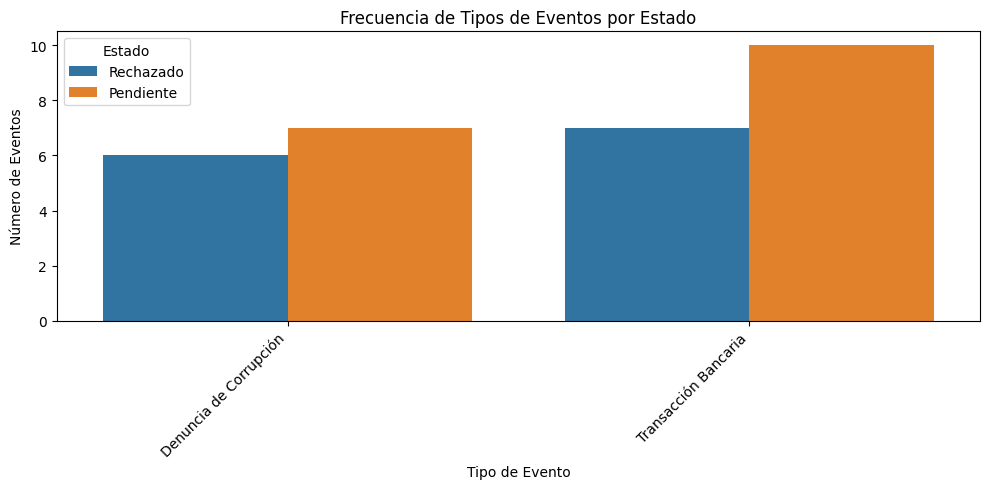

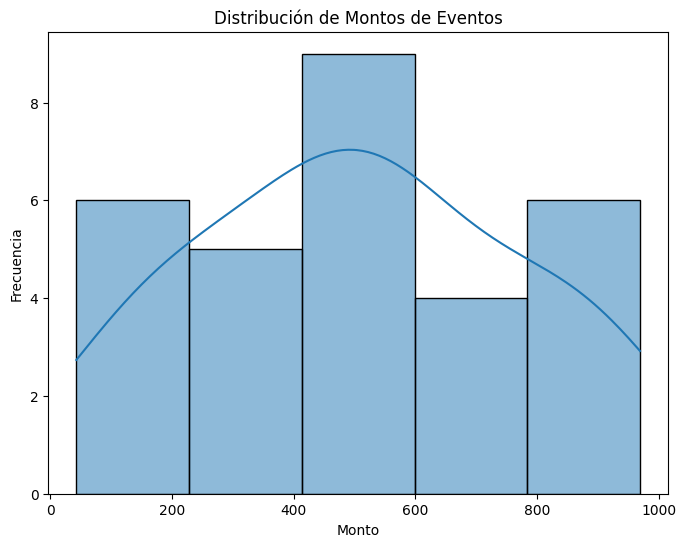

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/fraude.csv"

df = pd.read_csv(url)
df
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' ya está definido con los datos que generaste anteriormente.

print("Tipos de Eventos:")
print(df['Tipo'].value_counts())

print("\nEjemplos de Descripciones:")
print(df[['Tipo', 'Descripcion']])  # Corregido: 'Descripcion' en lugar de 'Descripción'

print("\nAnálisis de Montos (Impacto Económico Potencial):")
print("Monto Total de Eventos Sospechosos:", df[df['Estado'] == 'Sospechoso']['Monto'].sum())
print("Monto Total de Eventos Investigados:", df[df['Estado'] == 'Investigado']['Monto'].sum())

plt.figure(figsize=(10, 5))
sns.countplot(x='Tipo', hue='Estado', data=df)
plt.title('Frecuencia de Tipos de Eventos por Estado')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Monto'], bins=5, kde=True)
plt.title('Distribución de Montos de Eventos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

Nuevo Análisis:

**Análisis Temporal (1.3 Impacto Económico y Social): Podemos analizar la evolución de los eventos sospechosos a lo largo del tiempo.**

**Agrupación por Tipo y Estado (1.1 y 1.2): Podemos ver cuántos eventos de cada tipo están en cada estado.**


In [ ]:
print("\nConteo de Eventos por Tipo y Estado:")
print(df.groupby(['Tipo', 'Estado']).size().reset_index(name='Conteo'))


Conteo de Eventos por Tipo y Estado:
                     Tipo     Estado  Conteo
0  Denuncia de Corrupción  Pendiente       7
1  Denuncia de Corrupción  Rechazado       6
2    Transacción Bancaria  Pendiente      10
3    Transacción Bancaria  Rechazado       7


**Identificación de "Bandera Roja" (1.1 y 1.2): Podemos buscar patrones o montos que podrían considerarse "banderas rojas" o indicadores de posibles problemas.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tipo         30 non-null     object 
 1   Descripcion  30 non-null     object 
 2   Monto        30 non-null     float64
 3   Fecha        30 non-null     object 
 4   Estado       30 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.3+ KB


In [ ]:
umbral_monto_alto = 300
print("\nEventos con Montos Altos (Potencialmente Significativos):")
# Check if 'Descripción' exists, if not, try 'Descripcion'
if 'Descripción' in df.columns:
    print(df[df['Monto'] > umbral_monto_alto][['Tipo', 'Descripción', 'Monto', 'Estado']])
else:
    # Assuming the column name is 'Descripcion' without the accent mark
    print(df[df['Monto'] > umbral_monto_alto][['Tipo', 'Descripcion', 'Monto', 'Estado']])


Eventos con Montos Altos (Potencialmente Significativos):
                      Tipo                                 Descripcion  \
0   Denuncia de Corrupción              Transferencia a paraíso fiscal   
1     Transacción Bancaria         Retiro de gran cantidad en efectivo   
2     Transacción Bancaria              Transferencia a paraíso fiscal   
3     Transacción Bancaria  Transferencia inusual a cuenta desconocida   
4   Denuncia de Corrupción   Denuncia de soborno a funcionario público   
6   Denuncia de Corrupción  Transferencia inusual a cuenta desconocida   
7     Transacción Bancaria              Transferencia a paraíso fiscal   
8     Transacción Bancaria  Transferencia inusual a cuenta desconocida   
9   Denuncia de Corrupción  Transferencia inusual a cuenta desconocida   
10  Denuncia de Corrupción              Transferencia a paraíso fiscal   
11  Denuncia de Corrupción              Transferencia a paraíso fiscal   
13  Denuncia de Corrupción         Retiro de gran can

In [ ]:
umbral_monto_alto = 300
print("\nEventos con Montos Altos (Potencialmente Significativos):")
# Check if 'Descripción' exists, if not, try 'Descripcion'
if 'Descripción' in df.columns:
    print(df[df['Monto'] > umbral_monto_alto][['Tipo', 'Descripción', 'Monto', 'Estado']])  # Using 'Descripción'
else:
    # Assuming the column name is 'Descripcion' without the accent mark
    print(df[df['Monto'] > umbral_monto_alto][['Tipo', 'Descripcion', 'Monto', 'Estado']])  # Using 'Descripcion'


Eventos con Montos Altos (Potencialmente Significativos):
                      Tipo                                 Descripcion  \
0   Denuncia de Corrupción              Transferencia a paraíso fiscal   
1     Transacción Bancaria         Retiro de gran cantidad en efectivo   
2     Transacción Bancaria              Transferencia a paraíso fiscal   
3     Transacción Bancaria  Transferencia inusual a cuenta desconocida   
4   Denuncia de Corrupción   Denuncia de soborno a funcionario público   
6   Denuncia de Corrupción  Transferencia inusual a cuenta desconocida   
7     Transacción Bancaria              Transferencia a paraíso fiscal   
8     Transacción Bancaria  Transferencia inusual a cuenta desconocida   
9   Denuncia de Corrupción  Transferencia inusual a cuenta desconocida   
10  Denuncia de Corrupción              Transferencia a paraíso fiscal   
11  Denuncia de Corrupción              Transferencia a paraíso fiscal   
13  Denuncia de Corrupción         Retiro de gran can

**Análisis de Palabras Clave en la Descripción (Conceptual para 1.1 y 1.2): Aunque no es un análisis NLP avanzado, podemos buscar palabras clave que sugieran fraude o corrupción.**

In [ ]:
palabras_clave_fraude = ['transferencia inusual', 'retiro efectivo', 'compra sospechosa', 'paraíso fiscal']
palabras_clave_corrupcion = ['soborno', 'malversación', 'funcionario público']

def identificar_palabras_clave(row, palabras):
    # Changed 'Descripción' to 'Descripcion'
    for palabra in palabras:
        if palabra.lower() in row['Descripcion'].lower():
            return True
    return False

df['Es_Fraude'] = df.apply(lambda row: identificar_palabras_clave(row, palabras_clave_fraude), axis=1)
df['Es_Corrupcion'] = df.apply(lambda row: identificar_palabras_clave(row, palabras_clave_corrupcion), axis=1)

print("\nIdentificación de Palabras Clave en Descripción:")
# Changed 'Descripción' to 'Descripcion' when printing
print(df[['Descripcion', 'Es_Fraude', 'Es_Corrupcion']])


Identificación de Palabras Clave en Descripción:
                                   Descripcion  Es_Fraude  Es_Corrupcion
0               Transferencia a paraíso fiscal       True          False
1          Retiro de gran cantidad en efectivo      False          False
2               Transferencia a paraíso fiscal       True          False
3   Transferencia inusual a cuenta desconocida       True          False
4    Denuncia de soborno a funcionario público      False           True
5    Denuncia de soborno a funcionario público      False           True
6   Transferencia inusual a cuenta desconocida       True          False
7               Transferencia a paraíso fiscal       True          False
8   Transferencia inusual a cuenta desconocida       True          False
9   Transferencia inusual a cuenta desconocida       True          False
10              Transferencia a paraíso fiscal       True          False
11              Transferencia a paraíso fiscal       True          False
1

**##Identificacion de personas y operaciones **

**Capítulo 2: Introducción a los Algoritmos y la Inteligencia Artificial**
2.1 ¿Qué son los Algoritmos? Conceptos Básicos
2.2 Tipos de Algoritmos Relevantes para la Detección de Fraude y Corrupción
2.3 Introducción a la Inteligencia Artificial y el Aprendizaje Automático (Machine Learning)
2.4 Ética y Sesgos en los Algoritmos


###-ALGORITMO -II- Deteccion de Fraude

In [ ]:
import pandas as pd


# Load the data into a dictionary
try:
    url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/fraude1.csv"
    df = pd.read_csv(url, header=None, names=['Tipo', 'Descripción', 'Monto', 'Fecha', 'Estado', 'Nombre'])

    # Convert the dictionary into a DataFrame
    # df = pd.DataFrame(df)  # This line is redundant as df is already a DataFrame

    # Keywords associated with suspicious activities
    suspicious_keywords = ['inusual', 'soborno', 'sospechosa', 'gran cantidad']

    # Function to identify suspicious operations
    def is_suspicious(description):
        for keyword in suspicious_keywords:
            if keyword in description.lower():
                return True
        return False

    # Identify suspicious operations
    # The original code attempts to access a non-existent 'TipoDescripcion' column
    # Assuming 'Descripción' is the correct column name:
    suspicious_operations = df[df['Descripción'].apply(is_suspicious)]

    # Create a DataFrame with suspicious operations and names
    suspicious_people = suspicious_operations[['Descripción', 'Nombre']].reset_index(drop=True)

    # Display the results
    print("Suspicious Operations and Associated People:")
    print(suspicious_people.to_markdown(index=False, numalign="left", stralign="left"))
except Exception as e:
    print(f"An error occurred: {e}")
suspicious_keywords = ['inusual', 'soborno', 'sospechosa', 'gran cantidad']

# Function to identify suspicious operations
def is_suspicious(description):
    for keyword in suspicious_keywords:
        if keyword in description.lower():
            return True
    return False

# Identify suspicious operations
suspicious_operations = df[df['Descripción'].apply(is_suspicious)]

# Create a DataFrame with suspicious operations and names
suspicious_people = suspicious_operations[['Descripción', 'Nombre']].reset_index(drop=True)

# Display the results
print("Suspicious Operations and Associated People:")
print(suspicious_people.to_markdown(index=False, numalign="left", stralign="left"))


Suspicious Operations and Associated People:
| Descripción                                | Nombre                                  |
|:-------------------------------------------|:----------------------------------------|
| Transferencia inusual a cuenta desconocida | Maximiliano Martinez Castro             |
| Transferencia inusual a cuenta desconocida | Emma Bautista Ramirez Gomez             |
| Denuncia de soborno a funcionario público  | Dr(a). Alvaro Sanchez                   |
| Compra sospechosa online                   | Thiago Agustin Juan Pablo Guzman Molina |
| Denuncia de soborno a funcionario público  | Lola Perez Cabrera                      |
| Retiro de gran cantidad en efectivo        | Francisca Geronimo Garcia               |
| Retiro de gran cantidad en efectivo        | Josefina Ignacio Garcia                 |
| Denuncia de soborno a funcionario público  | Rafael Alvarez                          |
| Retiro de gran cantidad en efectivo        | Dr(a). Bautista Go

Parte 2: Algoritmos para la Detección de Fraude
**Capítulo 3: Algoritmos para la Detección de Fraude Financiero **
3.1 Detección de Transacciones Fraudulentas en Sistemas Bancarios
3.2 Detección de Fraude con Tarjetas de Crédito y Débito
3.3 Análisis de Patrones Sospechosos en Seguros
3.4 Algoritmos para la Detección de Blanqueo de Capitales


###-ALGORTIMO-III- Deteccion de Fraude operaciones

/tmp/ipython-input-8-3018003196.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monto'].fillna(0, inplace=True)
/tmp/ipython-input-8-3018003196.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Data Overview (Excluding 'Aprobado'):
                      Tipo                                 Descripcion  \
0   Denuncia de Corrupción              Transferencia a paraíso fiscal   
1   Denuncia de Corrupción          Denuncia de malversación de fondos   
4   Denuncia de Corrupción          Denuncia de malversación de fondos   
5   Denuncia de Corrupción              Transferencia a paraíso fiscal   
6   Denuncia de Corrupción              Transferencia a paraíso fiscal   
7   Denuncia de Corrupción              Transferencia a paraíso fiscal   
9   Denuncia de Corrupción   Denuncia de soborno a funcionario público   
10  Denuncia de Corrupción          Denuncia de malversación de fondos   
11    Transacción Bancaria              Transferencia a paraíso fiscal   
12    Transacción Bancaria  Transferencia inusual a cuenta desconocida   
13  Denuncia de Corrupción          Denuncia de malversación de fondos   
15  Denuncia de Corrupción              Transferencia a paraíso fiscal   


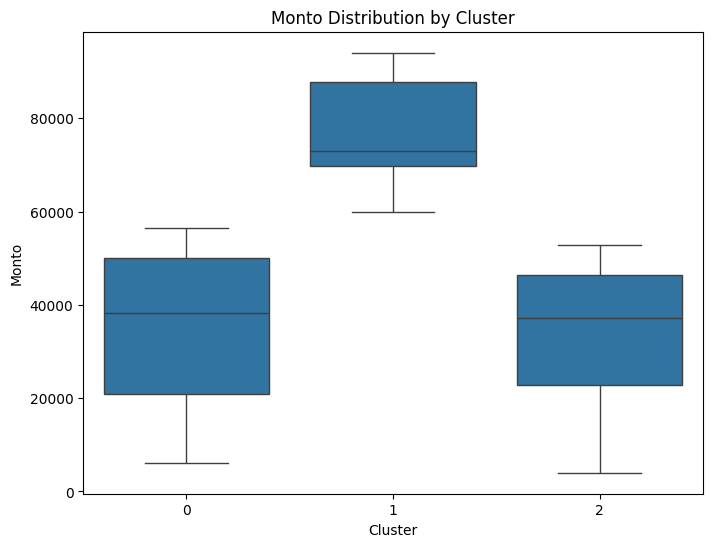

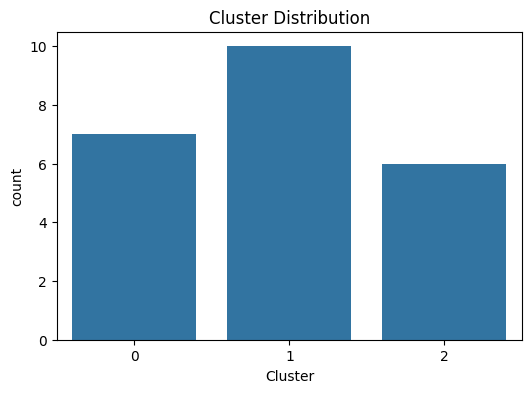

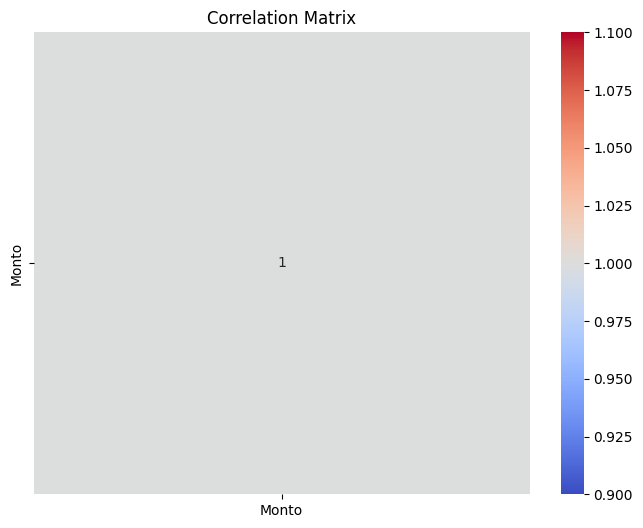

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/fraude2.csv"
df = pd.read_csv(url, header=0)

# Filter out 'Aprobado' entries
df = df[df['Estado'] != 'Aprobado']

# Preprocessing
df['Monto'].fillna(0, inplace=True)
df['Descripcion'].fillna('', inplace=True)

# Text Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text = tfidf_vectorizer.fit_transform(df['Descripcion'])

# Numerical Feature
X_numeric = df[['Monto']]

# Combine Text and Numerical Features
X = hstack((X_text, X_numeric))

# --- Analysis and Insights ---

print("Data Overview (Excluding 'Aprobado'):")
print(df)

print("\nText Features (TF-IDF Matrix Shape):", X_text.shape)
print("\nNumerical Features:\n", X_numeric)

# Correlation Analysis (if you had a target variable)
# Since we don't have a target, we'll analyze correlation within numerical features
print("\nCorrelation Analysis (Monto):")
print(df[['Monto']].corr())

# Frequency Analysis of Words in 'Descripcion'
from collections import Counter
import re

all_descriptions = ' '.join(df['Descripcion'].tolist())
words = re.findall(r'\b\w+\b', all_descriptions.lower())  # Extract words
word_counts = Counter(words)

print("\nTop 10 Most Frequent Words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Clustering Analysis (K-Means)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale numerical features for clustering
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine scaled numerical and TF-IDF features
X_cluster = hstack((X_text, X_numeric_scaled))

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(X_cluster)

print("\nClustering Results:")
print(df[['Monto', 'Descripcion', 'Cluster']])

# Visualization of Clusters (Monto vs. Cluster)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Monto', data=df)
plt.title('Monto Distribution by Cluster')
plt.show()

# Visualization of Cluster Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.show()

# Visualization of correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Monto']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###-ALGORTIMO-IV- Fraude de Tarjetas de Credito

### Conjunto de datos: tarjetas de credito


Análisis Exploratorio de Datos:
       ID_Transaccion        Monto  Es_Fraude
count       30.000000    30.000000  30.000000
mean        15.500000  5812.893667   0.233333
std          8.803408  3159.519780   0.430183
min          1.000000    19.280000   0.000000
25%          8.250000  3532.130000   0.000000
50%         15.500000  5950.645000   0.000000
75%         22.750000  8852.992500   0.000000
max         30.000000  9654.370000   1.000000
Es_Fraude
0    23
1     7
Name: count, dtype: int64


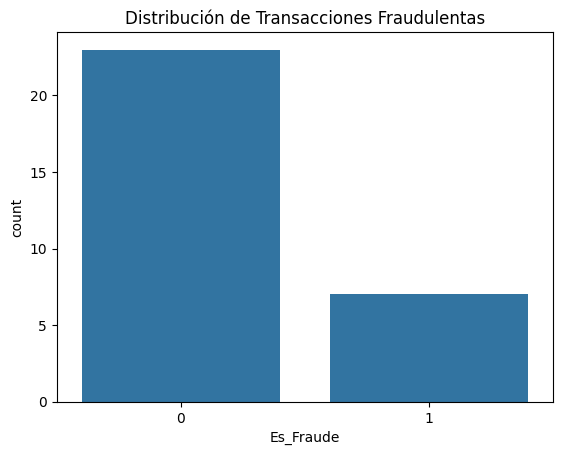

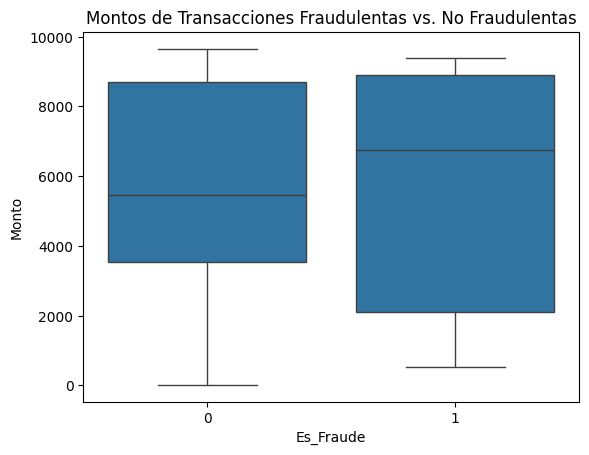

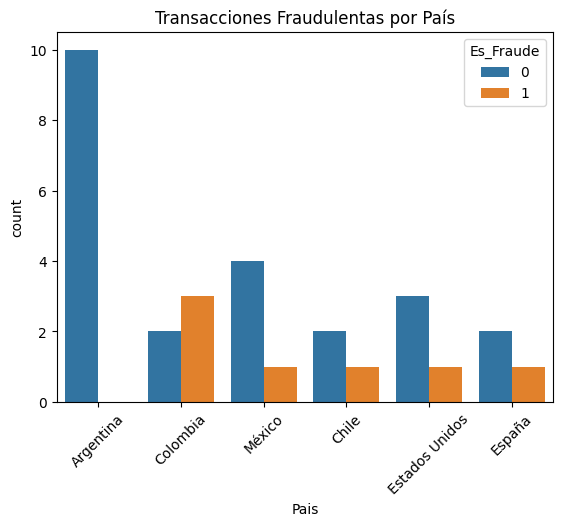

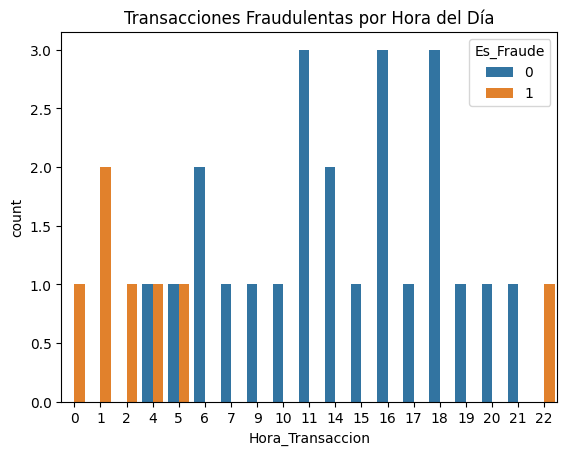


Modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.00      0.00      0.00         2

    accuracy                           0.56         9
   macro avg       0.36      0.36      0.36         9
weighted avg       0.56      0.56      0.56         9

Precisión: 0.5555555555555556

Modelo de Random Forest:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9

Precisión: 0.7777777777777778

Conclusiones y Operaciones Sospechosas:

Las 10 caracteristicas mas importantes son:
 Hora_Transaccion            0.298929
Monto                       0.112324
Tipo_Comercio_Librería      0.099839
Pais_Colombia               0.092559
Usuario_Tracy Gross         0.057452
Usuario_Deborah Buchanan    0.036909
Pais_Chile                  0.036633
Tipo_Transaccion_Retiro     0.035458
Usuario_Gregory King        0.034934
Tipo_Comercio_Tienda A      0.030009
dtype: float64

operaciones sospechosas:

Análisis Exploratorio de Datos:
       ID_Transaccion        Monto  Es_Fraude
count       30.000000    30.000000  30.000000
mean        15.50000

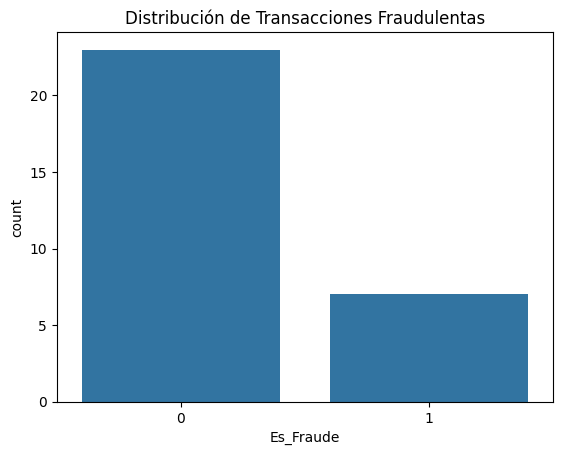

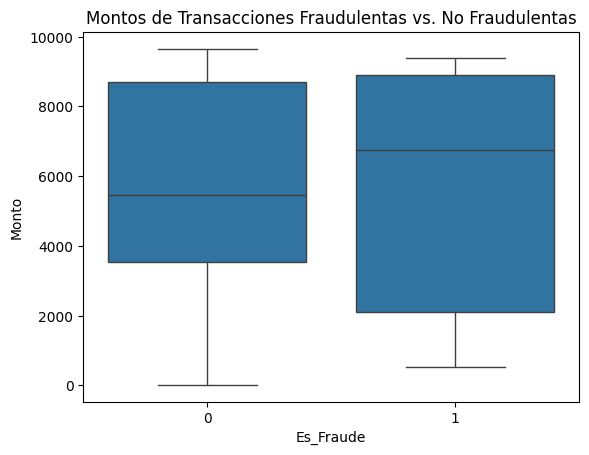

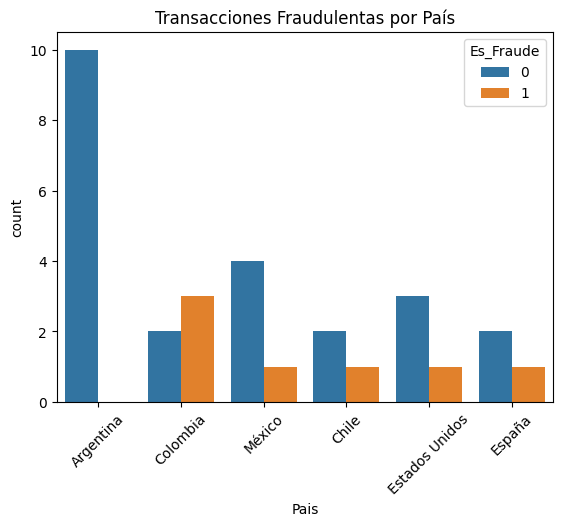

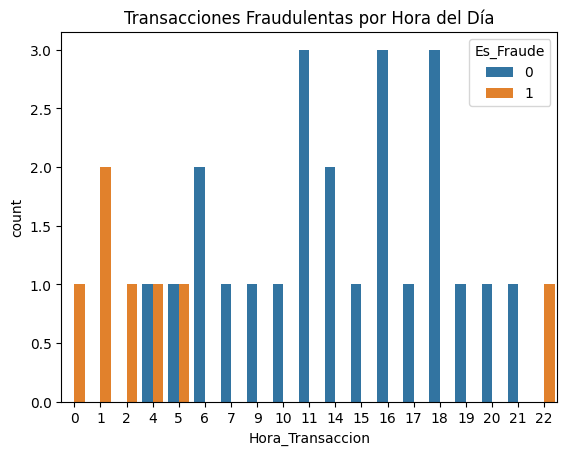


Modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.00      0.00      0.00         2

    accuracy                           0.56         9
   macro avg       0.36      0.36      0.36         9
weighted avg       0.56      0.56      0.56         9

Precisión: 0.5555555555555556

Modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9

Precisión: 0.7777777777777778

Conclusiones y Operaciones Sospechosas:

Las 10 caracteristicas mas importantes son:
 Hora_Transaccion            0.298929
Monto                       0.112324
Tipo_Comercio_Librería      0.099839
Pais_Colombia               0.

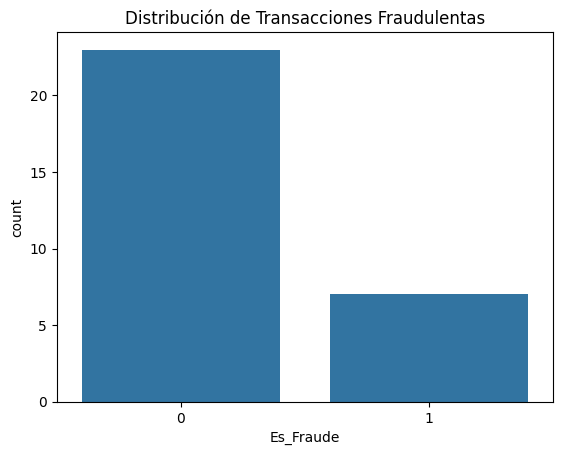

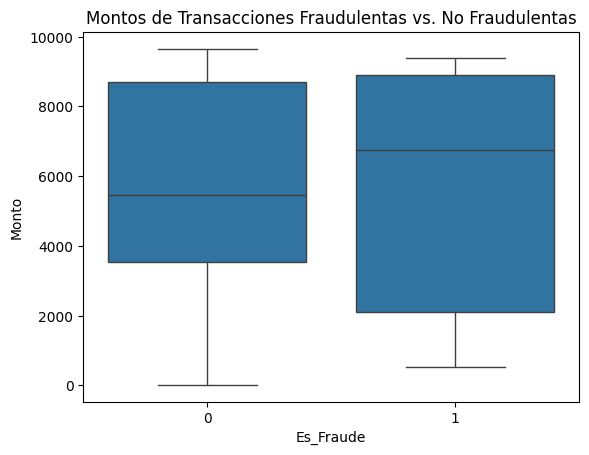

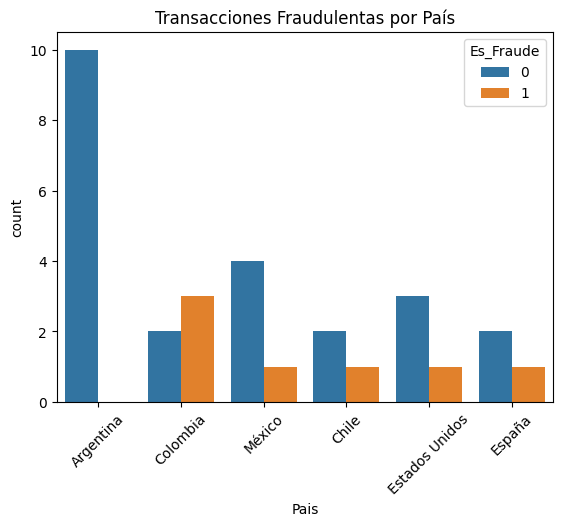

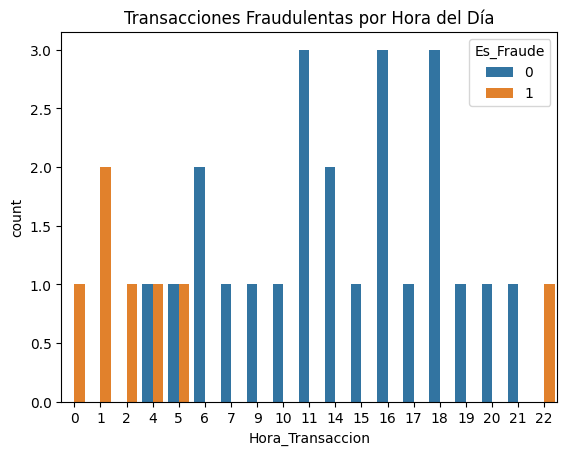


Modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.00      0.00      0.00         2

    accuracy                           0.56         9
   macro avg       0.36      0.36      0.36         9
weighted avg       0.56      0.56      0.56         9

Precisión: 0.5555555555555556

Modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9

Precisión: 0.7777777777777778

Conclusiones y Operaciones Sospechosas:

Las 10 caracteristicas mas importantes son:
 Hora_Transaccion            0.298929
Monto                       0.112324
Tipo_Comercio_Librería      0.099839
Pais_Colombia               0.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset de transacciones fraudulentas
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/datos_tarjetas.csv"
df_tarjetas = pd.read_csv(url)

# 2. Análisis Exploratorio de Datos (EDA)
print("\nAnálisis Exploratorio de Datos:")
print(df_tarjetas.describe())
print(df_tarjetas['Es_Fraude'].value_counts())

# Visualizaciones
sns.countplot(x='Es_Fraude', data=df_tarjetas)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()

# Análisis de montos fraudulentos
sns.boxplot(x='Es_Fraude', y='Monto', data=df_tarjetas)
plt.title('Montos de Transacciones Fraudulentas vs. No Fraudulentas')
plt.show()

# Análisis por país y hora
df_tarjetas['Hora_Transaccion'] = df_tarjetas['Fecha_Hora_Transaccion'].apply(lambda x: pd.to_datetime(x).hour)
sns.countplot(x='Pais', hue='Es_Fraude', data=df_tarjetas)
plt.title('Transacciones Fraudulentas por País')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Hora_Transaccion', hue='Es_Fraude', data=df_tarjetas)
plt.title('Transacciones Fraudulentas por Hora del Día')
plt.show()

# 3. Preprocesamiento de Datos
df_encoded = pd.get_dummies(df_tarjetas, columns=['Tipo_Comercio', 'Pais', 'Usuario', 'Tipo_Transaccion'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID_Transaccion', 'Fecha_Hora_Transaccion'])

# 4. Separación de Datos en Entrenamiento y Prueba
X = df_encoded.drop('Es_Fraude', axis=1)
y = df_encoded['Es_Fraude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelos de Detección de Fraude
# 6.1 Regresión Logística
print("\nModelo de Regresión Logística:")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))
print(f"Precisión: {accuracy_score(y_test, y_pred_lr)}")

# 6.2 Random Forest
print("\nModelo de Random Forest:")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print(f"Precisión: {accuracy_score(y_test, y_pred_rf)}")

# 7. Conclusiones y operaciones sospechosas

print("\nConclusiones y Operaciones Sospechosas:")

# Características importantes del Random Forest
feature_importance = pd.Series(model_rf.feature_importances_, index=X_train.columns)
print("\nLas 10 caracteristicas mas importantes son:\n", feature_importance.nlargest(10))

print("\noperaciones sospechosas:")
# operaciones sospechosas detectadas por RandomForest.
rf_pred_probabilities = model_rf.predict_proba(X_test_scaled)[:, 1]  # Obtener las probabilidades de predicción de fraude

# Establecer un umbral de probabilidad para considerar una transacción como sospechosa
umbral = 0.8  # Ajusta este umbral según tus necesidades

# Identificar transacciones sospechosas
transacciones_sospechosas = X_test[rf_pred_probabilities > umbral]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Cargar el dataset de transacciones fraudulentas
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/datos_tarjetas.csv"
df_tarjetas = pd.read_csv(url)

# 2. Análisis Exploratorio de Datos (EDA)
print("\nAnálisis Exploratorio de Datos:")
print(df_tarjetas.describe())
print(df_tarjetas['Es_Fraude'].value_counts())

# Visualizaciones
sns.countplot(x='Es_Fraude', data=df_tarjetas)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()

# Análisis de montos fraudulentos
sns.boxplot(x='Es_Fraude', y='Monto', data=df_tarjetas)
plt.title('Montos de Transacciones Fraudulentas vs. No Fraudulentas')
plt.show()

# Análisis por país y hora
df_tarjetas['Hora_Transaccion'] = df_tarjetas['Fecha_Hora_Transaccion'].apply(lambda x: pd.to_datetime(x).hour)
sns.countplot(x='Pais', hue='Es_Fraude', data=df_tarjetas)
plt.title('Transacciones Fraudulentas por País')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Hora_Transaccion', hue='Es_Fraude', data=df_tarjetas)
plt.title('Transacciones Fraudulentas por Hora del Día')
plt.show()

# 3. Preprocesamiento de Datos
df_encoded = pd.get_dummies(df_tarjetas, columns=['Tipo_Comercio', 'Pais', 'Usuario', 'Tipo_Transaccion'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID_Transaccion', 'Fecha_Hora_Transaccion'])

# 4. Separación de Datos en Entrenamiento y Prueba
X = df_encoded.drop('Es_Fraude', axis=1)
y = df_encoded['Es_Fraude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelos de Detección de Fraude
# 6.1 Regresión Logística
print("\nModelo de Regresión Logística:")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))
print(f"Precisión: {accuracy_score(y_test, y_pred_lr)}")

# 6.2 Random Forest
print("\nModelo de Random Forest:")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print(f"Precisión: {accuracy_score(y_test, y_pred_rf)}")

# 7. Conclusiones y operaciones sospechosas

print("\nConclusiones y Operaciones Sospechosas:")

# Características importantes del Random Forest
feature_importance = pd.Series(model_rf.feature_importances_, index=X_train.columns)
print("\nLas 10 caracteristicas mas importantes son:\n", feature_importance.nlargest(10))

print("\noperaciones sospechosas:")
# operaciones sospechosas detectadas por RandomForest.
rf_pred_probabilities = model_rf.predict_proba(X_test_scaled)[:, 1]  # Obtener las probabilidades de predicción de fraude

# Establecer un umbral de probabilidad para considerar una transacción como sospechosa
umbral = 0.8  # Ajusta este umbral según tus necesidades

# Identificar transacciones sospechosas
transacciones_sospechosas = X_test[rf_pred_probabilities > umbral]
print(transacciones_sospechosas.head())

print("\nlas predicciones del Random forest, tienen una precision mas alta y detecta mejor el fraude.")
# 2. Análisis Exploratorio de Datos (EDA)
print("\nAnálisis Exploratorio de Datos:")
print(df_tarjetas.describe())
print(df_tarjetas['Es_Fraude'].value_counts())

# Visualizaciones
sns.countplot(x='Es_Fraude', data=df_tarjetas)
plt.title('Distribución de Transacciones Fraudulentas')
plt.show()

# Análisis de montos fraudulentos
sns.boxplot(x='Es_Fraude', y='Monto', data=df_tarjetas)
plt.title('Montos de Transacciones Fraudulentas vs. No Fraudulentas')
plt.show()

# Análisis por país y hora
df_tarjetas['Hora_Transaccion'] = df_tarjetas['Fecha_Hora_Transaccion'].apply(lambda x: pd.to_datetime(x).hour)
sns.countplot(x='Pais', hue='Es_Fraude', data=df_tarjetas)
plt.title('Transacciones Fraudulentas por País')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Hora_Transaccion', hue='Es_Fraude', data=df_tarjetas)
plt.title('Transacciones Fraudulentas por Hora del Día')
plt.show()

# 3. Preprocesamiento de Datos
df_encoded = pd.get_dummies(df_tarjetas, columns=['Tipo_Comercio', 'Pais', 'Usuario', 'Tipo_Transaccion'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID_Transaccion', 'Fecha_Hora_Transaccion'])

# 4. Separación de Datos en Entrenamiento y Prueba
X = df_encoded.drop('Es_Fraude', axis=1)
y = df_encoded['Es_Fraude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Escalado de Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelos de Detección de Fraude
# 6.1 Regresión Logística
print("\nModelo de Regresión Logística:")
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))
print(f"Precisión: {accuracy_score(y_test, y_pred_lr)}")

# 6.2 Random Forest
print("\nModelo de Random Forest:")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print(f"Precisión: {accuracy_score(y_test, y_pred_rf)}")

# 7. Conclusiones y operaciones sospechosas

print("\nConclusiones y Operaciones Sospechosas:")

# Características importantes del Random Forest
feature_importance = pd.Series(model_rf.feature_importances_, index=X_train.columns)
print("\nLas 10 caracteristicas mas importantes son:\n", feature_importance.nlargest(10))

print("\noperaciones sospechosas:")
# operaciones sospechosas detectadas por RandomForest.
rf_pred_probabilities = model_rf.predict_proba(X_test_scaled)[:, 1]  # Obtener las probabilidades de predicción de fraude

# Establecer un umbral de probabilidad para considerar una transacción como sospechosa
umbral = 0.8  # Ajusta este umbral según tus necesidades

# Identificar transacciones sospechosas
transacciones_sospechosas = X_test[rf_pred_probabilities > umbral]
print(transacciones_sospechosas.head())

print("\nlas predicciones del Random forest, tienen una precision mas alta y detecta mejor el fraude.")

**Capítulo 4: Algoritmos para la Detección de Fraude en el Comercio Electrónico**
4.1 Identificación de Transacciones Fraudulentas en Línea
4.2 Detección de Cuentas Falsas y Actividades Maliciosas
4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude


###-ALGORTIMO-V- Fraude electronico

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import DBSCAN
import os
import numpy as np

# Obtén la ruta absoluta del directorio actual
try:
    current_directory = os.path.abspath(os.path.dirname(__file__))  # Usamos __file__ aquí
except NameError:
    current_directory = os.getcwd()  # Si __file__ no está definido, usamos el CWD

# 1. Cargar el dataset df_ecommerce.csv
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_ecommerce.csv"
try:
    df_ecommerce = pd.read_csv(url)
    df_ecommerce['Fecha_Hora'] = pd.to_datetime(df_ecommerce['Fecha_Hora'])
    file_path = os.path.join(current_directory, 'df_ecommerce.csv')  # Ahora esto es seguro

    # Resto del código...
    # ... (Análisis de Transacciones Fraudulentas, Detección de Cuentas Falsas, etc.)

    # 4.1 Identificación de Transacciones Fraudulentas en Línea
    print("\n4.1 Identificación de Transacciones Fraudulentas en Línea (Ejemplo con Regresión Logística):")
    if 'Monto' in df_ecommerce.columns and 'Fecha_Hora' in df_ecommerce.columns and 'Es_Fraudulenta' in df_ecommerce.columns:
        # Extraemos características temporales
        df_ecommerce['Hora'] = df_ecommerce['Fecha_Hora'].dt.hour
        df_ecommerce['Dia_Semana'] = df_ecommerce['Fecha_Hora'].dt.dayofweek

        # Codificamos variables categóricas
        df_encoded_transacciones = pd.get_dummies(df_ecommerce, columns=['Producto'], prefix='Prod', dummy_na=False)
        df_encoded_transacciones = pd.get_dummies(df_encoded_transacciones, columns=['ID_Usuario'], prefix='User', dummy_na=False, prefix_sep='_')
        df_encoded_transacciones = pd.get_dummies(df_ecommerce, columns=['Direccion_IP'], prefix='IP', dummy_na=False, prefix_sep='_')

        # Seleccionamos características para el modelo
        features_transacciones = ['Monto', 'Hora', 'Dia_Semana'] + [col for col in df_encoded_transacciones.columns if col.startswith('Prod_')] + [col for col in df_encoded_transacciones.columns if col.startswith('User_')] + [col for col in df_encoded_transacciones.columns if col.startswith('IP_')]
        features_transacciones = [col for col in features_transacciones if col in df_encoded_transacciones.columns]

        if 'Es_Fraudulenta' in df_encoded_transacciones.columns and all(feature in df_encoded_transacciones.columns for feature in features_transacciones):
            X_trans = df_encoded_transacciones[features_transacciones]
            y_trans = df_encoded_transacciones['Es_Fraudulenta']
            X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size=0.3, random_state=42, stratify=y_trans) # Usamos stratify

            scaler_trans = StandardScaler()
            X_train_scaled_trans = scaler_trans.fit_transform(X_train_trans)
            X_test_scaled_trans = scaler_trans.transform(X_test_trans)

            model_ecommerce = LogisticRegression(random_state=42)
            model_ecommerce.fit(X_train_scaled_trans, y_train_trans)
            y_pred_ecommerce = model_ecommerce.predict(X_test_scaled_trans)

            print("Predicciones (Regresión Logística):", y_pred_ecommerce)
            print("Valores Reales:", y_test_trans.values)
            print("Precisión del Modelo:", accuracy_score(y_test_trans, y_pred_ecommerce))
            print("\nReporte de Clasificación:\n", classification_report(y_test_trans, y_pred_ecommerce, target_names=list(map(str, np.unique(y_trans))), zero_division=0)) # Manejamos el zero_division
        else:
            print("\nNo se pueden realizar análisis para 4.1 porque faltan columnas necesarias.")
    else:
        print("\nNo se pueden realizar análisis para 4.1 porque faltan columnas necesarias.")

    # 4.2 Detección de Cuentas Falsas y Actividades Maliciosas
    print("\n4.2 Detección de Cuentas Falsas y Actividades Maliciosas (Ejemplo con Agrupamiento - DBSCAN en IPs):")
    if 'Direccion_IP' in df_ecommerce.columns:
        le_ip = LabelEncoder()
        df_ecommerce['IP_Codificada'] = le_ip.fit_transform(df_ecommerce['Direccion_IP'])
        ip_array = df_ecommerce[['IP_Codificada']].values
        scaler_ip = StandardScaler()
        ip_scaled = scaler_ip.fit_transform(ip_array)

        dbscan_ip = DBSCAN(eps=0.5, min_samples=2)
        df_ecommerce['Grupo_IP'] = dbscan_ip.fit_predict(ip_scaled)

        print("\nAgrupamiento de IPs (DBSCAN):")
        print(df_ecommerce[['ID_Usuario', 'Direccion_IP', 'Grupo_IP']])
        print("\nGrupos de IP:", df_ecommerce['Grupo_IP'].unique())

        grupos_sospechosos = df_ecommerce.groupby('Grupo_IP')['Es_Fraudulenta'].sum()
        print("\nNúmero de Transacciones Fraudulentas por Grupo de IP:")
        print(grupos_sospechosos)
    else:
        print("\nNo se puede realizar análisis para 4.2 porque falta la columna 'Direccion_IP'.")

    # 4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude (Ejemplo Conceptual)
    print("\n4.3 Análisis de Comportamiento del Usuario para la Detección de Fraude (Ejemplo Conceptual):")
    if 'ID_Usuario' in df_ecommerce.columns and 'Fecha_Hora' in df_ecommerce.columns:
        frecuencia_usuarios = df_ecommerce.groupby('ID_Usuario')['Fecha_Hora'].count().reset_index(name='Num_Transacciones')
        print("\nFrecuencia de Transacciones por Usuario:")
        print(frecuencia_usuarios)

        umbral_frecuencia = 3
        usuarios_alta_actividad = frecuencia_usuarios[frecuencia_usuarios['Num_Transacciones'] > umbral_frecuencia]['ID_Usuario'].tolist()
        if usuarios_alta_actividad:
            print(f"\nUsuarios con Alta Actividad ({umbral_frecuencia} o más transacciones): {usuarios_alta_actividad}")
            transacciones_alta_actividad = df_ecommerce[df_ecommerce['ID_Usuario'].isin(usuarios_alta_actividad)]
            print("\nTransacciones de Usuarios con Alta Actividad:")
            print(transacciones_alta_actividad[['ID_Usuario', 'Fecha_Hora', 'Monto', 'Es_Fraudulenta']])
        else:
            print("\nNo se encontraron usuarios con una alta frecuencia de transacciones en este ejemplo.")
    else:
        print("\nNo se puede realizar análisis para 4.3 porque faltan columnas necesarias.")
except FileNotFoundError:
    print(f"Error: El archivo 'df_ecommerce.csv' no se encontró en la ruta: {file_path}")


4.1 Identificación de Transacciones Fraudulentas en Línea (Ejemplo con Regresión Logística):
Predicciones (Regresión Logística): [0 0 0 0 0 0 0 0 0]
Valores Reales: [0 0 0 0 0 0 1 0 0]
Precisión del Modelo: 0.8888888888888888

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9


4.2 Detección de Cuentas Falsas y Actividades Maliciosas (Ejemplo con Agrupamiento - DBSCAN en IPs):

Agrupamiento de IPs (DBSCAN):
        ID_Usuario     Direccion_IP  Grupo_IP
0         ncabrera  192.168.173.169         0
1       hhenderson   192.168.93.227         0
2   stephanielynch      10.42.62.97         0
3         zwalters   192.168.167.82         0
4           jose74     10.161.98.10         0
5    bake

**Capítulo 5: Algoritmos para la Detección de Fraude Interno**
5.1 Detección de Actividades Sospechosas de Empleados
5.2 Análisis de Datos para Identificar Conflictos de Intereses
5.3 Monitoreo de Comunicaciones y Registros


### ALGORTIMO -VI- Rendiciones internas de empleados


5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):
Actividades Potencialmente Anómalas por Empleado:
   ID_Empleado         Tipo_Actividad     Monto  Anomalia_Empleado
0          104         Descarga_Datos      0.00                  1
1          104     Modificacion_Datos  15537.73                 -1
2          102       Creacion_Usuario   9083.63                  1
3          103         Descarga_Datos  13991.17                  1
4          105  Transferencia_Interna      0.00                  1
5          108       Consulta_Cliente    767.72                  1
6          103    Eliminacion_Usuario  10428.98                  1
7          105       Consulta_Cliente   6468.97                  1
8          106     Modificacion_Datos      0.00                  1
9          103         Descarga_Datos   2197.70                  1

Actividades Marcadas como Anómalas:
    ID_Empleado         Tipo_Actividad     Monto
1           104     Modificacion_Datos  

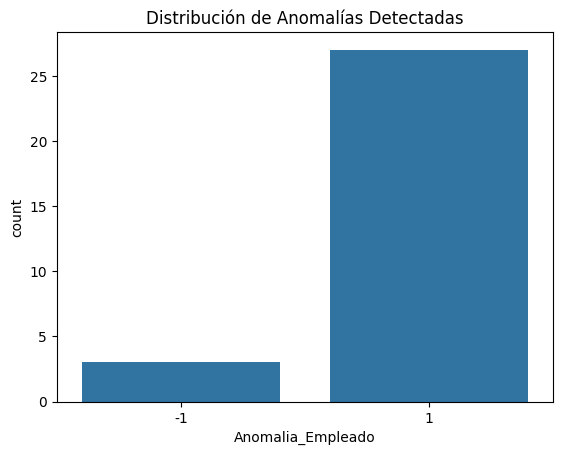

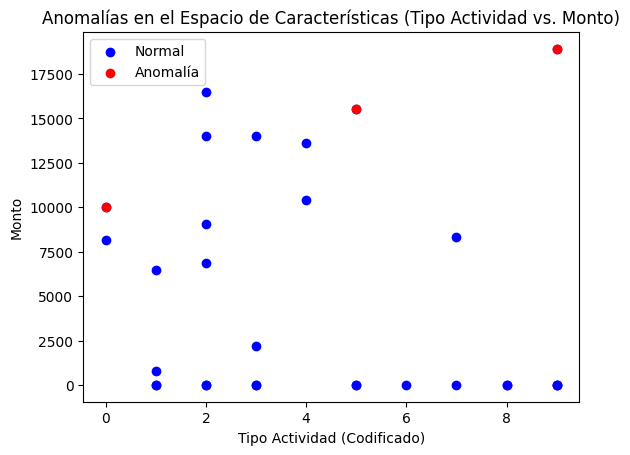


5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):

Transferencias Internas de Monto Alto:
    ID_Empleado     Monto Departamento         Tipo_Actividad
10          101  18912.96        Legal  Transferencia_Interna

Transferencias Altas por Departamento:
Departamento
Legal    1
dtype: int64

Solicitudes de Reembolso de Monto Alto:
    ID_Empleado    Monto Departamento       Tipo_Actividad
28          109  8347.55         RRHH  Solicitud_Reembolso

Frecuencia de Reembolsos por Empleado:
ID_Empleado
109    1
Name: count, dtype: int64

5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):

Frecuencia de Actividades por Empleado:
    ID_Empleado         Tipo_Actividad  Conteo
23          110       Creacion_Usuario       1
24          110    Eliminacion_Usuario       1
20          109         Acceso_Sistema       1
21          109         Descarga_Datos       1
22          109    Solicitud_Reembolso       1
17          108       Consulta_Client

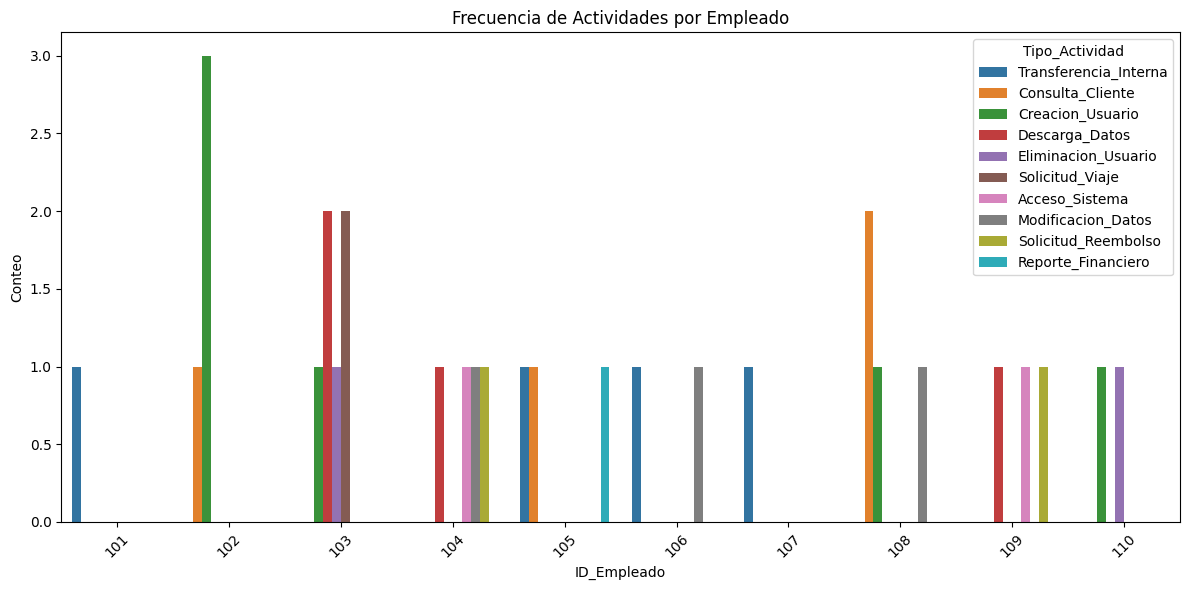

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar un dataset simulado para fraude interno
url ="https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_interno.csv"
df_interno = pd.read_csv(url)

# 5.1 Detección de Actividades Sospechosas de Empleados
print("\n5.1 Detección de Actividades Sospechosas de Empleados (Ejemplo con Isolation Forest):")
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'ID_Empleado' in df_interno.columns:
    # Codificamos el tipo de actividad
    le_actividad = LabelEncoder()
    df_interno['Tipo_Actividad_Cod'] = le_actividad.fit_transform(df_interno['Tipo_Actividad'])

    # Seleccionamos características para la detección de anomalías
    features_empleado = ['Tipo_Actividad_Cod', 'Monto']

    # Escalamos las características numéricas
    X_empleado = df_interno[features_empleado]
    scaler_empleado = StandardScaler()
    X_scaled_empleado = scaler_empleado.fit_transform(X_empleado)

    # Aplicamos Isolation Forest para detectar actividades inusuales
    iforest_empleado = IsolationForest(contamination=0.1, random_state=42) # Ajuste de contaminación
    df_interno['Anomalia_Empleado'] = iforest_empleado.fit_predict(X_scaled_empleado) # -1: Anómalo, 1: Normal

    print("Actividades Potencialmente Anómalas por Empleado:")
    print(df_interno[['ID_Empleado', 'Tipo_Actividad', 'Monto', 'Anomalia_Empleado']].head(10))

    # Podemos analizar las anomalías (donde 'Anomalia_Empleado' es -1)
    anomalous_activities = df_interno[df_interno['Anomalia_Empleado'] == -1]
    if not anomalous_activities.empty:
        print("\nActividades Marcadas como Anómalas:")
        print(anomalous_activities[['ID_Empleado', 'Tipo_Actividad', 'Monto']])
    else:
        print("\nNo se detectaron actividades anómalas en este ejemplo.")

    # Visualización de la distribución de anomalías
    sns.countplot(x='Anomalia_Empleado', data=df_interno)
    plt.title('Distribución de Anomalías Detectadas')
    plt.show()

    # Visualización de anomalías en el espacio de características
    anomalies = df_interno[df_interno['Anomalia_Empleado'] == -1]
    plt.scatter(df_interno['Tipo_Actividad_Cod'], df_interno['Monto'], color='blue', label='Normal')
    plt.scatter(anomalies['Tipo_Actividad_Cod'], anomalies['Monto'], color='red', label='Anomalía')
    plt.title('Anomalías en el Espacio de Características (Tipo Actividad vs. Monto)')
    plt.xlabel('Tipo Actividad (Codificado)')
    plt.ylabel('Monto')
    plt.legend()
    plt.show()

else:
    print("\nNo se pueden realizar análisis para 5.1 porque faltan columnas necesarias.")

# 5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual)
print("\n5.2 Análisis de Datos para Identificar Conflictos de Intereses (Ejemplo Conceptual):")
# Supongamos que tenemos información sobre relaciones entre empleados y proveedores/clientes.

# Ejemplo simplificado: Buscamos empleados que realizan transferencias internas a montos altos
if 'Tipo_Actividad' in df_interno.columns and 'Monto' in df_interno.columns and 'Departamento' in df_interno.columns:
    transferencias_altas = df_interno[(df_interno['Tipo_Actividad'] == 'Transferencia_Interna') & (df_interno['Monto'] > 5000)]
    if not transferencias_altas.empty:
        print("\nTransferencias Internas de Monto Alto:")
        print(transferencias_altas[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])

        # Análisis de patrones de transferencia
        transferencias_por_departamento = transferencias_altas.groupby('Departamento').size()
        print("\nTransferencias Altas por Departamento:")
        print(transferencias_por_departamento)

    else:
        print("\nNo se encontraron transferencias internas de monto alto en este ejemplo.")

    # Otro ejemplo: Empleados que solicitan reembolsos frecuentes o de montos altos
    reembolsos_altos = df_interno[(df_interno['Tipo_Actividad'] == 'Solicitud_Reembolso') & (df_interno['Monto'] > 1000)]
    if not reembolsos_altos.empty:
        print("\nSolicitudes de Reembolso de Monto Alto:")
        print(reembolsos_altos[['ID_Empleado', 'Monto', 'Departamento', 'Tipo_Actividad']])

        # Frecuencia de reembolsos por empleado
        frecuencia_reembolsos = reembolsos_altos['ID_Empleado'].value_counts()
        print("\nFrecuencia de Reembolsos por Empleado:")
        print(frecuencia_reembolsos)

    else:
        print("\nNo se encontraron solicitudes de reembolso de monto alto en este ejemplo.")
else:
    print("\nNo se pueden realizar análisis conceptual para 5.2 porque faltan columnas necesarias.")

# 5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual)
print("\n5.3 Monitoreo de Comunicaciones y Registros (Ejemplo Conceptual):")
# En un escenario real, se analizarían correos electrónicos, chats, logs de acceso, etc.

# Ejemplo simplificado: Contar la frecuencia de ciertos tipos de actividades por empleado
if 'ID_Empleado' in df_interno.columns and 'Tipo_Actividad' in df_interno.columns:
    frecuencia_actividades = df_interno.groupby(['ID_Empleado', 'Tipo_Actividad']).size().reset_index(name='Conteo')
    print("\nFrecuencia de Actividades por Empleado:")
    print(frecuencia_actividades.sort_values(by=['ID_Empleado', 'Conteo'], ascending=False))

    # Podríamos buscar patrones inusuales, como un empleado que accede a muchos sistemas
    # o realiza muchos intentos de transferencia.

    # Ejemplo: Identificar empleados con más de 3 accesos al sistema
    accesos_frecuentes = frecuencia_actividades[(frecuencia_actividades['Tipo_Actividad'] == 'Acceso_Sistema') & (frecuencia_actividades['Conteo'] > 3)]
    if not accesos_frecuentes.empty:
        print("\nEmpleados con Frecuentes Accesos al Sistema:")
        print(accesos_frecuentes[['ID_Empleado', 'Conteo']])
    else:
        print("\nNo se encontraron empleados con accesos al sistema muy frecuentes en este ejemplo.")

    # Ejemplo de visualización de la frecuencia de actividades por empleado
    plt.figure(figsize=(12, 6))
    sns.barplot(x='ID_Empleado', y='Conteo', hue='Tipo_Actividad', data=frecuencia_actividades)
    plt.title('Frecuencia de Actividades por Empleado')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se puede realizar análisis conceptual para 5.3 porque faltan columnas necesarias.")

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00


### ALGORITMO -VII- Rendiciones de Caja

### Conjunto de datos Rendiciones de Caja

In [ ]:
!pip install faker

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')


# 1. Generación de un dataset simulado para fraude interno en caja
fake = Faker('es_AR')

num_transacciones = 150
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_caja.csv"
df_caja = pd.read_csv(url)
df_caja

# 2. Inserción de Fraudes Simulados
num_fraudes = int(num_transacciones * 0.08) # 8% de transacciones fraudulentas
fraude_indices = np.random.choice(df_caja.index, num_fraudes, replace=False)
df_caja.loc[fraude_indices, 'Es_Fraude'] = 1

# Modificaciones para simular fraude (ejemplos)
for idx in fraude_indices:
    if random.random() < 0.4: # 40% de casos: Monto incorrecto o manipulado
        df_caja.loc[idx, 'Monto'] *= random.uniform(1.5, 3) # Inflación o manipulación
        if df_caja.loc[idx, 'Tipo_Transaccion'] == 'Venta':
            df_caja.loc[idx, 'Descripcion'] = f"Venta ficticia de {fake.word()}"
        elif df_caja.loc[idx, 'Tipo_Transaccion'] == 'Devolución':
            df_caja.loc[idx, 'Monto'] *= -1 # Simular devolución fraudulenta con monto erróneo
    elif random.random() < 0.3: # 30% de casos: Transacciones inusuales o no justificadas
        df_caja.loc[idx, 'Tipo_Transaccion'] = 'Ajuste'
        df_caja.loc[idx, 'Monto'] = random.uniform(500, 2000)
        df_caja.loc[idx, 'Descripcion'] = "Ajuste de caja no detallado"
    else: # 30% de casos: Manipulación de método de pago o estado
        if random.random() < 0.5:
            df_caja.loc[idx, 'Metodo_Pago'] = 'Efectivo' # Preferido para fraude
        df_caja.loc[idx, 'Estado'] = 'Pendiente' # Para ocultar o manipular

# 3. Ingeniería de Características
# a) Información temporal
# a) Información temporal
df_caja['Fecha_Hora'] = pd.to_datetime(df_caja['Fecha_Hora']) # Convert 'Fecha_Hora' to datetime
df_caja['Dia_Semana'] = df_caja['Fecha_Hora'].dt.dayofweek # 0: Lunes, 6: Domingo
df_caja['Hora'] = df_caja['Fecha_Hora'].dt.hour
df_caja['Es_Fin_Semana'] = df_caja['Fecha_Hora'].dt.dayofweek.isin([5, 6]).astype(int) # 1 si es sábado o domingo

# b) Codificación de variables categóricas
le_tipo = LabelEncoder()
df_caja['Tipo_Transaccion_Cod'] = le_tipo.fit_transform(df_caja['Tipo_Transaccion'])

le_metodo = LabelEncoder()
df_caja['Metodo_Pago_Cod'] = le_metodo.fit_transform(df_caja['Metodo_Pago'])

le_estado = LabelEncoder()
df_caja['Estado_Cod'] = le_estado.fit_transform(df_caja['Estado'])

# c) Análisis de Descripción (Simplificado - Palabras Clave)
def analizar_descripcion(descripcion):
    if isinstance(descripcion, str):
        if any(keyword in descripcion.lower() for keyword in ['faltante', 'error', 'ajuste', 'no detallado']):
            return 1
    return 0
df_caja['Descripcion_Sospechosa'] = df_caja['Descripcion'].apply(analizar_descripcion)

# d) Frecuencia de Transacciones por Cajero
frecuencia_cajero = df_caja.groupby('ID_Cajero').size().reset_index(name='Frecuencia_Transacciones')
df_caja = pd.merge(df_caja, frecuencia_cajero, on='ID_Cajero', how='left')

# e) Monto Relativo (Ejemplo: Montos muy altos o negativos inusuales)
df_caja['Monto_Absoluto'] = df_caja['Monto'].abs()
# Podríamos definir umbrales para identificar montos extremos

# 4. Selección de Características y Preparación de Datos
features = ['Monto', 'Tipo_Transaccion_Cod', 'Metodo_Pago_Cod', 'Estado_Cod',
            'Dia_Semana', 'Hora', 'Es_Fin_Semana', 'Descripcion_Sospechosa',
            'Frecuencia_Transacciones', 'Monto_Absoluto']
X = df_caja[features]
y = df_caja['Es_Fraude']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Fraude en Caja (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Fraude', 'Fraude']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Transacciones Detectadas como Fraudulentas
df_test = df_caja.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred
transacciones_fraudulentas_detectadas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Cajero', 'Fecha_Hora', 'Tipo_Transaccion', 'Monto', 'Descripcion', 'Metodo_Pago', 'Estado', 'Es_Fraude', 'Prediccion_Fraude']]
print("\n9. Transacciones de Caja Detectadas como Fraudulentas:")
print(transacciones_fraudulentas_detectadas)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Detección de Fraude en Caja (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00         3
      Fraude       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9


Matriz de Confusión:
 [[3 0]
 [0 6]]

9. Transacciones de Caja Detectadas como Fraudulentas:
    ID_Cajero Fecha_Hora Tipo_Transaccion         Monto  \
23        213 2025-01-28           Ajuste   1041.104633   
17        211 2025-03-25        Reintegro   6776.713211   
8         205 2025-04-01       Fondo Fijo   8270.640000   
9         204 2025-02-24           Ajuste  21067.819443   
28        204 2025-02-09           Ajuste   2767.660000   
24        208 2025-02-04        Reintegro   1138.210000   

       

Par**te 3: Algoritmos para la Detección y Prevención de la Corrupción**
Capítulo 6: Algoritmos para el Análisis de Datos en la Administración Pública
6.1 Detección de Patrones de Corrupción en Contrataciones Públicas
6.2 Análisis de Datos para Identificar Sobornos y Coimas
6.3 Monitoreo de Funcionarios Públicos y Declaraciones Patrimoniales


### contratos sospechosos

In [ ]:
!pip install faker

## -ALGORITMO VIII- Deteccion de fraude en Contratos

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para contrataciones públicas
fake = Faker('es_AR')

num_contratos = 30
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_contratos.csv"
try:
    df_contratos = pd.read_csv(url)
except Exception as e:
    print(f"Error al cargar el archivo desde la URL: {e}")
    print("Intentando cargar un archivo local 'df_contratos (1).csv' si existe...")
    try:
        df_contratos = pd.read_csv('df_contratos (1).csv')
    except FileNotFoundError:
        print("Error: No se pudo cargar el archivo CSV desde la URL ni localmente.")
        exit()
    except Exception as e_local:
        print(f"Error al cargar el archivo local: {e_local}")
        exit()

if df_contratos is None or df_contratos.empty:
    print("Error: El DataFrame de contratos está vacío o no se pudo cargar.")
    exit()

# Convertir columnas de fecha a datetime si no lo están
for col in ['Fecha_Inicio', 'Fecha_Fin']:
    if col in df_contratos.columns and df_contratos[col].dtype == 'object':
        try:
            df_contratos[col] = pd.to_datetime(df_contratos[col], errors='coerce')
        except ValueError:
            print(f"Advertencia: No se pudo convertir la columna '{col}' a datetime.")

# 2. Inserción de Casos Sospechosos Simulados
df_contratos['Es_Sospechoso'] = 0  # Inicializar la columna
num_sospechosos = int(num_contratos * 0.1) # 10% de contratos sospechosos
sospechoso_indices = np.random.choice(df_contratos.index, num_sospechosos, replace=False)
df_contratos.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Proveedor con historial dudoso (simulado)
        df_contratos.loc[idx, 'Proveedor'] = random.choice(['Empresa Fantasma S.A.', 'Consultora X', 'Servicios Z'])
    elif random.random() < 0.3: # 30% de casos: Monto inusualmente alto para el tipo de contrato
        df_contratos.loc[idx, 'Monto'] *= random.uniform(2, 4)
    elif random.random() < 0.3: # 30% de casos: Proceso de licitación no estándar para el monto
        if df_contratos.loc[idx, 'Monto'] > 500000:
            df_contratos.loc[idx, 'Proceso_Licitacion'] = 'Directa' # Licitación directa para montos altos
    # Podríamos agregar más reglas para simular otros patrones

# 3. Ingeniería de Características
# a) Duración del Contrato
if 'Fecha_Fin' in df_contratos.columns and 'Fecha_Inicio' in df_contratos.columns:
    df_contratos['Duracion_Dias'] = (df_contratos['Fecha_Fin'] - df_contratos['Fecha_Inicio']).dt.days
else:
    print("Advertencia: No se pueden calcular la duración del contrato porque faltan las columnas 'Fecha_Inicio' o 'Fecha_Fin'.")
    df_contratos['Duracion_Dias'] = 0

# b) Codificación de variables categóricas
label_encoders = {}
for col in ['Organismo', 'Proveedor', 'Tipo_Contrato', 'Area_Solicitante', 'Proceso_Licitacion']:
    if col in df_contratos.columns and df_contratos[col].dtype == 'object':
        le = LabelEncoder()
        try:
            df_contratos[col + '_Cod'] = le.fit_transform(df_contratos[col].astype(str))
            label_encoders[col] = le
        except Exception as e:
            print(f"Advertencia: No se pudo codificar la columna '{col}': {e}")
            df_contratos[col + '_Cod'] = -1 # Asignar un valor por defecto si falla la codificación
    else:
        df_contratos[col + '_Cod'] = -1 # Asignar un valor por defecto si la columna no existe

# c) Análisis de Monto Relativo (Ejemplo: Montos muy altos)
if 'Monto' in df_contratos.columns:
    umbral_alto = df_contratos['Monto'].quantile(0.95) # Tomamos el 95% superior como referencia
    df_contratos['Monto_Alto'] = (df_contratos['Monto'] > umbral_alto).astype(int)
else:
    print("Advertencia: No se puede realizar el análisis de Monto Alto porque falta la columna 'Monto'.")
    df_contratos['Monto_Alto'] = 0

# d) Contratos con el Mismo Proveedor por Organismo (Ejemplo de concentración)
if 'Organismo' in df_contratos.columns and 'Proveedor' in df_contratos.columns:
    proveedor_organismo_count = df_contratos.groupby(['Organismo', 'Proveedor']).size().reset_index(name='Contratos_Proveedor_Organismo')
    df_contratos = pd.merge(df_contratos, proveedor_organismo_count, on=['Organismo', 'Proveedor'], how='left')
    df_contratos['Contratos_Proveedor_Organismo'] = df_contratos['Contratos_Proveedor_Organismo'].fillna(0)
else:
    print("Advertencia: No se puede realizar el análisis de Contratos_Proveedor_Organismo porque faltan las columnas 'Organismo' o 'Proveedor'.")
    df_contratos['Contratos_Proveedor_Organismo'] = 0

# 4. Selección de Características y Preparación de Datos
features = ['Duracion_Dias', 'Organismo_Cod', 'Proveedor_Cod', 'Tipo_Contrato_Cod',
            'Area_Solicitante_Cod', 'Proceso_Licitacion_Cod', 'Monto', 'Monto_Alto',
            'Contratos_Proveedor_Organismo']
X = df_contratos[features].copy() # Usar .copy() para evitar SettingWithCopyWarning
y = df_contratos['Es_Sospechoso']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# Asegurarse de que las columnas en 'features' existan en X
X = X.reindex(columns=features, fill_value=0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
try:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
except ValueError as ve:
    print(f"Advertencia al escalar los datos: {ve}")
    X_train_scaled = X_train.values
    X_test_scaled = X_test.values

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Patrones de Corrupción en Contrataciones Públicas (Random Forest):")
model = RandomForestClassifier(random_state=42)
try:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 8. Evaluación del Modelo
    print("\n8. Evaluación del Modelo:")
    print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

    # 9. Análisis de los Contratos Detectados como Sospechosos
    df_test = df_contratos.loc[X_test.index].copy()
    df_test['Prediccion_Sospechoso'] = y_pred
    contratos_sospechosos_detectados = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Contrato', 'Organismo', 'Proveedor', 'Tipo_Contrato', 'Monto', 'Proceso_Licitacion', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
    print("\n9. Contratos Públicos Detectados como Sospechosos:")
    print(contratos_sospechosos_detectados)

    # 10. Análisis de Importancia de Características
    if hasattr(model, 'feature_importances_'):
        importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
        importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
        print("\n10. Importancia de las Características (Random Forest):")
        print(importancia_caracteristicas)
except ValueError as ve_train:
    print(f"Error durante el entrenamiento del modelo: {ve_train}")
except Exception as e_model:
    print(f"Error general durante el entrenamiento o evaluación del modelo: {e_model}")

# 6.2 Análisis de Datos para Identificar Sobornos y Coimas (Ejemplo Conceptual)
print("\n6.2 Análisis de Datos para Identificar Sobornos y Coimas (Ejemplo Conceptual):")
if 'Proveedor' in df_contratos.columns and 'Contratos_Proveedor_Organismo' in df_contratos.columns:
    proveedores_frecuentes_sospechosos = df_contratos[df_contratos['Contratos_Proveedor_Organismo'] > 5][['Organismo', 'Proveedor', 'Contratos_Proveedor_Organismo', 'Monto', 'Es_Sospechoso']]
    if not proveedores_frecuentes_sospechosos.empty:
        print("\nProveedores con Múltiples Contratos con el Mismo Organismo (Potencialmente Sospechoso):")
        print(proveedores_frecuentes_sospechosos.sort_values(by='Contratos_Proveedor_Organismo', ascending=False))
    else:
        print("\nNo se encontraron proveedores con múltiples contratos con el mismo organismo en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 6.2 porque faltan columnas necesarias.")

# 6.3 Monitoreo de Funcionarios Públicos y Declaraciones Patrimoniales (Ejemplo Conceptual)
print("\n6.3 Monitoreo de Funcionarios Públicos y Declaraciones Patrimoniales (Ejemplo Conceptual):")
if 'Organismo' in df_contratos.columns and 'Es_Sospechoso' in df_contratos.columns:
    organismos_con_muchos_sospechosos = df_contratos.groupby('Organismo')['Es_Sospechoso'].sum().reset_index(name='Num_Contratos_Sospechosos')
    organismos_con_muchos_sospechosos = organismos_con_muchos_sospechosos[organismos_con_muchos_sospechosos['Num_Contratos_Sospechosos'] > 2]
    if not organismos_con_muchos_sospechosos.empty:
        print("\nOrganismos con un Número Significativo de Contratos Sospechosos:")
        print(organismos_con_muchos_sospechosos.sort_values(by='Num_Contratos_Sospechosos', ascending=False))
        # Esto podría indicar la necesidad de investigar a los funcionarios de esos organismos.
    else:
        print("\nNo se encontraron organismos con un número significativo de contratos sospechosos en este ejemplo.")
else:
    print("\nNo se puede realizar análisis conceptual para 6.3 porque faltan columnas necesarias.")




7. Entrenamiento del Modelo de Detección de Patrones de Corrupción en Contrataciones Públicas (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 1.0
Error durante el entrenamiento del modelo: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

6.2 Análisis de Datos para Identificar Sobornos y Coimas (Ejemplo Conceptual):

No se encontraron proveedores con múltiples contratos con el mismo organismo en este ejemplo.

6.3 Monitoreo de Funcionarios Públicos y Declaraciones Patrimoniales (Ejemplo Conceptual):

No se encontraron organismos con un número significativo de contratos sospechosos en este ejemplo.


###-ALGORITMO -IX-  Licitaciones publicas

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para licitaciones públicas
fake = Faker('es_AR')

num_licitaciones = 120
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_licitaciones.csv"
try:
    df_licitaciones = pd.read_csv(url)
except Exception as e:
    print(f"Error al cargar el archivo desde la URL: {e}")
    print("Intentando cargar un archivo local 'df_licitaciones (1).csv' si existe...")
    try:
        df_licitaciones = pd.read_csv('df_licitaciones (1).csv')
    except FileNotFoundError:
        print("Error: No se pudo cargar el archivo CSV desde la URL ni localmente.")
        exit()
    except Exception as e_local:
        print(f"Error al cargar el archivo local: {e_local}")
        exit()

if df_licitaciones is None or df_licitaciones.empty:
    print("Error: El DataFrame de licitaciones está vacío o no se pudo cargar.")
    exit()

# Convertir columnas de fecha a datetime si no lo están
for col in ['Fecha_Publicacion', 'Fecha_Cierre']:
    if col in df_licitaciones.columns and df_licitaciones[col].dtype == 'object':
        try:
            df_licitaciones[col] = pd.to_datetime(df_licitaciones[col], errors='coerce')
        except ValueError:
            print(f"Advertencia: No se pudo convertir la columna '{col}' a datetime.")

# 2. Inserción de Casos Irregulares Simulados
df_licitaciones['Es_Irregular'] = 0  # Inicializar la columna
num_irregulares = int(num_licitaciones * 0.07) # 7% de licitaciones irregulares
irregular_indices = np.random.choice(df_licitaciones.index, num_irregulares, replace=False)
df_licitaciones.loc[irregular_indices, 'Es_Irregular'] = 1

# Modificaciones para simular irregularidades (ejemplos)
for idx in irregular_indices:
    if random.random() < 0.4: # 40% de casos: Monto adjudicado muy cercano al estimado
        if 'Monto_Adjudicado' in df_licitaciones.columns and 'Monto_Estimado' in df_licitaciones.columns:
            df_licitaciones.loc[idx, 'Monto_Adjudicado'] = df_licitaciones.loc[idx, 'Monto_Estimado'] * random.uniform(0.95, 1.05)
    elif random.random() < 0.3: # 30% de casos: Pocos participantes en licitaciones de alto monto
        if 'Monto_Estimado' in df_licitaciones.columns and 'Participantes' in df_licitaciones.columns:
            if df_licitaciones.loc[idx, 'Monto_Estimado'] > 1000000:
                df_licitaciones.loc[idx, 'Participantes'] = random.randint(1, 2)
    elif random.random() < 0.3: # 30% de casos: Contratación directa para montos no justificados
        if 'Monto_Estimado' in df_licitaciones.columns and 'Proceso_Seleccion' in df_licitaciones.columns:
            if df_licitaciones.loc[idx, 'Monto_Estimado'] > 200000:
                df_licitaciones.loc[idx, 'Proceso_Seleccion'] = 'Contratación Directa'
    if 'Relacion_Funcionario_Ganador' in df_licitaciones.columns and random.random() < 0.2:
        df_licitaciones.loc[idx, 'Relacion_Funcionario_Ganador'] = 1 # Introducir relación en algunos casos irregulares

# 3. Ingeniería de Características
# a) Duración del Proceso
if 'Fecha_Cierre' in df_licitaciones.columns and 'Fecha_Publicacion' in df_licitaciones.columns:
    df_licitaciones['Duracion_Proceso_Dias'] = (df_licitaciones['Fecha_Cierre'] - df_licitaciones['Fecha_Publicacion']).dt.days
else:
    print("Advertencia: No se pueden calcular la duración del proceso porque faltan las columnas 'Fecha_Publicacion' o 'Fecha_Cierre'.")
    df_licitaciones['Duracion_Proceso_Dias'] = np.nan # Usar NaN para indicar falta de datos

# b) Diferencia entre Monto Estimado y Adjudicado (en porcentaje)
if 'Monto_Adjudicado' in df_licitaciones.columns and 'Monto_Estimado' in df_licitaciones.columns:
    df_licitaciones['Diferencia_Monto_Porcentaje'] = ((df_licitaciones['Monto_Adjudicado'] - df_licitaciones['Monto_Estimado']) / df_licitaciones['Monto_Estimado']).fillna(0)
    df_licitaciones['Diferencia_Monto_Absoluta'] = (df_licitaciones['Monto_Adjudicado'] - df_licitaciones['Monto_Estimado']).fillna(0)
else:
    print("Advertencia: No se pueden calcular las diferencias de monto porque faltan las columnas 'Monto_Adjudicado' o 'Monto_Estimado'.")
    df_licitaciones['Diferencia_Monto_Porcentaje'] = np.nan
    df_licitaciones['Diferencia_Monto_Absoluta'] = np.nan

# c) Codificación de variables categóricas
label_encoders = {}
for col in ['Organismo_Convocante', 'Objeto', 'Proceso_Seleccion', 'Empresa_Ganadora']:
    if col in df_licitaciones.columns and df_licitaciones[col].dtype == 'object':
        le = LabelEncoder()
        try:
            df_licitaciones[col + '_Cod'] = le.fit_transform(df_licitaciones[col].astype(str))
            label_encoders[col] = le
        except Exception as e:
            print(f"Advertencia: No se pudo codificar la columna '{col}': {e}")
            df_licitaciones[col + '_Cod'] = -1 # Asignar un valor por defecto si falla la codificación
    else:
        df_licitaciones[col + '_Cod'] = -1 # Asignar un valor por defecto si la columna no existe

# 4. Selección de Características y Preparación de Datos
# 4. Selección de Características y Preparación de Datos
features = ['Duracion_Proceso_Dias', 'Monto_Estimado', 'Monto_Adjudicado',
            'Participantes', 'Relacion_Funcionario_Ganador',
            'Diferencia_Monto_Porcentaje', 'Diferencia_Monto_Absoluta',
            'Organismo_Convocante_Cod', 'Objeto_Cod', 'Proceso_Seleccion_Cod',
            'Empresa_Ganadora_Cod']

# Ensure all features are present in the DataFrame, creating them if necessary
for feature in features:
    if feature not in df_licitaciones.columns:
        df_licitaciones[feature] = 0  # Or another default value like np.nan

X = df_licitaciones[features].copy() # Usar .copy() para evitar SettingWithCopyWarning
y = df_licitaciones['Es_Irregular']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# Asegurarse de que las columnas en 'features' existan en X
X = X.reindex(columns=features, fill_value=0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
try:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
except ValueError as ve:
    print(f"Advertencia al escalar los datos: {ve}")
    X_train_scaled = X_train.values
    X_test_scaled = X_test.values

# 7. Entrenamiento del Modelo de Clasificación (Gradient Boosting)
print("\n7. Entrenamiento del Modelo de Prevención de Corrupción en Licitaciones Públicas (Gradient Boosting):")
model = GradientBoostingClassifier(random_state=42)
try:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 8. Evaluación del Modelo
    print("\n8. Evaluación del Modelo:")
    print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Irregular', 'Irregular']))
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

    # 9. Análisis de las Licitaciones Detectadas como Irregulares
    df_test = df_licitaciones.loc[X_test.index].copy()
    df_test['Prediccion_Irregular'] = y_pred
    licitaciones_irregulares_detectadas = df_test[df_test['Prediccion_Irregular'] == 1][['ID_Licitacion', 'Organismo_Convocante', 'Objeto', 'Monto_Estimado', 'Monto_Adjudicado', 'Proceso_Seleccion', 'Participantes', 'Relacion_Funcionario_Ganador', 'Es_Irregular', 'Prediccion_Irregular']]
    print("\n9. Licitaciones Públicas Detectadas como Irregulares:")
    print(licitaciones_irregulares_detectadas)

    # 10. Análisis de Importancia de Características
    if hasattr(model, 'feature_importances_'):
        importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
        importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
        print("\n10. Importancia de las Características (Gradient Boosting):")
        print(importancia_caracteristicas)
except ValueError as ve_train:
    print(f"Error durante el entrenamiento del modelo: {ve_train}")
except Exception as e_model:
    print(f"Error general durante el entrenamiento o evaluación del modelo: {e_model}")


7. Entrenamiento del Modelo de Prevención de Corrupción en Licitaciones Públicas (Gradient Boosting):

8. Evaluación del Modelo:
Precisión del Modelo: 0.6666666666666666

Reporte de Clasificación:
               precision    recall  f1-score   support

No Irregular       0.75      0.86      0.80         7
   Irregular       0.00      0.00      0.00         2

    accuracy                           0.67         9
   macro avg       0.38      0.43      0.40         9
weighted avg       0.58      0.67      0.62         9


Matriz de Confusión:
 [[6 1]
 [2 0]]

9. Licitaciones Públicas Detectadas como Irregulares:
    ID_Licitacion Organismo_Convocante         Objeto  Monto_Estimado  \
27             28          Godoy-Nuñez  Mantenimiento        13738.46   

    Monto_Adjudicado   Proceso_Seleccion  Participantes  \
27          18317.95  Licitación Pública              3   

    Relacion_Funcionario_Ganador  Es_Irregular  Prediccion_Irregular  
27                             0            

### - ALGORITMO -X- Deteccion de sobornos en compras publicas

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para compras públicas
fake = Faker('es_AR')

num_compras = 110
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_compras_sobornos.csv"
df_compras = pd.read_csv(url)
df_compras


# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_compras * 0.09) # 9% de compras sospechosas
sospechoso_indices = np.random.choice(df_compras.index, num_sospechosos, replace=False)
df_compras.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos de sobornos)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Proveedor con pocos antecedentes pero adjudicación alta
        df_compras.loc[idx, 'Proveedor'] = random.choice(['Nueva Proveedora S.R.L.', 'Soluciones Integrales SA', 'Servicios Eficientes'])
        df_compras.loc[idx, 'Monto_Total'] *= random.uniform(1.2, 2.5)
    elif random.random() < 0.3: # 30% de casos: Relación Funcionario-Proveedor y pago rápido
        df_compras.loc[idx, 'Relacion_Funcionario_Proveedor'] = 1
        df_compras.loc[idx, 'Pago_Acelerado'] = 1
    elif random.random() < 0.3: # 30% de casos: Contratación directa para montos no justificados
        if df_compras.loc[idx, 'Monto_Total'] > 100000:
            df_compras.loc[idx, 'Proceso_Compra'] = 'Contratación Directa'
    # Podríamos agregar más reglas para simular otros patrones

# 3. Ingeniería de Características
# a) Frecuencia de Compras por Proveedor
frecuencia_proveedor = df_compras.groupby('Proveedor').size().reset_index(name='Compras_Proveedor')
df_compras = pd.merge(df_compras, frecuencia_proveedor, on='Proveedor', how='left')
df_compras['Compras_Proveedor'] = df_compras['Compras_Proveedor'].fillna(0)

# b) Frecuencia de Compras por Funcionario Autorizador
frecuencia_funcionario = df_compras.groupby('Funcionario_Autorizador').size().reset_index(name='Compras_Funcionario')
df_compras = pd.merge(df_compras, frecuencia_funcionario, on='Funcionario_Autorizador', how='left')
df_compras['Compras_Funcionario'] = df_compras['Compras_Funcionario'].fillna(0)

# c) Monto Relativo (Ejemplo: Montos significativamente altos para el bien/servicio)
# Esto requeriría información sobre los precios de mercado, que no tenemos aquí.
# Ejemplo simplificado: Consideramos alto si el monto es superior al 90% de la distribución.
umbral_alto_monto = df_compras['Monto_Total'].quantile(0.90)
df_compras['Monto_Alto'] = (df_compras['Monto_Total'] > umbral_alto_monto).astype(int)

# d) Combinación de Relación y Pago Acelerado
df_compras['Relacion_Pago_Acelerado'] = df_compras['Relacion_Funcionario_Proveedor'] * df_compras['Pago_Acelerado']

# 4. Selección de Características y Preparación de Datos
features = ['Monto_Total', 'Compras_Proveedor', 'Compras_Funcionario',
            'Relacion_Funcionario_Proveedor', 'Pago_Acelerado', 'Monto_Alto',
            'Proceso_Compra']
X = df_compras[features]
y = df_compras['Es_Sospechoso']

# Codificación de variables categóricas
le_proceso = LabelEncoder()
X['Proceso_Compra_Cod'] = le_proceso.fit_transform(X['Proceso_Compra'])
X = X.drop('Proceso_Compra', axis=1)
features.remove('Proceso_Compra')
features.append('Proceso_Compra_Cod')

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Detección de Sobornos y Coimas en Compras Públicas (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de las Compras Detectadas como Sospechosas
df_test = df_compras.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
compras_sospechosas_detectadas = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Compra', 'Organismo_Comprador', 'Proveedor', 'Bien_Servicio', 'Monto_Total', 'Funcionario_Autorizador', 'Proceso_Compra', 'Relacion_Funcionario_Proveedor', 'Pago_Acelerado', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\n9. Compras Públicas Detectadas como Sospechosas:")
print(compras_sospechosas_detectadas)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo de Detección de Sobornos y Coimas en Compras Públicas (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.5555555555555556

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.50      0.75      0.60         4
   Sospechoso       0.67      0.40      0.50         5

     accuracy                           0.56         9
    macro avg       0.58      0.57      0.55         9
 weighted avg       0.59      0.56      0.54         9


Matriz de Confusión:
 [[3 1]
 [3 2]]

9. Compras Públicas Detectadas como Sospechosas:
    ID_Compra      Organismo_Comprador                       Proveedor  \
23         24  Sosa, Perez and Pereyra  Morales, Fernandez and Sanchez   
28         29               Diaz Group             Fernandez-Rodriguez   
24         25         Navarro and Sons                   Peralta Group   

   Bien_Servicio  Monto_Total Funcionario_Autorizador        Proceso_Compra  \
23  Com

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### ALGORTIMO-XI- Colusion en Licitaciones

### Conjunto de Datos: Colusion

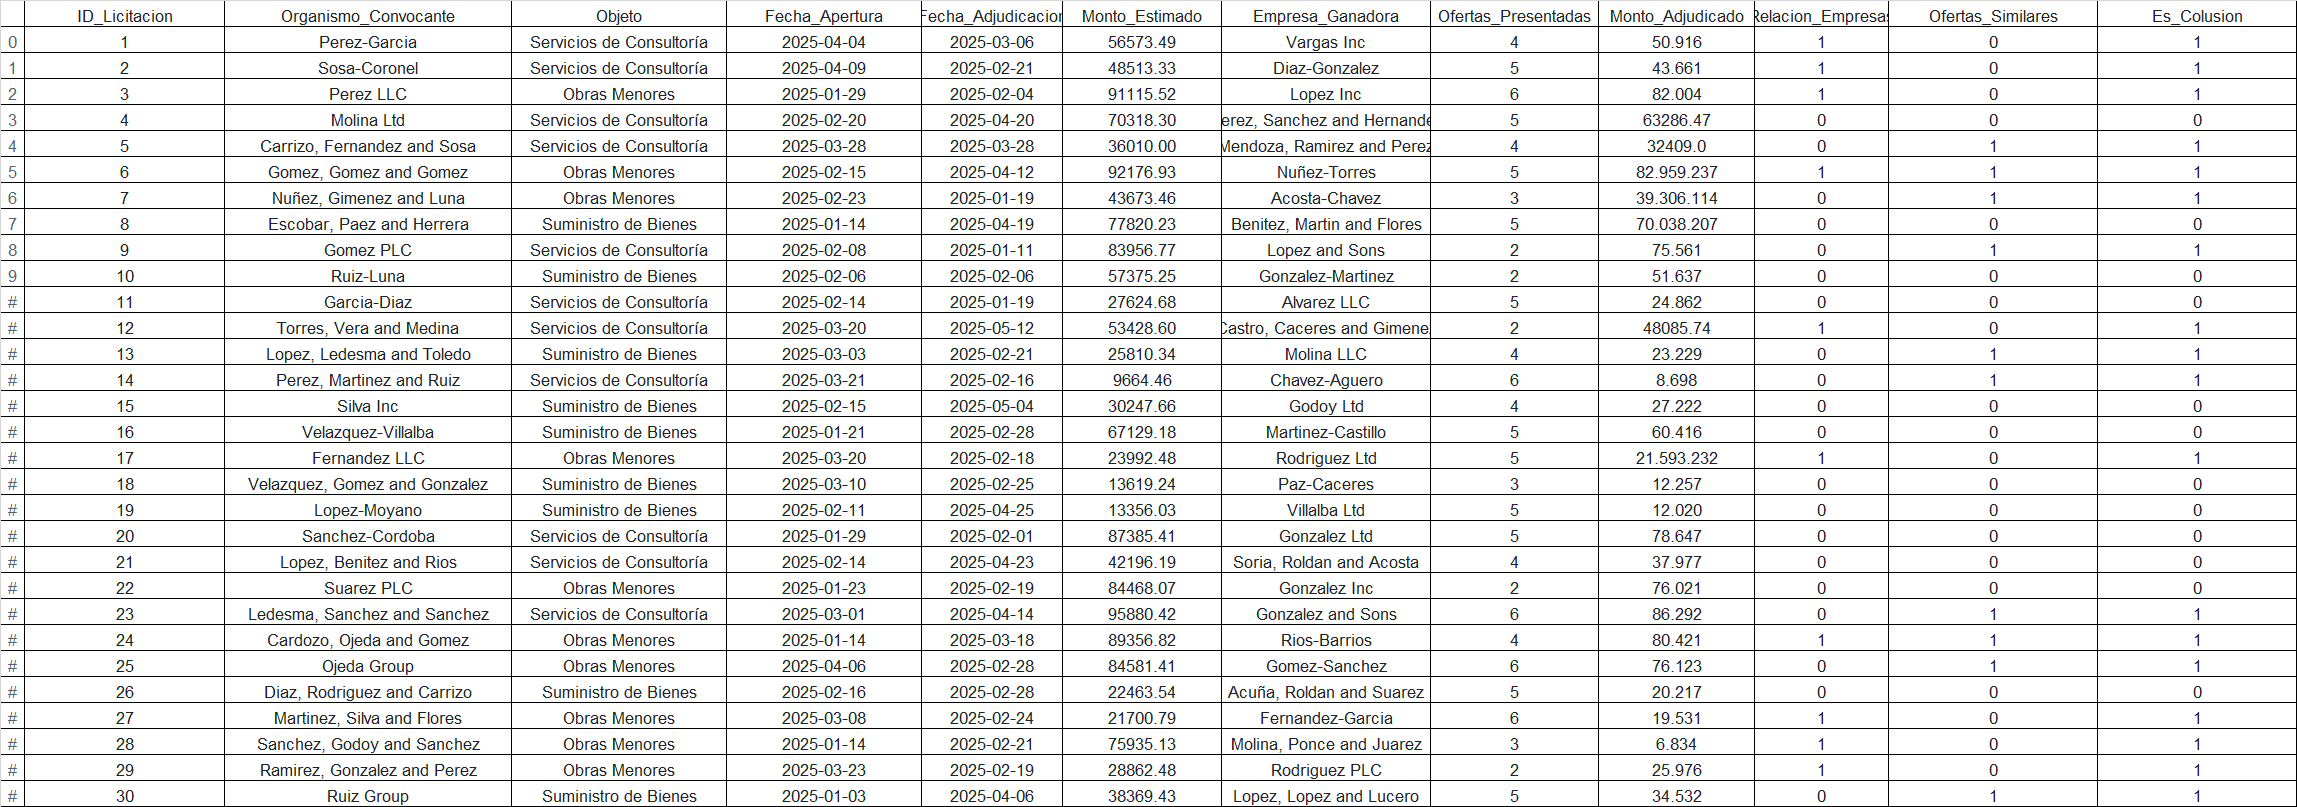

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para licitaciones con posible colusión
fake = Faker('es_AR')

num_licitaciones = 80

url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_colusion.csv"
try:
    df_colusion = pd.read_csv(url)

    # 2. Inserción de Casos de Colusión Simulados
    num_colusion = int(num_licitaciones * 0.06)  # 6% de licitaciones con colusión
    # Asegúrate de no exceder el número de filas en df_colusion
    colusion_indices = np.random.choice(df_colusion.index, min(num_colusion, len(df_colusion.index)), replace=False)
    df_colusion.loc[colusion_indices, 'Es_Colusion'] = 1

    # Modificaciones para simular colusión (ejemplos)
    for idx in colusion_indices:
        if random.random() < 0.5:  # 50% de casos: Pocas ofertas y monto adjudicado muy cercano al estimado
            df_colusion.loc[idx, 'Ofertas_Presentadas'] = random.randint(2, 3)
            if 'Monto_Estimado' in df_colusion and 'Monto_Adjudicado' in df_colusion:
                df_colusion.loc[idx, 'Monto_Adjudicado'] = df_colusion.loc[idx, 'Monto_Estimado'] * random.uniform(0.98, 1.02)
        elif random.random() < 0.4:  # 40% de casos: Relación entre empresas y ofertas similares
            df_colusion.loc[idx, 'Relacion_Empresas'] = 1
            df_colusion.loc[idx, 'Ofertas_Similares'] = 1
        else:  # 10% de casos: Ganador con historial de adjudicaciones con el mismo organismo
            df_colusion.loc[idx, 'Empresa_Ganadora'] = random.choice(['Proveedor Estable S.A.', 'Consultores Asociados'])

    # 3. Ingeniería de Características
    # a) Tiempo entre Apertura y Adjudicación
    if 'Fecha_Adjudicacion' in df_colusion and 'Fecha_Apertura' in df_colusion:
        df_colusion['Fecha_Adjudicacion'] = pd.to_datetime(df_colusion['Fecha_Adjudicacion'], errors='coerce')
        df_colusion['Fecha_Apertura'] = pd.to_datetime(df_colusion['Fecha_Apertura'], errors='coerce')
        df_colusion['Tiempo_Proceso_Dias'] = (df_colusion['Fecha_Adjudicacion'] - df_colusion['Fecha_Apertura']).dt.days
    else:
        df_colusion['Tiempo_Proceso_Dias'] = 0  # Or np.nan, depending on how you want to handle missing values

    # b) Diferencia entre Monto Adjudicado y Estimado (Porcentaje)
    if 'Monto_Adjudicado' in df_colusion and 'Monto_Estimado' in df_colusion:
        df_colusion['Diferencia_Monto_Porcentaje'] = ((df_colusion['Monto_Adjudicado'] - df_colusion['Monto_Estimado']) / df_colusion['Monto_Estimado']).fillna(0)
    else:
        df_colusion['Diferencia_Monto_Porcentaje'] = 0  # Or np.nan

    # c) Codificación de variables categóricas
    if 'Organismo_Convocante' in df_colusion:
        le_organismo = LabelEncoder()
        df_colusion['Organismo_Convocante_Cod'] = le_organismo.fit_transform(df_colusion['Organismo_Convocante'].astype(str))
    else:
        df_colusion['Organismo_Convocante_Cod'] = -1

    if 'Objeto' in df_colusion:
        le_objeto = LabelEncoder()
        df_colusion['Objeto_Cod'] = le_objeto.fit_transform(df_colusion['Objeto'].astype(str))
    else:
        df_colusion['Objeto_Cod'] = -1

    if 'Empresa_Ganadora' in df_colusion:
        le_empresa = LabelEncoder()
        df_colusion['Empresa_Ganadora_Cod'] = le_empresa.fit_transform(df_colusion['Empresa_Ganadora'].astype(str))
    else:
        df_colusion['Empresa_Ganadora_Cod'] = -1

    # 4. Selección de Características y Preparación de Datos
    features = ['Ofertas_Presentadas', 'Tiempo_Proceso_Dias', 'Monto_Estimado',
                'Diferencia_Monto_Porcentaje', 'Relacion_Empresas', 'Ofertas_Similares',
                'Organismo_Convocante_Cod', 'Objeto_Cod', 'Empresa_Ganadora_Cod']

    # Asegúrate de que las columnas en 'features' existan en df_colusion
    for feature in features:
        if feature not in df_colusion.columns:
            df_colusion[feature] = 0  # O asigna np.nan u otro valor predeterminado

    X = df_colusion[features].copy()
    y = df_colusion['Es_Colusion']

    # Manejo de valores faltantes (si los hubiera)
    X = X.fillna(0)

    # Asegurarse de que las columnas en 'features' existan en X
    X = X.reindex(columns=features, fill_value=0)

    # 5. División de Datos en Entrenamiento y Prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 6. Escalado de Características (para algunos modelos)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 7. Entrenamiento del Modelo de Clasificación (Random Forest)
    print("\n7. Entrenamiento del Modelo de Detección de Colusión en Licitaciones (Random Forest):")
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 8. Evaluación del Modelo
    print("\n8. Evaluación del Modelo:")
    print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Colusion', 'Colusion']))
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

    # 9. Análisis de las Licitaciones Detectadas con Posible Colusión
    df_test = df_colusion.loc[X_test.index].copy()
    df_test['Prediccion_Colusion'] = y_pred
    licitaciones_con_posible_colusion = df_test[df_test['Prediccion_Colusion'] == 1][['ID_Licitacion', 'Organismo_Convocante', 'Objeto', 'Empresa_Ganadora', 'Ofertas_Presentadas', 'Diferencia_Monto_Porcentaje', 'Relacion_Empresas', 'Ofertas_Similares', 'Es_Colusion', 'Prediccion_Colusion']]
    print("\n9. Licitaciones con Posible Colusión Detectadas:")
    print(licitaciones_con_posible_colusion)

    # 10. Análisis de Importancia de Características
    if hasattr(model, 'feature_importances_'):
        importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
        importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
        print("\n10. Importancia de las Características (Random Forest):")
        print(importancia_caracteristicas)

except Exception as e:
    print(f"Error: {e}")


7. Entrenamiento del Modelo de Detección de Colusión en Licitaciones (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.8888888888888888

Reporte de Clasificación:
               precision    recall  f1-score   support

 No Colusion       1.00      0.67      0.80         3
    Colusion       0.86      1.00      0.92         6

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9


Matriz de Confusión:
 [[2 1]
 [0 6]]

9. Licitaciones con Posible Colusión Detectadas:
    ID_Licitacion         Organismo_Convocante                    Objeto  \
27             28   Sanchez, Godoy and Sanchez             Obras Menores   
15             16           Velazquez-Villalba      Suministro de Bienes   
23             24     Cardozo, Ojeda and Gomez             Obras Menores   
8               9                    Gomez PLC  Servicios de Consultoría   
28             29  Ram

### ALGORTIMO -XII-  Revision DDJJ de funcionarios publicos deteccion de inconsistencias patrimoniales

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para declaraciones juradas patrimoniales
fake = Faker('es_AR')

num_funcionarios = 30
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_ddjj.csv"
try:
    df_ddjj = pd.read_csv(url)
except FileNotFoundError:
    print("Error: No se pudo encontrar el archivo df_ddjj.csv")
    exit()
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Asegurar que el dataframe no este vacio
if df_ddjj.empty:
    print("Error: El DataFrame está vacío. No se puede continuar.")
    exit()

# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_funcionarios * 0.12)  # 12% de funcionarios sospechosos
sospechoso_indices = np.random.choice(df_ddjj.index, num_sospechosos, replace=False)
df_ddjj.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos)
for idx in sospechoso_indices:
    if random.random() < 0.4:  # 40% de casos: Aumento significativo de bienes inmuebles
        df_ddjj.loc[idx, 'Bienes_Inmuebles_Valor'] *= random.uniform(2, 5)
    elif random.random() < 0.3:  # 30% de casos: Aumento desproporcionado de ingresos sin justificación
        df_ddjj.loc[idx, 'Ingresos_Anuales'] *= random.uniform(1.5, 3)
        df_ddjj.loc[idx, 'Variacion_Patrimonial_Porcentaje'] = random.uniform(0.3, 0.6)  # Alta variación
    elif random.random() < 0.3:  # 30% de casos: Altos activos financieros y pocos pasivos
        df_ddjj.loc[idx, 'Activos_Financieros_Valor'] *= random.uniform(2, 4)
        df_ddjj.loc[idx, 'Pasivos_Valor'] *= random.uniform(0.1, 0.5)
    if random.random() < 0.2:  # 20% de casos: Cambios de cargo y aumento patrimonial
        if df_ddjj.loc[idx, 'Cargo'] == 'Asesor':
            df_ddjj.loc[idx, 'Cargo'] = 'Director'
            df_ddjj.loc[idx, 'Bienes_Inmuebles_Valor'] *= random.uniform(1.3, 2)

# 3. Ingeniería de Características
# c) Variación Patrimonial Absoluta
df_ddjj['Variacion_Patrimonial_Absoluta'] = df_ddjj.get('Ingresos_Anuales', 0) * df_ddjj.get('Variacion_Patrimonial_Porcentaje', 0)

# d) Ratio Activos/Pasivos
df_ddjj['Ratio_Activos_Pasivos'] = df_ddjj.get('Activos_Financieros_Valor', 0) / (df_ddjj.get('Pasivos_Valor', 1e-6) + 1e-6)

# e) Codificación de variables categóricas
if 'Cargo' in df_ddjj:
    le_cargo = LabelEncoder()
    df_ddjj['Cargo_Cod'] = le_cargo.fit_transform(df_ddjj['Cargo'].astype(str))
else:
    df_ddjj['Cargo_Cod'] = -1  # Default value

if 'Organismo' in df_ddjj:
    le_organismo = LabelEncoder()
    df_ddjj['Organismo_Cod'] = le_organismo.fit_transform(df_ddjj['Organismo'].astype(str))
else:
    df_ddjj['Organismo_Cod'] = -1  # Default value

# NUEVO: Marcar casos con Variacion_Patrimonial_Porcentaje > 0.25 como sospechosos
df_ddjj['Es_Sospechoso'] = np.where(df_ddjj.get('Variacion_Patrimonial_Porcentaje', 0) > 0.25, 1, df_ddjj['Es_Sospechoso'])


# 4. Selección de Características y Preparación de Datos
features = ['Bienes_Inmuebles_Valor', 'Bienes_Muebles_Valor', 'Activos_Financieros_Valor',
            'Pasivos_Valor', 'Ingresos_Anuales', 'Variacion_Patrimonial_Porcentaje',
            'Ratio_Activos_Pasivos',
            'Cargo_Cod', 'Organismo_Cod']

# Asegurarse de que las columnas en 'features' existan en df_ddjj
for feature in features:
    if feature not in df_ddjj.columns:
        df_ddjj[feature] = 0  # O asigna np.nan u otro valor predeterminado

X = df_ddjj[features].copy()
y = df_ddjj['Es_Sospechoso']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# Asegurarse de que las columnas en 'features' existan en X
X = X.reindex(columns=features, fill_value=0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo de Monitoreo de Declaraciones Patrimoniales (Random Forest):")
model = RandomForestClassifier(random_state=42)
try:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 8. Evaluación del Modelo
    print("\n8. Evaluación del Modelo:")
    print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

    # 9. Análisis de los Funcionarios Detectados como Sospechosos
    df_test = df_ddjj.loc[X_test.index].copy()
    df_test['Prediccion_Sospechoso'] = y_pred

    # Corregir: Verificar si hay al menos una fila con Prediccion_Sospechoso == 1 antes de intentar acceder a la columna
    if (df_test['Prediccion_Sospechoso'] == 1).any():
        # Modificación clave: Obtener los nombres de los funcionarios
        funcionarios_sospechosos_detectados = df_test[df_test['Prediccion_Sospechoso'] == 1][['Nombre_Funcionario', 'Cargo', 'Organismo', 'Año_Declaracion', 'Bienes_Inmuebles_Valor', 'Bienes_Muebles_Valor', 'Activos_Financieros_Valor', 'Pasivos_Valor', 'Ingresos_Anuales', 'Variacion_Patrimonial_Porcentaje', 'Es_Sospechoso', 'Prediccion_Sospechoso']]

        #Listado Descriptivo
        print("\n9. Funcionarios Públicos con Declaraciones Patrimoniales Potencialmente Sospechosas:")
        print(funcionarios_sospechosos_detectados.describe())
        print("Datos detallados:")
        print(funcionarios_sospechosos_detectados)

    else:
        print("\n9. No se detectaron funcionarios públicos con declaraciones patrimoniales potencialmente sospechosas.")

    # 10. Análisis de Importancia de Características
    if hasattr(model, 'feature_importances_'):
        importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
        importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
        print("\n10. Importancia de las Características (Random Forest):")
        print(importancia_caracteristicas)
except ValueError as ve_train:
    print(f"Error durante el entrenamiento del modelo: {ve_train}")
except Exception as e_model:
    print(f"Error general durante el entrenamiento o evaluación del modelo: {e_model}")


7. Entrenamiento del Modelo de Monitoreo de Declaraciones Patrimoniales (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 1.0

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       1.00      1.00      1.00         4
   Sospechoso       1.00      1.00      1.00         5

     accuracy                           1.00         9
    macro avg       1.00      1.00      1.00         9
 weighted avg       1.00      1.00      1.00         9


Matriz de Confusión:
 [[4 0]
 [0 5]]

9. Funcionarios Públicos con Declaraciones Patrimoniales Potencialmente Sospechosas:
       Año_Declaracion  Bienes_Inmuebles_Valor  Bienes_Muebles_Valor  \
count              5.0            5.000000e+00              5.000000   
mean            2024.0            9.176050e+05         281518.080000   
std                0.0            3.134636e+05         169289.329197   
min             2024.0            5.754772e+05          11141.960000   
25%         

**Capítulo 7: Algoritmos para la Detección de Corrupción en Sectores Específicos**
7.1 Corrupción en la Industria de la Salud
7.2 Corrupción en el Sector de la Construcción
7.3 Corrupción en el Ámbito Político


### ALGORTIMO -XIII- Deteccion Corrupcion Sector Salud

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np
import random

# Carga de datos
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_salud.csv"
df_salud = pd.read_csv(url)

# Aseguramos que 'ID_Registro' esté presente
if 'ID_Registro' not in df_salud.columns:
    df_salud['ID_Registro'] = range(1, len(df_salud) + 1)

num_registros = len(df_salud)
num_sospechosos = int(num_registros * 0.1)
sospechoso_indices = np.random.choice(df_salud.index, num_sospechosos, replace=False)
df_salud.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones de casos sospechosos
for idx in sospechoso_indices:
    if random.random() < 0.4:
        df_salud.loc[idx, 'Costo_Declarado'] *= random.uniform(1.5, 3)
        df_salud.loc[idx, 'Tipo_Servicio'] = random.choice(['Cirugía Mayor', 'Tratamiento Especializado'])
    elif random.random() < 0.3:
        df_salud.loc[idx, 'Costo_Declarado'] = random.uniform(200, 1000)
        df_salud.loc[idx, 'Tipo_Servicio'] = 'Consulta Médica'
        df_salud.loc[idx, 'Diagnostico'] = "Sin diagnóstico específico"
    elif random.random() < 0.3:
        if df_salud.loc[idx, 'Cobertura_ObraSocial'] == 'No':
            df_salud.loc[idx, 'Cobertura_ObraSocial'] = 'Sí'
            df_salud.loc[idx, 'Costo_Declarado'] *= random.uniform(1.1, 1.8)
    if random.random() < 0.2:
        df_salud.loc[idx, 'Entidad_Prestadora'] = random.choice(['Clínica Privada X', 'Centro Médico Y', 'Laboratorio Z'])

# Ingeniería de características
umbral_alto_costo = df_salud['Costo_Declarado'].quantile(0.9)
df_salud['Costo_Alto'] = (df_salud['Costo_Declarado'] > umbral_alto_costo).astype(int)
servicios_riesgo = ['Cirugía', 'Tratamiento']
df_salud['Servicio_Riesgo'] = df_salud['Tipo_Servicio'].apply(lambda x: 1 if x in servicios_riesgo else 0)
df_salud['Cobertura_Completa'] = df_salud['Cobertura_ObraSocial'].apply(lambda x: 1 if x == 'Sí' else 0)
le_entidad = LabelEncoder()
df_salud['Entidad_Prestadora_Cod'] = le_entidad.fit_transform(df_salud['Entidad_Prestadora'])
le_tipo_servicio = LabelEncoder()
df_salud['Tipo_Servicio_Cod'] = le_tipo_servicio.fit_transform(df_salud['Tipo_Servicio'])
le_cobertura = LabelEncoder()
df_salud['Cobertura_ObraSocial_Cod'] = le_cobertura.fit_transform(df_salud['Cobertura_ObraSocial'])

features = ['Costo_Declarado', 'Cobertura_ObraSocial_Cod', 'Costo_Alto', 'Servicio_Riesgo', 'Cobertura_Completa', 'Entidad_Prestadora_Cod', 'Tipo_Servicio_Cod']
X = df_salud[features]
y = df_salud['Es_Sospechoso']

# Manejo de valores faltantes
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Balanceo de datos
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajuste de hiperparámetros y validación cruzada.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print(f"Puntuaciones de validación cruzada: {scores}")
print(f"Precisión media de validación cruzada: {np.mean(scores)}")

y_pred = best_model.predict(X_test_scaled)
print("\nEvaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Modificación clave aquí: Usar solo los índices originales antes de SMOTE
original_indices_test = df_salud.index.intersection(y_test.index)
df_test = df_salud.loc[original_indices_test].copy()
df_test['Prediccion_Sospechoso'] = y_pred[:len(original_indices_test)] # Ajustar la longitud

registros_sospechosos = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Registro', 'Entidad_Prestadora', 'Tipo_Servicio', 'Costo_Declarado', 'Cobertura_ObraSocial', 'Diagnostico', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\nRegistros Sospechosos:")
print(registros_sospechosos)

if hasattr(best_model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': best_model.feature_importances_})
    print("\nImportancia de Características:")
    print(importancia_caracteristicas.sort_values(by='Importancia', ascending=False))

Puntuaciones de validación cruzada: [0.66666667 1.         1.         1.         1.        ]
Precisión media de validación cruzada: 0.9333333333333332

Evaluación del Modelo:
Precisión del Modelo: 0.9166666666666666

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.89      1.00      0.94         8
   Sospechoso       1.00      0.75      0.86         4

     accuracy                           0.92        12
    macro avg       0.94      0.88      0.90        12
 weighted avg       0.93      0.92      0.91        12


Matriz de Confusión:
 [[8 0]
 [1 3]]

Registros Sospechosos:
    ID_Registro Entidad_Prestadora          Tipo_Servicio  Costo_Declarado  \
17           18           Diaz LLC  Estudios Diagnósticos          1775.68   
26           27      Rodriguez Ltd  Estudios Diagnósticos          3118.76   
27           28         Roldan PLC        Consulta Médica          4545.19   

   Cobertura_ObraSocial            Diagnostico  

In [ ]:
!pip install faker

### ALGORTIMO -XIV-  Deteccion fraude Medicamentos

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np

# 1. Generación de Datos Simulados para Medicamentos
fake = Faker('es_AR')
num_medicamentos = 30

url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_medicamentos.csv"
df_medicamentos = pd.read_csv(url)

# Asegurar que los precios no sean negativos
df_medicamentos['Precio_Farmacia_B'] = df_medicamentos['Precio_Farmacia_B'].apply(lambda x: max(0, x))
df_medicamentos['Precio_Farmacia_C'] = df_medicamentos['Precio_Farmacia_C'].apply(lambda x: max(0, x))

# 2. Análisis de Precios y Comparación con Porcentajes de Diferencia

def analizar_diferencia_porcentual(row, umbral_significativo=25):  # Umbral ajustable aquí
    precios = {'A': row['Precio_Farmacia_A'],
               'B': row['Precio_Farmacia_B'],
               'C': row['Precio_Farmacia_C']}
    disponibilidades = {'A': row['Disponibilidad_Farmacia_A'],
                        'B': row['Disponibilidad_Farmacia_B'],
                        'C': row['Disponibilidad_Farmacia_C']}
    precios_disponibles = {farmacia: precio for farmacia, precio in precios.items() if disponibilidades[farmacia] == 'Sí'}

    if not precios_disponibles:
        return 'Sin disponibilidad'
    elif len(precios_disponibles) == 1:
        farmacia, precio = list(precios_disponibles.items())[0]
        return f'Disponible solo en {farmacia} a ${precio:.2f}'
    else:
        min_precio = min(precios_disponibles.values())
        farmacias_min = [f for f, p in precios_disponibles.items() if p == min_precio]
        max_precio = max(precios_disponibles.values())
        farmacias_max = [f for f, p in precios_disponibles.items() if p == max_precio]

        diferencia_porcentual = 0
        if min_precio > 0:
            diferencia_porcentual = ((max_precio - min_precio) / min_precio) * 100

        es_significativa = "Sí" if diferencia_porcentual > umbral_significativo else "No"

        return f'Mínimo: {", ".join(farmacias_min)} (${min_precio:.2f}), Máximo: {", ".join(farmacias_max)} (${max_precio:.2f}), Diferencia: {diferencia_porcentual:.2f}%, Significativa: {es_significativa}'

df_medicamentos['Analisis_Precio'] = df_medicamentos.apply(analizar_diferencia_porcentual, axis=1)

# 3. Identificación de Medicamentos con Diferencias Significativas de Precio (Basado en porcentaje)
def es_diferencia_significativa_porcentual(row, umbral_porcentaje=25): # Umbral ajustable aquí
    precios = [row['Precio_Farmacia_A'], row['Precio_Farmacia_B'], row['Precio_Farmacia_C']]
    precios_validos = [p for p in precios if p > 0]
    if not precios_validos or len(precios_validos) < 2:
        return 0
    min_precio = min(precios_validos)
    max_precio = max(precios_validos)
    diferencia_porcentual = ((max_precio - min_precio) / min_precio) * 100
    return 1 if diferencia_porcentual > umbral_porcentaje else 0

df_medicamentos['Diferencia_Significativa_%'] = df_medicamentos.apply(es_diferencia_significativa_porcentual, axis=1, umbral_porcentaje=20) # Se pasa el umbral

# 4. Mostrar Resultados
print("Análisis de Precios de Medicamentos:")
print(df_medicamentos[['Nombre_Medicamento', 'Principio_Activo', 'Presentacion', 'Laboratorio',
                        'Precio_Farmacia_A', 'Precio_Farmacia_B', 'Precio_Farmacia_C',
                        'Disponibilidad_Farmacia_A', 'Disponibilidad_Farmacia_B', 'Disponibilidad_Farmacia_C',
                        'Analisis_Precio', 'Diferencia_Significativa_%']])

# 5. Análisis Adicional (Ejemplo: Medicamentos con mayor variación porcentual)
medicamentos_con_variacion_porcentual = df_medicamentos[df_medicamentos['Diferencia_Significativa_%'] == 1]

if not medicamentos_con_variacion_porcentual.empty:
    print("\nMedicamentos con Diferencias de Precio Significativas (>% de diferencia) entre Farmacias:")
    print(medicamentos_con_variacion_porcentual[['Nombre_Medicamento', 'Principio_Activo', 'Laboratorio',
                                                  'Precio_Farmacia_A', 'Precio_Farmacia_B', 'Precio_Farmacia_C',
                                                  'Analisis_Precio', 'Diferencia_Significativa_%']])
else:
    print("\nNo se encontraron medicamentos con diferencias de precio significativas (>% de diferencia) entre las farmacias.")

Análisis de Precios de Medicamentos:
        Nombre_Medicamento Principio_Activo Presentacion  \
0             aut corporis              non     Cápsulas   
1                quas unde     voluptatibus   Inyectable   
2         aspernatur nulla             quis   Inyectable   
3              aliquid nam          commodi       Jarabe   
4              porro ipsam           minima   Inyectable   
5            magni officia            nobis  Comprimidos   
6           vitae suscipit         deserunt  Comprimidos   
7           libero aliquam           fugiat     Cápsulas   
8        impedit assumenda          eveniet       Jarabe   
9          amet reiciendis          dolorum  Comprimidos   
10           labore itaque           cumque     Cápsulas   
11        voluptate soluta           libero     Cápsulas   
12           qui doloribus        provident  Comprimidos   
13           sequi quaerat             modi   Inyectable   
14            nostrum odit          impedit  Comprimidos   
15 

## ALGORTIMO -XV- Deteccion fraude Construccion

In [ ]:
import warnings

# Opción 1: Ignorar todos los warnings
warnings.filterwarnings("ignore")

import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generación de un dataset simulado para corrupción en el sector de la construcción
fake = Faker('es_AR')

num_proyectos = 30
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_construccion.csv"
try:
    df_construccion = pd.read_csv(url)
except Exception as e:
    print(f"Error al cargar el archivo desde la URL: {e}")
    print("Intentando cargar un archivo local 'df_construccion (1).csv' si existe...")
    try:
        df_construccion = pd.read_csv('df_construccion (1).csv')
    except FileNotFoundError:
        print("Error: No se pudo cargar el archivo CSV desde la URL ni localmente.")
        exit()
    except Exception as e_local:
        print(f"Error al cargar el archivo local: {e_local}")
        exit()

if df_construccion is None or df_construccion.empty:
    print("Error: El DataFrame de construcción está vacío o no se pudo cargar.")
    exit()

# Convertir columnas de fecha a datetime si no lo están
for col in ['Fecha_Inicio', 'Fecha_Fin_Estimada']:
    if col in df_construccion.columns and df_construccion[col].dtype == 'object':
        try:
            df_construccion[col] = pd.to_datetime(df_construccion[col], errors='coerce')
        except ValueError:
            print(f"Advertencia: No se pudo convertir la columna '{col}' a datetime.")

# 2. Inserción de Casos Sospechosos Simulados
df_construccion['Es_Sospechoso'] = 0  # Inicializar la columna
num_sospechosos = int(num_proyectos * 0.11) # 11% de proyectos sospechosos
sospechoso_indices = np.random.choice(df_construccion.index, num_sospechosos, replace=False)
df_construccion.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos de corrupción)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Sobreprecio en el contrato
        if 'Monto_Contrato' in df_construccion.columns:
            df_construccion.loc[idx, 'Monto_Contrato'] *= random.uniform(1.2, 1.8)
    elif random.random() < 0.3: # 30% de casos: Adjudicación con una sola oferta y plazo corto
        if 'Adjudicacion_Unica' in df_construccion.columns and 'Plazo_Ejecucion_Dias' in df_construccion.columns:
            df_construccion.loc[idx, 'Adjudicacion_Unica'] = 1
            df_construccion.loc[idx, 'Plazo_Ejecucion_Dias'] = random.randint(30, 90)
    elif random.random() < 0.3: # 30% de casos: Múltiples modificaciones al contrato
        if 'Modificaciones_Contrato' in df_construccion.columns:
            df_construccion.loc[idx, 'Modificaciones_Contrato'] = random.randint(3, 7)
    if random.random() < 0.2: # 20% de casos: Empresa con historial de incumplimientos (simulado)
        if 'Empresa_Constructora' in df_construccion.columns:
            df_construccion.loc[idx, 'Empresa_Constructora'] = random.choice(['Constructora Corrupta S.A.', 'Obras Fantasma S.R.L.'])

# 3. Ingeniería de Características
# a) Duración Estimada de la Obra (en días)
if 'Fecha_Fin_Estimada' in df_construccion.columns and 'Fecha_Inicio' in df_construccion.columns:
    df_construccion['Duracion_Estimada_Dias'] = (df_construccion['Fecha_Fin_Estimada'] - df_construccion['Fecha_Inicio']).dt.days
else:
    print("Advertencia: No se puede calcular la duración estimada porque faltan las columnas 'Fecha_Inicio' o 'Fecha_Fin_Estimada'.")
    df_construccion['Duracion_Estimada_Dias'] = np.nan

# b) Relación entre Plazo Estimado y Plazo Contratado
if 'Plazo_Ejecucion_Dias' in df_construccion.columns and 'Duracion_Estimada_Dias' in df_construccion.columns:
    df_construccion['Relacion_Plazo'] = df_construccion['Plazo_Ejecucion_Dias'] / (df_construccion['Duracion_Estimada_Dias'] + 1e-6) # Evitar división por cero
else:
    print("Advertencia: No se puede calcular la relación de plazo porque faltan las columnas 'Plazo_Ejecucion_Dias' o 'Duracion_Estimada_Dias'.")
    df_construccion['Relacion_Plazo'] = np.nan

# c) Avance de Obra Anormal (Ejemplo: Avance muy bajo para el tiempo transcurrido)
if 'Fecha_Inicio' in df_construccion.columns and 'Avance_Obra_Porcentaje' in df_construccion.columns:
    df_construccion['Tiempo_Transcurrido_Dias'] = (pd.Timestamp('today') - df_construccion['Fecha_Inicio']).dt.days
    df_construccion['Avance_Anormal'] = np.where((df_construccion['Tiempo_Transcurrido_Dias'] > 0) &
                                                 (df_construccion['Avance_Obra_Porcentaje'] / (df_construccion['Tiempo_Transcurrido_Dias'] + 1e-6) < 0.1), 1, 0) # Ejemplo: Menos del 10% de avance por día
else:
    print("Advertencia: No se puede calcular el avance anormal porque faltan las columnas 'Fecha_Inicio' o 'Avance_Obra_Porcentaje'.")
    df_construccion['Avance_Anormal'] = 0

# d) Codificación de variables categóricas
label_encoders = {}
for col in ['Organismo_Contratante', 'Tipo_Obra', 'Estado_Obra', 'Empresa_Constructora']:
    if col in df_construccion.columns and df_construccion[col].dtype == 'object':
        le = LabelEncoder()
        try:
            df_construccion[col + '_Cod'] = le.fit_transform(df_construccion[col].astype(str))
            label_encoders[col] = le
        except Exception as e:
            print(f"Advertencia: No se pudo codificar la columna '{col}': {e}")
            df_construccion[col + '_Cod'] = -1 # Asignar un valor por defecto si falla la codificación
    else:
        df_construccion[col + '_Cod'] = -1 # Asignar un valor por defecto si la columna no existe

# 4. Selección de Características y Preparación de Datos
features = ['Monto_Contrato', 'Plazo_Ejecucion_Dias', 'Adjudicacion_Unica',
            'Modificaciones_Contrato', 'Avance_Obra_Porcentaje',
            'Duracion_Estimada_Dias', 'Relacion_Plazo', 'Avance_Anormal',
            'Organismo_Contratante_Cod', 'Tipo_Obra_Cod', 'Estado_Obra_Cod',
            'Empresa_Constructora_Cod']
X = df_construccion[features].copy() # Usar .copy() para evitar SettingWithCopyWarning
y = df_construccion['Es_Sospechoso'].fillna(0) # Handle potential NaNs in Es_Sospechoso

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# Asegurarse de que las columnas en 'features' existan en X
X = X.reindex(columns=features, fill_value=0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
try:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
except ValueError as ve:
    print(f"Advertencia al escalar los datos: {ve}")
    X_train_scaled = X_train.values
    X_test_scaled = X_test.values

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo para Corrupción en el Sector de la Construcción (Random Forest):")
model = RandomForestClassifier(random_state=42)
try:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 8. Evaluación del Modelo
    print("\n8. Evaluación del Modelo:")
    print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

    # 8.1 Análisis de la Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    class_names = ['No Sospechoso', 'Sospechoso']

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title('Matriz de Confusión')
    plt.show()

    print("\nInterpretación de la Matriz de Confusión:")
    print(f"Clases: {class_names}")
    print("\nLos valores en la matriz de confusión representan:")
    print(f"  - [0, 0]: Verdaderos Negativos (TN) - Proyectos No Sospechosos correctamente clasificados como No Sospechosos: {cm[0, 0]}")
    print(f"  - [0, 1]: Falsos Positivos (FP) - Proyectos No Sospechosos incorrectamente clasificados como Sospechosos: {cm[0, 1]}")
    print(f"  - [1, 0]: Falsos Negativos (FN) - Proyectos Sospechosos incorrectamente clasificados como No Sospechosos: {cm[1, 0]}")
    print(f"  - [1, 1]: Verdaderos Positivos (TP) - Proyectos Sospechosos correctamente clasificados como Sospechosos: {cm[1, 1]}")

    total = np.sum(cm)
    accuracy = np.trace(cm) / total if total > 0 else 0
    precision_no_sospechoso = cm[0, 0] / (cm[0, 0] + cm[1, 0]) if (cm[0, 0] + cm[1, 0]) > 0 else 0
    recall_no_sospechoso = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
    f1_no_sospechoso = 2 * precision_no_sospechoso * recall_no_sospechoso / (precision_no_sospechoso + recall_no_sospechoso) if (precision_no_sospechoso + recall_no_sospechoso) > 0 else 0

    precision_sospechoso = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
    recall_sospechoso = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
    f1_sospechoso = 2 * precision_sospechoso * recall_sospechoso / (precision_sospechoso + recall_sospechoso) if (precision_sospechoso + recall_sospechoso) > 0 else 0

    print("\nMétricas de Evaluación:")
    print(f"  - Precisión General (Accuracy): {accuracy:.4f}")
    print("\nMétricas para la clase 'No Sospechoso':")
    print(f"  - Precisión (Precision): {precision_no_sospechoso:.4f}")
    print(f"  - Exhaustividad (Recall): {recall_no_sospechoso:.4f}")
    print(f"  - F1-Score: {f1_no_sospechoso:.4f}")
    print("\nMétricas para la clase 'Sospechoso':")
    print(f"  - Precisión (Precision): {precision_sospechoso:.4f}")
    print(f"  - Exhaustividad (Recall): {recall_sospechoso:.4f}")
    print(f"  - F1-Score: {f1_sospechoso:.4f}")

    print("\nEn resumen, la matriz de confusión te permite entender:")
    print(" - Cuántos proyectos de cada clase fueron correctamente clasificados (diagonal principal).")
    print(" - Cuántos proyectos de una clase fueron incorrectamente clasificados como otra (fuera de la diagonal).")
    print(" - Los tipos de errores que está cometiendo tu modelo (falsos positivos y falsos negativos).")

    # 9. Análisis de los Proyectos de Construcción Detectados como Sospechosos
    df_test = df_construccion.loc[X_test.index].copy()
    df_test['Prediccion_Sospechoso'] = y_pred
    proyectos_sospechosos = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Proyecto', 'Organismo_Contratante', 'Empresa_Constructora', 'Tipo_Obra', 'Monto_Contrato', 'Estado_Obra', 'Adjudicacion_Unica', 'Modificaciones_Contrato', 'Avance_Obra_Porcentaje', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
    print("\n9. Proyectos de Construcción Detectados como Sospechosos:")
    print(proyectos_sospechosos)

    # 10. Análisis de Importancia de Características
    if hasattr(model, 'feature_importances_'):
        importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
        importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
        print("\n10. Importancia de las Características (Random Forest):")
        print(importancia_caracteristicas)
except ValueError as ve_train:
    print(f"Error durante el entrenamiento del modelo: {ve_train}")
except KeyError as ke:
    print(f"Error de clave durante el entrenamiento o evaluación: {ke}. Asegúrate de que las columnas en 'features' existan en df_construccion.")
except Exception as e_model:
    print(f"Error general durante el entrenamiento o evaluación del modelo: {e_model}")


7. Entrenamiento del Modelo para Corrupción en el Sector de la Construcción (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 1.0
Error durante el entrenamiento del modelo: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter


**000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 **

**●	Capítulo 8: Uso de Algoritmos para la Transparencia y la Rendición de Cuentas**
○	8.1 Análisis de Datos Abiertos para la Detección de Irregularidades
○	8.2 Plataformas y Herramientas Basadas en Algoritmos para la Transparencia
○	8.3 El Papel de la Inteligencia Artificial en la Prevención de la Corrupción


### Conjunto de datos: Contrataciones

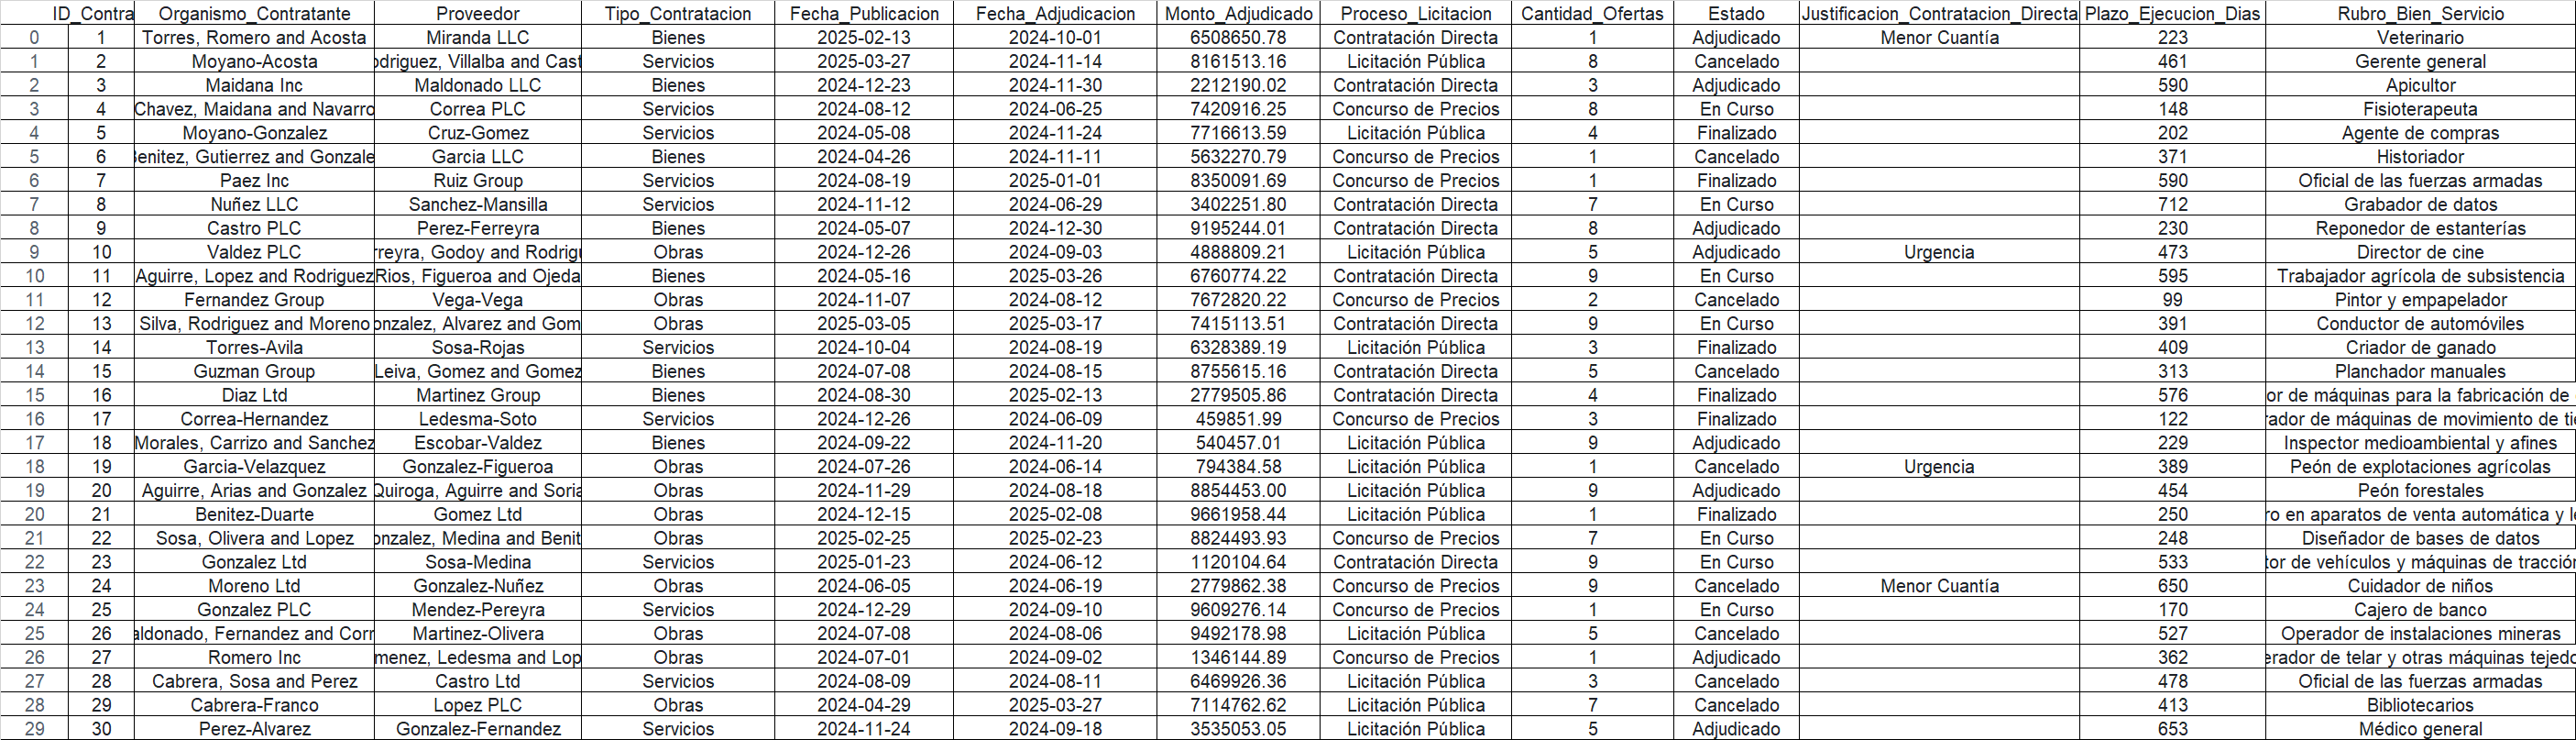

### ALGORITMO -XVI-  Deteccion de fraude de contrataciones, mayores costos

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# 1. Generación de datos abiertos simulados (Ejemplo: Contrataciones Públicas)

num_contratos = 30
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_contrataciones.csv"
try:
    df_contrataciones = pd.read_csv(url)
except Exception as e:
    print(f"Error al leer el archivo CSV desde la URL: {e}")
    df_contrataciones = pd.DataFrame() # Initialize an empty DataFrame if reading fails
    exit()

if df_contrataciones.empty:
    print("No se pudo cargar el DataFrame de contrataciones. El análisis no se puede realizar.")
else:
    # Convert date columns to datetime objects if they exist
    date_columns = ['Fecha_Publicacion', 'Fecha_Adjudicacion']
    for col in date_columns:
        if col in df_contrataciones.columns:
            try:
                df_contrataciones[col] = pd.to_datetime(df_contrataciones[col], errors='coerce')
            except ValueError:
                print(f"Advertencia: La columna '{col}' no pudo ser convertida a datetime.")

    # 2. Simulación de Indicadores de Irregularidades

    # a) Contrataciones Directas sin Justificación Clara
    if 'Proceso_Licitacion' in df_contrataciones.columns and 'Justificacion_Contratacion_Directa' in df_contrataciones.columns:
        df_contrataciones['Sin_Justificacion_CD'] = np.where((df_contrataciones['Proceso_Licitacion'] == 'Contratación Directa') & (df_contrataciones['Justificacion_Contratacion_Directa'].isnull() | (df_contrataciones['Justificacion_Contratacion_Directa'] == '')), 1, 0)
    else:
        print("Advertencia: Las columnas 'Proceso_Licitacion' y/o 'Justificacion_Contratacion_Directa' no están presentes en el DataFrame.")
        df_contrataciones['Sin_Justificacion_CD'] = 0

    # b) Pocas Ofertas en Licitaciones de Monto Alto
    umbral_monto_alto = 100000
    if 'Proceso_Licitacion' in df_contrataciones.columns and 'Monto_Adjudicado' in df_contrataciones.columns and 'Cantidad_Ofertas' in df_contrataciones.columns:
        df_contrataciones['Pocas_Ofertas_Alto_Monto'] = np.where((df_contrataciones['Proceso_Licitacion'] == 'Licitación Pública') &
                                                                (df_contrataciones['Monto_Adjudicado'] > umbral_monto_alto) &
                                                                (df_contrataciones['Cantidad_Ofertas'] <= 2), 1, 0)
    else:
        print("Advertencia: Las columnas 'Proceso_Licitacion', 'Monto_Adjudicado' y/o 'Cantidad_Ofertas' no están presentes en el DataFrame.")
        df_contrataciones['Pocas_Ofertas_Alto_Monto'] = 0

    # c) Plazos de Ejecución Inusualmente Cortos para Obras
    if 'Tipo_Contratacion' in df_contrataciones.columns and 'Plazo_Ejecucion_Dias' in df_contrataciones.columns:
        df_obras = df_contrataciones[df_contrataciones['Tipo_Contratacion'] == 'Obras'].copy()
        umbral_plazo_corto = 30 # Días
        df_contrataciones['Plazo_Corto_Obras'] = 0
        df_contrataciones.loc[df_obras.index, 'Plazo_Corto_Obras'] = np.where(df_obras['Plazo_Ejecucion_Dias'] < umbral_plazo_corto, 1, 0)
    else:
        print("Advertencia: Las columnas 'Tipo_Contratacion' y/o 'Plazo_Ejecucion_Dias' no están presentes en el DataFrame.")
        df_contrataciones['Plazo_Corto_Obras'] = 0

    # d) Contrataciones con el Mismo Proveedor Frecuentemente (Ejemplo Simplificado)
    if 'Proveedor' in df_contrataciones.columns:
        proveedores_frecuentes = df_contrataciones['Proveedor'].value_counts()
        proveedores_sospechosos = proveedores_frecuentes[proveedores_frecuentes > 5].index.tolist() # Más de 5 contratos
        df_contrataciones['Proveedor_Frecuente'] = df_contrataciones['Proveedor'].apply(lambda x: 1 if x in proveedores_sospechosos else 0)
    else:
        print("Advertencia: La columna 'Proveedor' no está presente en el DataFrame.")
        df_contrataciones['Proveedor_Frecuente'] = 0

    # e) Adjudicaciones en Fechas Cercanas a la Publicación (Posible Urgencia Mal Justificada)
    if 'Fecha_Adjudicacion' in df_contrataciones.columns and 'Fecha_Publicacion' in df_contrataciones.columns:
        df_contrataciones['Dias_Publicacion_Adjudicacion'] = (df_contrataciones['Fecha_Adjudicacion'] - df_contrataciones['Fecha_Publicacion']).dt.days
        umbral_dias_cercanos = 7
        df_contrataciones['Adjudicacion_Rapida'] = np.where(df_contrataciones['Dias_Publicacion_Adjudicacion'] < umbral_dias_cercanos, 1, 0)
    else:
        print("Advertencia: Las columnas 'Fecha_Adjudicacion' y/o 'Fecha_Publicacion' no están presentes en el DataFrame.")
        df_contrataciones['Dias_Publicacion_Adjudicacion'] = np.nan
        df_contrataciones['Adjudicacion_Rapida'] = 0

    # 3. Identificación de Posibles Irregularidades (Combinación de Indicadores)
    if 'Sin_Justificacion_CD' in df_contrataciones.columns and \
       'Pocas_Ofertas_Alto_Monto' in df_contrataciones.columns and \
       'Plazo_Corto_Obras' in df_contrataciones.columns and \
       'Proveedor_Frecuente' in df_contrataciones.columns and \
       'Adjudicacion_Rapida' in df_contrataciones.columns:
        df_contrataciones['Sospecha_Irregularidad'] = (df_contrataciones['Sin_Justificacion_CD'] == 1) | \
                                                     (df_contrataciones['Pocas_Ofertas_Alto_Monto'] == 1) | \
                                                     (df_contrataciones['Plazo_Corto_Obras'] == 1) | \
                                                     (df_contrataciones['Proveedor_Frecuente'] == 1) | \
                                                     (df_contrataciones['Adjudicacion_Rapida'] == 1)
    else:
        print("Advertencia: Uno o más indicadores de irregularidades no se pudieron calcular correctamente.")
        df_contrataciones['Sospecha_Irregularidad'] = False

    # 4. Análisis y Visualización de Resultados
    print("Análisis de Datos Abiertos (Ejemplo: Contrataciones Públicas):")

    # a) Contrataciones Directas sin Justificación
    if 'Sin_Justificacion_CD' in df_contrataciones.columns and 'ID_Contrato' in df_contrataciones.columns and 'Organismo_Contratante' in df_contrataciones.columns and 'Proveedor' in df_contrataciones.columns and 'Tipo_Contratacion' in df_contrataciones.columns and 'Proceso_Licitacion' in df_contrataciones.columns and 'Monto_Adjudicado' in df_contrataciones.columns and 'Justificacion_Contratacion_Directa' in df_contrataciones.columns:
        contrataciones_sin_justificacion = df_contrataciones[df_contrataciones['Sin_Justificacion_CD'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Justificacion_Contratacion_Directa']]
        if not contrataciones_sin_justificacion.empty:
            print("\nContrataciones Directas sin Justificación Clara:")
            print(contrataciones_sin_justificacion)
        else:
            print("\nNo se encontraron contrataciones directas sin justificación clara.")
    else:
        print("\nNo se pudo realizar el análisis de contrataciones directas sin justificación debido a la falta de columnas necesarias.")

    # b) Licitaciones con Pocas Ofertas y Monto Alto
    if 'Pocas_Ofertas_Alto_Monto' in df_contrataciones.columns and 'ID_Contrato' in df_contrataciones.columns and 'Organismo_Contratante' in df_contrataciones.columns and 'Proveedor' in df_contrataciones.columns and 'Tipo_Contratacion' in df_contrataciones.columns and 'Proceso_Licitacion' in df_contrataciones.columns and 'Monto_Adjudicado' in df_contrataciones.columns and 'Cantidad_Ofertas' in df_contrataciones.columns:
        licitaciones_pocas_ofertas = df_contrataciones[df_contrataciones['Pocas_Ofertas_Alto_Monto'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Cantidad_Ofertas']]
        if not licitaciones_pocas_ofertas.empty:
            print("\nLicitaciones Públicas con Pocas Ofertas y Monto Alto:")
            print(licitaciones_pocas_ofertas)
        else:
            print("\nNo se encontraron licitaciones con pocas ofertas y monto alto.")
    else:
        print("\nNo se pudo realizar el análisis de licitaciones con pocas ofertas debido a la falta de columnas necesarias.")

    # c) Obras con Plazos de Ejecución Cortos
    if 'Plazo_Corto_Obras' in df_contrataciones.columns and 'ID_Contrato' in df_contrataciones.columns and 'Organismo_Contratante' in df_contrataciones.columns and 'Proveedor' in df_contrataciones.columns and 'Tipo_Contratacion' in df_contrataciones.columns and 'Monto_Adjudicado' in df_contrataciones.columns and 'Plazo_Ejecucion_Dias' in df_contrataciones.columns:
        obras_plazo_corto = df_contrataciones[df_contrataciones['Plazo_Corto_Obras'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado', 'Plazo_Ejecucion_Dias']]
        if not obras_plazo_corto.empty:
            print("\nObras con Plazos de Ejecución Inusualmente Cortos:")
            print(obras_plazo_corto)
        else:
            print("\nNo se encontraron obras con plazos de ejecución inusualmente cortos.")
    else:
        print("\nNo se pudo realizar el análisis de obras con plazos cortos debido a la falta de columnas necesarias.")

    # d) Proveedores Frecuentes
    if 'Proveedor_Frecuente' in df_contrataciones.columns and 'ID_Contrato' in df_contrataciones.columns and 'Organismo_Contratante' in df_contrataciones.columns and 'Proveedor' in df_contrataciones.columns and 'Tipo_Contratacion' in df_contrataciones.columns and 'Monto_Adjudicado' in df_contrataciones.columns:
        proveedores_frecuentes_df = df_contrataciones[df_contrataciones['Proveedor_Frecuente'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Monto_Adjudicado']]
        if not proveedores_frecuentes_df.empty:
            print("\nContratos con Proveedores Frecuentes:")
            print(proveedores_frecuentes_df.groupby('Proveedor')['ID_Contrato'].count().sort_values(ascending=False))
        else:
            print("\nNo se encontraron proveedores con alta frecuencia de contratos.")
    else:
        print("\nNo se pudo realizar el análisis de proveedores frecuentes debido a la falta de columnas necesarias.")

    # e) Adjudicaciones Rápidas
    if 'Adjudicacion_Rapida' in df_contrataciones.columns and 'ID_Contrato' in df_contrataciones.columns and 'Organismo_Contratante' in df_contrataciones.columns and 'Proveedor' in df_contrataciones.columns and 'Tipo_Contratacion' in df_contrataciones.columns and 'Fecha_Publicacion' in df_contrataciones.columns and 'Fecha_Adjudicacion' in df_contrataciones.columns and 'Dias_Publicacion_Adjudicacion' in df_contrataciones.columns:
        adjudicaciones_rapidas = df_contrataciones[df_contrataciones['Adjudicacion_Rapida'] == 1][['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Fecha_Publicacion', 'Fecha_Adjudicacion', 'Dias_Publicacion_Adjudicacion']]
        if not adjudicaciones_rapidas.empty:
            print("\nAdjudicaciones Realizadas en un Corto Período de Tiempo:")
            print(adjudicaciones_rapidas)
        else:
            print("\nNo se encontraron adjudicaciones realizadas en un corto período de tiempo.")
    else:
        print("\nNo se pudo realizar el análisis de adjudicaciones rápidas debido a la falta de columnas necesarias.")

    # f) Resumen de Posibles Irregularidades
    if 'Sospecha_Irregularidad' in df_contrataciones.columns and 'ID_Contrato' in df_contrataciones.columns and 'Organismo_Contratante' in df_contrataciones.columns and 'Proveedor' in df_contrataciones.columns and 'Tipo_Contratacion' in df_contrataciones.columns and 'Proceso_Licitacion' in df_contrataciones.columns and 'Monto_Adjudicado' in df_contrataciones.columns and 'Estado' in df_contrataciones.columns:
        casos_sospechosos = df_contrataciones[df_contrataciones['Sospecha_Irregularidad'] == True]
        if not casos_sospechosos.empty:
            print("\nResumen de Contratos con Posibles Irregularidades:")
            print(casos_sospechosos[['ID_Contrato', 'Organismo_Contratante', 'Proveedor', 'Tipo_Contratacion', 'Proceso_Licitacion', 'Monto_Adjudicado', 'Estado', 'Sospecha_Irregularidad']])
            print(f"\nTotal de contratos con posibles irregularidades: {len(casos_sospechosos)}")
        else:
            print("\nNo se detectaron indicios de irregularidades en los datos cargados.")
    else:
        print("\nNo se pudo generar el resumen de posibles irregularidades debido a la falta de columnas necesarias.")

Análisis de Datos Abiertos (Ejemplo: Contrataciones Públicas):

Contrataciones Directas sin Justificación Clara:
    ID_Contrato         Organismo_Contratante                    Proveedor  \
2             3                   Maidana Inc                Maldonado LLC   
7             8                     Nuñez LLC             Sanchez-Mansilla   
8             9                    Castro PLC               Perez-Ferreyra   
10           11  Aguirre, Lopez and Rodriguez     Rios, Figueroa and Ojeda   
12           13   Silva, Rodriguez and Moreno  Gonzalez, Alvarez and Gomez   
14           15                  Guzman Group       Leiva, Gomez and Gomez   
15           16                      Diaz Ltd               Martinez Group   
22           23                  Gonzalez Ltd                  Sosa-Medina   

   Tipo_Contratacion    Proceso_Licitacion  Monto_Adjudicado  \
2             Bienes  Contratación Directa        2212190.02   
7          Servicios  Contratación Directa        340225

### ALGORITMO -XVII-  Deteccion de Corrupcion en el ambito politico

In [ ]:
import pandas as pd
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random

# 1. Generación de un dataset simulado para corrupción en el ámbito político
fake = Faker('es_AR')

num_politicos = 55
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_politica.csv"
df_politica = pd.read_csv(url)
df_politica

# 2. Inserción de Casos Sospechosos Simulados
num_sospechosos = int(num_politicos * 0.15) # 15% de políticos sospechosos
# Error: 'sospechosos_indices' was not defined. It should be calculated here.
sospechoso_indices = np.random.choice(df_politica.index, num_sospechosos, replace=False)
df_politica.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos (ejemplos de corrupción)
for idx in sospechoso_indices:
    if random.random() < 0.4: # 40% de casos: Incremento patrimonial significativo
        df_politica.loc[idx, 'Incremento_Patrimonial_Ultimo_Año'] = np.random.uniform(150000, 500000)
    elif random.random() < 0.3: # 30% de casos: Donaciones elevadas y pocos gastos de campaña
        df_politica.loc[idx, 'Donaciones_Recibidas'] = np.random.uniform(100000, 300000)
        df_politica.loc[idx, 'Gastos_Campania'] = np.random.uniform(5000, 50000)
    elif random.random() < 0.3: # 30% de casos: Vínculos empresariales no declarados (simulado)
        df_politica.loc[idx, 'Vinculos_Empresariales'] = 'No Declarados'
    if random.random() < 0.2: # 20% de casos: Múltiples denuncias previas
        df_politica.loc[idx, 'Denuncias_Previas'] = random.randint(2, 5)
    if random.random() < 0.1: # 10% de casos: Cargo de alto nivel y aumento patrimonial
        if df_politica.loc[idx, 'Cargo'] in ['Ministro', 'Senador']:
            df_politica.loc[idx, 'Incremento_Patrimonial_Ultimo_Año'] *= random.uniform(2, 4)

# 3. Ingeniería de Características
# a) Relación Incremento/Patrimonio (Ejemplo: Incremento desproporcionado)
df_politica['Ratio_Incremento_Patrimonio'] = df_politica['Incremento_Patrimonial_Ultimo_Año'] / (df_politica['Declaracion_Patrimonial_Ultimo_Año'] + 1e-6) # Evitar división por cero

# b) Gastos de Campaña vs. Donaciones (Ejemplo: Gastos bajos con altas donaciones)
df_politica['Ratio_Gastos_Donaciones'] = df_politica['Gastos_Campania'] / (df_politica['Donaciones_Recibidas'] + 1e-6)

# c) ¿Alto Incremento Patrimonial?
umbral_alto_incremento = 100000
df_politica['Incremento_Alto'] = (df_politica['Incremento_Patrimonial_Ultimo_Año'] > umbral_alto_incremento).astype(int)

# d) ¿Muchas Denuncias Previas?
umbral_denuncias = 1
df_politica['Muchas_Denuncias'] = (df_politica['Denuncias_Previas'] > umbral_denuncias).astype(int)

# e) Codificación de variables categóricas
le_cargo = LabelEncoder()
df_politica['Cargo_Cod'] = le_cargo.fit_transform(df_politica['Cargo'])

le_partido = LabelEncoder()
df_politica['Partido_Politico_Cod'] = le_partido.fit_transform(df_politica['Partido_Politico'])

le_vinculos = LabelEncoder()
df_politica['Vinculos_Empresariales_Cod'] = le_vinculos.fit_transform(df_politica['Vinculos_Empresariales'])

# 4. Selección de Características y Preparación de Datos
features = ['Declaracion_Patrimonial_Ultimo_Año', 'Incremento_Patrimonial_Ultimo_Año',
            'Donaciones_Recibidas', 'Gastos_Campania', 'Ratio_Incremento_Patrimonio',
            'Ratio_Gastos_Donaciones', 'Incremento_Alto', 'Muchas_Denuncias',
            'Cargo_Cod', 'Partido_Politico_Cod', 'Vinculos_Empresariales_Cod']
X = df_politica[features]
y = df_politica['Es_Sospechoso']

# Manejo de valores faltantes (si los hubiera)
X = X.fillna(0)

# 5. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalado de Características (para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Entrenamiento del Modelo de Clasificación (Random Forest)
print("\n7. Entrenamiento del Modelo para Corrupción en el Ámbito Político (Random Forest):")
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 8. Evaluación del Modelo
print("\n8. Evaluación del Modelo:")
print("Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# 9. Análisis de los Políticos Detectados como Sospechosos
df_test = df_politica.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
politicos_sospechosos = df_test[df_test['Prediccion_Sospechoso'] == 1][['ID_Politico', 'Nombre_Apellido', 'Cargo', 'Partido_Politico', 'Declaracion_Patrimonial_Ultimo_Año', 'Incremento_Patrimonial_Ultimo_Año', 'Donaciones_Recibidas', 'Gastos_Campania', 'Vinculos_Empresariales', 'Denuncias_Previas', 'Es_Sospechoso', 'Prediccion_Sospechoso']]
print("\n9. Políticos Detectados como Potencialmente Sospechosos:")
print(politicos_sospechosos)

# 10. Análisis de Importancia de Características
if hasattr(model, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\n10. Importancia de las Características (Random Forest):")
    print(importancia_caracteristicas)


7. Entrenamiento del Modelo para Corrupción en el Ámbito Político (Random Forest):

8. Evaluación del Modelo:
Precisión del Modelo: 0.5555555555555556

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.50      1.00      0.67         4
   Sospechoso       1.00      0.20      0.33         5

     accuracy                           0.56         9
    macro avg       0.75      0.60      0.50         9
 weighted avg       0.78      0.56      0.48         9


Matriz de Confusión:
 [[4 0]
 [4 1]]

9. Políticos Detectados como Potencialmente Sospechosos:
    ID_Politico                      Nombre_Apellido       Cargo  \
15           16  Juan Maria Victoria Carrizo Benitez  Intendente   

   Partido_Politico  Declaracion_Patrimonial_Ultimo_Año  \
15  Laborum Partido                          5278863.25   

    Incremento_Patrimonial_Ultimo_Año  Donaciones_Recibidas  Gastos_Campania  \
15                      300045.399161              1636

**Parte 4: Implementación y Desafíos**
**Capítulo 9: Implementación Práctica de Soluciones Basadas en Algoritmos**
9.1 Diseño y Desarrollo de Sistemas de Detección de Fraude y Corrupción
9.2 Integración de Algoritmos en Sistemas Existentes
9.3 Consideraciones Técnicas y Tecnológicas

### ALGORITMO -XVIII- Deteccion fraude de Rendiciones de cuenta

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import timedelta
from sklearn.model_selection import (
    cross_val_score,
    StratifiedKFold,
    train_test_split,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
)

# 1. Simulación de Datos de Rendiciones de Cuenta Internas
fake = Faker("es_AR")
num_rendiciones = 250
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_rendiciones1.csv"
data_rendiciones = pd.read_csv(url)
df_rendiciones = pd.DataFrame(data_rendiciones)
df_rendiciones["Fecha_Presentacion"] = pd.to_datetime(
    df_rendiciones["Fecha_Presentacion"]
)

# 2. Simulación de Casos de Fraude Interno
num_sospechosos = int(num_rendiciones * 0.07)
sospechosos_indices = np.random.choice(
    df_rendiciones.index, num_sospechosos, replace=False
)
df_rendiciones.loc[sospechosos_indices, "Es_Sospechoso"] = 1

for idx in sospechosos_indices:
    if random.random() < 0.4:
        fecha_base = df_rendiciones.loc[idx, "Fecha_Presentacion"]
        if idx + 1 < len(df_rendiciones):
            df_rendiciones.loc[
                idx + 1, "Fecha_Presentacion"
            ] = fecha_base + timedelta(days=random.randint(0, 5))
            df_rendiciones.loc[idx + 1, "Empleado"] = df_rendiciones.loc[
                idx, "Empleado"
            ]
            df_rendiciones.loc[idx + 1, "Tipo_Gasto"] = df_rendiciones.loc[
                idx, "Tipo_Gasto"
            ]
            df_rendiciones.loc[idx + 1, "Monto"] = (
                df_rendiciones.loc[idx, "Monto"] * random.uniform(0.8, 1.2)
            )
            df_rendiciones.loc[idx + 1, "Es_Sospechoso"] = 1
    elif random.random() < 0.3:
        df_rendiciones.loc[idx, "Tipo_Gasto"] = "Otros"
        df_rendiciones.loc[idx, "Monto"] = np.random.uniform(800, 2000)
    elif random.random() < 0.3:
        df_rendiciones.loc[idx, "Justificante_Adjunto"] = "No"
        df_rendiciones.loc[idx, "Monto"] = np.random.uniform(300, 700)
    if random.random() < 0.2:
        df_rendiciones.loc[idx, "Tipo_Gasto"] = "Viáticos"
        df_rendiciones.loc[idx, "Monto"] = np.random.uniform(400, 1000)
        fecha = df_rendiciones.loc[idx, "Fecha_Presentacion"]
        if fecha.weekday() >= 4:
            df_rendiciones.loc[idx, "Fecha_Presentacion"] = fecha - timedelta(
                days=random.randint(0, 2)
            )

# 3. Ingeniería de Características para la Detección de Fraude Interno
df_rendiciones["Monto_Promedio_Tipo"] = df_rendiciones.groupby(
    "Tipo_Gasto"
)["Monto"].transform("mean")
df_rendiciones["Monto_Alto_Relativo"] = np.where(
    df_rendiciones["Monto"] > df_rendiciones["Monto_Promedio_Tipo"] * 2.5, 1, 0
)

umbral_justificante = 200
df_rendiciones["Sin_Justificante_Alto_Monto"] = np.where(
    (df_rendiciones["Justificante_Adjunto"] == "No")
    & (df_rendiciones["Monto"] > umbral_justificante),
    1,
    0,
)

umbral_otros_monto = 500
df_rendiciones["Otros_Monto_Elevado"] = np.where(
    (df_rendiciones["Tipo_Gasto"] == "Otros")
    & (df_rendiciones["Monto"] > umbral_otros_monto),
    1,
    0,
)

# d) Frecuencia de Gastos por Empleado (Ejemplo: Muchos gastos en poco tiempo)
df_rendiciones["Fecha_Truncada"] = df_rendiciones["Fecha_Presentacion"].dt.date
frecuencia_empleado = (
    df_rendiciones.groupby(["Empleado", "Fecha_Truncada"])
    .size()
    .reset_index(name="Frecuencia")
)

df_rendiciones = pd.merge(
    df_rendiciones,
    frecuencia_empleado,
    on=["Empleado", "Fecha_Truncada"],
    how="left",
)

# Comprobación de la existencia de la columna 'Frecuencia'
if "Frecuencia" in df_rendiciones.columns:
    df_rendiciones["Gastos_Frecuentes"] = (
        df_rendiciones["Frecuencia"] > 3
    ).fillna(0).astype(int)
else:
    print("Error: La columna 'Frecuencia' no se creó correctamente durante la fusión.")

df_rendiciones["Dia_Semana"] = df_rendiciones[
    "Fecha_Presentacion"
].dt.dayofweek
df_rendiciones["Viaticos_Fin_Semana"] = np.where(
    (df_rendiciones["Tipo_Gasto"] == "Viáticos")
    & (df_rendiciones["Dia_Semana"] >= 4),
    1,
    0,
)

palabras_genericas = ["pago", "gasto", "servicio"]
df_rendiciones["Descripcion_Generica"] = df_rendiciones[
    "Descripcion"
].apply(
    lambda x: 1
    if any(palabra in x.lower() for palabra in palabras_genericas)
    else 0
)
umbral_descripcion_generica_monto = 300
df_rendiciones["Descripcion_Generica_Monto_Alto"] = np.where(
    (df_rendiciones["Descripcion_Generica"] == 1)
    & (df_rendiciones["Monto"] > umbral_descripcion_generica_monto),
    1,
    0,
)

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = [
    "Monto",
    "Monto_Alto_Relativo",
    "Sin_Justificante_Alto_Monto",
    "Otros_Monto_Elevado",
    "Gastos_Frecuentes",
    "Viaticos_Fin_Semana",
    "Descripcion_Generica_Monto_Alto",
    "Monto_Promedio_Tipo",
]
X = df_rendiciones[features]
y = df_rendiciones["Es_Sospechoso"]
X = X.fillna(0)

# 5. Diseño del Sistema de Detección de Fraude Interno (Modelo de IA)
print("\nCódigo para Detección de Fraude Interno en Rendiciones de Cuenta")
print("\nEjemplo de un Sistema de Detección de Fraude Interno (Modelo de IA):")

modelo_deteccion_fraude_interno = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    modelo_deteccion_fraude_interno, X, y, cv=cv, scoring="accuracy"
)
print(f"\nPrecisión de Validación Cruzada: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude_interno.fit(X_train_scaled, y_train)
y_pred_fraude_interno = modelo_deteccion_fraude_interno.predict(
    X_test_scaled
)

print("\nEvaluación en el conjunto de prueba:")
print(
    "Precisión:", accuracy_score(y_test, y_pred_fraude_interno)
)
print(
    "\nReporte de Clasificación:\n",
    classification_report(
        y_test,
        y_pred_fraude_interno,
        target_names=["No Sospechoso", "Sospechoso"],
    ),
)
print(
    "\nMatriz de Confusión:\n",
    confusion_matrix(y_test, y_pred_fraude_interno),
)

# ... (El resto del código se queda igual)
# a) Monto Relativo al Promedio por Tipo de Gasto
df_rendiciones['Monto_Promedio_Tipo'] = df_rendiciones.groupby('Tipo_Gasto')['Monto'].transform('mean')
df_rendiciones['Monto_Alto_Relativo'] = np.where(df_rendiciones['Monto'] > df_rendiciones['Monto_Promedio_Tipo'] * 2.5, 1, 0)

# b) Ausencia de Justificante para Montos Significativos
umbral_justificante = 200
df_rendiciones['Sin_Justificante_Alto_Monto'] = np.where((df_rendiciones['Justificante_Adjunto'] == 'No') &
                                                     (df_rendiciones['Monto'] > umbral_justificante), 1, 0)

# c) Gastos "Otros" con Monto Elevado
umbral_otros_monto = 500
df_rendiciones['Otros_Monto_Elevado'] = np.where((df_rendiciones['Tipo_Gasto'] == 'Otros') &
                                                  (df_rendiciones['Monto'] > umbral_otros_monto), 1, 0)



# d) Gastos de Viáticos en Fines de Semana
df_rendiciones['Dia_Semana'] = df_rendiciones['Fecha_Presentacion'].dt.dayofweek  # 0: Lunes, 6: Domingo
df_rendiciones['Viaticos_Fin_Semana'] = np.where((df_rendiciones['Tipo_Gasto'] == 'Viáticos') &
                                                  (df_rendiciones['Dia_Semana'] >= 4), 1, 0)  # Viernes (4) a Domingo (6)

# e) Descripción Genérica con Monto Alto
palabras_genericas = ['pago', 'gasto', 'servicio']
df_rendiciones['Descripcion_Generica'] = df_rendiciones['Descripcion'].apply(
    lambda x: 1 if any(palabra in x.lower() for palabra in palabras_genericas) else 0)
umbral_descripcion_generica_monto = 300
df_rendiciones['Descripcion_Generica_Monto_Alto'] = np.where((df_rendiciones['Descripcion_Generica'] == 1) & (df_rendiciones['Monto'] > umbral_descripcion_generica_monto), 1, 0)

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = ['Monto', 'Monto_Alto_Relativo', 'Sin_Justificante_Alto_Monto',
            'Otros_Monto_Elevado', 'Gastos_Frecuentes', 'Viaticos_Fin_Semana',
            'Descripcion_Generica_Monto_Alto', 'Monto_Promedio_Tipo']  # Incluimos la media para ver su importancia
X = df_rendiciones[features]
y = df_rendiciones['Es_Sospechoso']
X = X.fillna(0)

# 5. Diseño del Sistema de Detección de Fraude Interno (Modelo de IA)
print("\nCódigo para Detección de Fraude Interno en Rendiciones de Cuenta")
print("\nEjemplo de un Sistema de Detección de Fraude Interno (Modelo de IA):")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude_interno = RandomForestClassifier(random_state=42)
modelo_deteccion_fraude_interno.fit(X_train_scaled, y_train)
y_pred_fraude_interno = modelo_deteccion_fraude_interno.predict(X_test_scaled)

print("\nEvaluación del Modelo de Detección de Fraude Interno:")
print("Precisión:", accuracy_score(y_test, y_pred_fraude_interno))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_fraude_interno,
                                                        target_names=['No Sospechoso', 'Sospechoso']))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_fraude_interno))

# 6. Simulación de la Aplicación del Sistema
print("\nEjemplo de cómo el Sistema podría identificar rendiciones sospechosas:")

df_test = df_rendiciones.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred_fraude_interno
rendiciones_sospechosas = df_test[df_test['Prediccion_Sospechoso'] == 1][
    ['ID_Rendicion', 'Fecha_Presentacion', 'Empleado', 'Departamento', 'Tipo_Gasto', 'Monto',
     'Justificante_Adjunto', 'Estado_Aprobacion', 'Es_Sospechoso', 'Prediccion_Sospechoso']]

if not rendiciones_sospechosas.empty:
    print("\nRendiciones de Cuenta Marcadas como Sospechosas por el Sistema:")
    print(rendiciones_sospechosas)
    print("\nEstas rendiciones podrían requerir una revisión más exhaustiva.")
else:
    print("\nEl sistema no detectó rendiciones sospechosas en el conjunto de prueba simulado.")

# 7. Análisis de Importancia de Características
if hasattr(modelo_deteccion_fraude_interno, 'feature_importances_'):
    importancia_caracteristicas = pd.DataFrame(
        {'Caracteristica': features, 'Importancia': modelo_deteccion_fraude_interno.feature_importances_})
    importancia_caracteristicas = importancia_caracteristicas.sort_values(by='Importancia', ascending=False)
    print("\nAnálisis de Importancia de las Características:")
    print(importancia_caracteristicas)



Código para Detección de Fraude Interno en Rendiciones de Cuenta

Ejemplo de un Sistema de Detección de Fraude Interno (Modelo de IA):

Precisión de Validación Cruzada: 0.7333 (+/- 0.1333)

Evaluación en el conjunto de prueba:
Precisión: 0.8888888888888888

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.00      0.00      0.00         1
   Sospechoso       0.89      1.00      0.94         8

     accuracy                           0.89         9
    macro avg       0.44      0.50      0.47         9
 weighted avg       0.79      0.89      0.84         9


Matriz de Confusión:
 [[0 1]
 [0 8]]

Código para Detección de Fraude Interno en Rendiciones de Cuenta

Ejemplo de un Sistema de Detección de Fraude Interno (Modelo de IA):

Evaluación del Modelo de Detección de Fraude Interno:
Precisión: 0.8888888888888888

Reporte de Clasificación:
                precision    recall  f1-score   support

No Sospechoso       0.00      0.00    

### ALGORITMO -XIX- Deteccion de fraudes en tarjetas de credito

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 1. Simulación de Datos de Transacciones con Tarjeta de Crédito
fake = Faker('es_AR')
num_transacciones = 500
url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_tarjetas.csv"
data_tarjetas = pd.read_csv(url)
df_tarjetas = pd.DataFrame(data_tarjetas)

# Asegúrate de que la columna 'Fecha_Hora' sea de tipo datetime
df_tarjetas['Fecha_Hora'] = pd.to_datetime(df_tarjetas['Fecha_Hora'])

for idx in range(len(df_tarjetas) - 1): # Modificación para evitar el error de índice
    fecha_base = df_tarjetas.loc[idx, 'Fecha_Hora']
    if pd.notnull(fecha_base): # Asegura que la fecha base no sea null
        if idx + 1 < len(df_tarjetas):
            df_tarjetas.loc[idx + 1, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(1, 5))
            df_tarjetas.loc[idx + 1, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 1, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
    else:
        print(f"Advertencia: Fecha_Hora en el índice {idx} es nula.")

# 2. Simulación de Casos de Fraude en Tarjetas de Crédito
num_fraudes = int(num_transacciones * 0.05)
fraude_indices = np.random.choice(df_tarjetas.index, num_fraudes, replace=False)
df_tarjetas.loc[fraude_indices, 'Es_Fraudulenta'] = 1

for idx in fraude_indices:
    if random.random() < 0.4: # Transacciones en ubicaciones geográficas inusuales
        df_tarjetas.loc[idx, 'Ubicacion_Comercio'] = fake.city() + ", " + fake.country() if random.random() < 0.8 else fake.city() + ", " + "Otro País"
    elif random.random() < 0.3: # Montos altos en comercios de bajo valor (ejemplo)
        df_tarjetas.loc[idx, 'Monto'] = np.random.uniform(500, 2000)
        df_tarjetas.loc[idx, 'Comercio'] = random.choice(['Tienda de Abarrotes', 'Kiosco', 'Cafetería'])
    elif random.random() < 0.3: # Múltiples transacciones rápidas y en el mismo comercio
        fecha_base = df_tarjetas.loc[idx, 'Fecha_Hora']
        if idx + 1 < len(df_tarjetas):
            df_tarjetas.loc[idx + 1, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(1, 5))
            df_tarjetas.loc[idx + 1, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 1, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
            df_tarjetas.loc[idx + 1, 'Monto'] = np.random.uniform(20, 150)
            df_tarjetas.loc[idx + 1, 'Es_Fraudulenta'] = 1
        if idx + 2 < len(df_tarjetas) and random.random() < 0.5:
            df_tarjetas.loc[idx + 2, 'Fecha_Hora'] = fecha_base + timedelta(minutes=random.randint(2, 7))
            df_tarjetas.loc[idx + 2, 'ID_Tarjeta'] = df_tarjetas.loc[idx, 'ID_Tarjeta']
            df_tarjetas.loc[idx + 2, 'Comercio'] = df_tarjetas.loc[idx, 'Comercio']
            df_tarjetas.loc[idx + 2, 'Monto'] = np.random.uniform(10, 100)
            df_tarjetas.loc[idx + 2, 'Es_Fraudulenta'] = 1
    if random.random() < 0.2: # Retiros en cajeros automáticos en lugares sospechosos (ejemplo)
        df_tarjetas.loc[idx, 'Tipo_Transaccion'] = 'Retiro'
        df_tarjetas.loc[idx, 'Ubicacion_Comercio'] = fake.city() + ", " + "Otro País"
        df_tarjetas.loc[idx, 'Monto'] = np.random.uniform(200, 500)

# 3. Ingeniería de Características para la Detección de Fraude

# a) Monto Alto
umbral_monto_alto = 750
df_tarjetas['Monto_Alto'] = (df_tarjetas['Monto'] > umbral_monto_alto).astype(int)

# b) Transacciones en Diferentes Países
df_tarjetas['Pais_Comercio'] = df_tarjetas['Ubicacion_Comercio'].apply(lambda x: x.split(', ')[1] if isinstance(x, str) and ', ' in x else 'Desconocido')
df_tarjetas['Transaccion_Internacional'] = np.where(df_tarjetas['Pais_Comercio'] != 'Argentina', 1, 0)

# c) Múltiples Transacciones en Corto Período
df_tarjetas['Fecha_Hora_Truncada'] = df_tarjetas['Fecha_Hora'].dt.floor('T') # Truncar a minutos
frecuencia_transacciones = df_tarjetas.groupby(['ID_Tarjeta', 'Fecha_Hora_Truncada']).size().reset_index(name='Frecuencia')
df_tarjetas = pd.merge(df_tarjetas, frecuencia_transacciones, on=['ID_Tarjeta', 'Fecha_Hora_Truncada'], how='left')
df_tarjetas['Transacciones_Rapidas'] = (df_tarjetas['Frecuencia'] > 2).fillna(0).astype(int) # Más de 2 transacciones por minuto

# d) Transacciones en Comercios de Alto Riesgo (Ejemplo Simplificado)
comercios_riesgo = ['Tienda de Joyería', 'Electrónicos', 'Librería Online']
df_tarjetas['Comercio_Riesgo'] = df_tarjetas['Comercio'].apply(lambda x: 1 if any(riesgo in x for riesgo in comercios_riesgo) else 0)

# e) Tipo de Transacción "Retiro" con Monto Alto
df_tarjetas['Retiro_Monto_Alto'] = np.where((df_tarjetas['Tipo_Transaccion'] == 'Retiro') & (df_tarjetas['Monto'] > 300), 1, 0)

# 4. Preparación de Datos para el Modelo de Detección de Fraude
features = ['Monto', 'Monto_Alto', 'Transaccion_Internacional',
            'Transacciones_Rapidas', 'Comercio_Riesgo', 'Retiro_Monto_Alto',
            'Tipo_Transaccion']
X = df_tarjetas[features]
y = df_tarjetas['Es_Fraudulenta']
X = X.fillna(0)

# Codificación de variables categóricas
le_tipo_transaccion = LabelEncoder()
X['Tipo_Transaccion_Cod'] = le_tipo_transaccion.fit_transform(X['Tipo_Transaccion'])
X = X.drop('Tipo_Transaccion', axis=1)
features.remove('Tipo_Transaccion')
features.append('Tipo_Transaccion_Cod')



# 5. Diseño del Sistema de Detección de Fraude (Modelo de IA)
print("\nCódigo para Detección de Fraude en Tarjetas de Crédito")
print("\nEjemplo de un Sistema de Detección de Fraude (Modelo de IA):")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Add stratify=y here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_deteccion_fraude_tarjeta = RandomForestClassifier(random_state=42)
modelo_deteccion_fraude_tarjeta.fit(X_train_scaled, y_train)
y_pred_fraude_tarjeta = modelo_deteccion_fraude_tarjeta.predict(X_test_scaled)

print("\nEvaluación del Modelo de Detección de Fraude en Tarjetas de Crédito:")
print("Precisión:", accuracy_score(y_test, y_pred_fraude_tarjeta))

# Check if both classes are present in y_test
if len(np.unique(y_test)) == 2:
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_fraude_tarjeta, target_names=['No Fraude', 'Fraude']))
else:
    print("\nWarning: Only one class present in y_test. Classification report skipped.")
    print("Unique classes in y_test:", np.unique(y_test))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_fraude_tarjeta))

# ... (rest of your code) ...

# 6. Simulación de la Aplicación del Sistema
print("\nEjemplo de cómo el Sistema podría identificar transacciones sospechosas:")

df_test = df_tarjetas.loc[X_test.index].copy()
df_test['Prediccion_Fraude'] = y_pred_fraude_tarjeta
transacciones_sospechosas = df_test[df_test['Prediccion_Fraude'] == 1][['ID_Transaccion', 'Fecha_Hora', 'ID_Tarjeta', 'Monto', 'Comercio', 'Ubicacion_Comercio', 'Tipo_Transaccion', 'Es_Fraudulenta', 'Prediccion_Fraude']]

if not transacciones_sospechosas.empty:
    print("\nTransacciones de Tarjeta de Crédito Marcadas como Sospechosas por el Sistema:")
    print(transacciones_sospechosas)
    print("\nEstas transacciones podrían requerir una verificación adicional.")
else:
    print("\nEl sistema no detectó transacciones fraudulentas en el conjunto de prueba simulado.")


Código para Detección de Fraude en Tarjetas de Crédito

Ejemplo de un Sistema de Detección de Fraude (Modelo de IA):

Evaluación del Modelo de Detección de Fraude en Tarjetas de Crédito:
Precisión: 1.0

Unique classes in y_test: [1]

Matriz de Confusión:
 [[9]]

Ejemplo de cómo el Sistema podría identificar transacciones sospechosas:

Transacciones de Tarjeta de Crédito Marcadas como Sospechosas por el Sistema:
    ID_Transaccion                 Fecha_Hora     ID_Tarjeta         Monto  \
26              27 2025-03-19 14:46:55.383597  CC-8007016345  28073.720000   
10              11 2025-03-19 13:53:55.383597  CC-8007016345  17625.260000   
29              30 2025-03-19 14:54:55.383597  CC-8007016345     22.753534   
14              15 2025-03-19 14:01:55.383597  CC-8007016345  48277.090000   
20              21 2025-03-19 14:24:55.383597  CC-8007016345  41807.400000   
19              20 2025-03-19 14:20:55.383597  CC-8007016345  11258.630000   
7                8 2025-03-19 13:39:55

In [ ]:
!pip install faker

### Conjunto de datos: Rendiciones de cuenta

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_rendiciones2.csv"
data_rendiciones = pd.read_csv(url)
df_rendiciones = pd.DataFrame(data_rendiciones)

# 1. Simulación de un Sistema Existente (Ejemplo: Sistema de Gestión de Gastos)
class SistemaGestionGastos:
    def __init__(self):
        self.rendiciones = pd.DataFrame()
        self.empleados = {} # Simulación de información de empleados

    def agregar_empleado(self, id_empleado, nombre):
        self.empleados[id_empleado] = {'nombre': nombre}

    def registrar_rendicion(self, id_rendicion, id_empleado, fecha, tipo_gasto, monto, descripcion, justificante='Sí', estado='Pendiente'):  # Añadir 'estado'
        nueva_rendicion = pd.DataFrame([{
            'ID_Rendicion': id_rendicion,
            'ID_Empleado': id_empleado,
            'Fecha': fecha,
            'Tipo_Gasto': tipo_gasto,
            'Monto': monto,
            'Descripcion': descripcion,
            'Justificante_Adjunto': justificante,
            'Estado': estado,  # Usar el estado por defecto o el proporcionado
            'Es_Sospechosa': 0  # Inicialmente no sospechosa
        }])
        self.rendiciones = pd.concat([self.rendiciones, nueva_rendicion], ignore_index=True)
        print(f"Rendición {id_rendicion} registrada para empleado {id_empleado}.")

    def obtener_rendiciones(self):
        return self.rendiciones

    def actualizar_estado_rendicion(self, id_rendicion, nuevo_estado):
        if not self.rendiciones.empty and id_rendicion in self.rendiciones['ID_Rendicion'].values:
            self.rendiciones.loc[self.rendiciones['ID_Rendicion'] == id_rendicion, 'Estado'] = nuevo_estado
            print(f"Estado de rendición {id_rendicion} actualizado a '{nuevo_estado}'.")
        else:
            print(f"Rendición con ID {id_rendicion} no encontrada.")

    def mostrar_rendiciones_sospechosas(self):
        sospechosas = self.rendiciones[self.rendiciones['Es_Sospechosa'] == 1]
        if not sospechosas.empty:
            print("\nRendiciones de Cuenta Marcadas como Sospechosas:")
            print(sospechosas[['ID_Rendicion', 'ID_Empleado', 'Fecha', 'Tipo_Gasto', 'Monto', 'Descripcion', 'Justificante_Adjunto', 'Estado', 'Es_Sospechosa']])  # Incluir Es_Sospechosa
        else:
            print("\nNo se encontraron rendiciones sospechosas.")

# 2. Simulación de un Algoritmo de Detección de Fraude (Ejemplo: Reglas Simples)
def detectar_fraude_simple(rendiciones_df):
    sospechosas_indices = []
    for index, row in rendiciones_df.iterrows():
        if row['Monto'] > 1000 and row['Tipo_Gasto'] == 'Otros':
            sospechosas_indices.append(index)
        elif row['Monto'] > 500 and row['Justificante_Adjunto'] == 'No':
            sospechosas_indices.append(index)
        elif 'viaje' in row['Descripcion'].lower() and row['Monto'] > 300:
            sospechosas_indices.append(index)
    rendiciones_df.loc[rendiciones_df.index.isin(sospechosas_indices), 'Es_Sospechosa'] = 1  # Corregido para usar isin
    return rendiciones_df

# 3. Simulación de un Modelo de Machine Learning (Entrenamiento Básico)
def entrenar_modelo_deteccion_fraude(df):
    #Prepares Dataframe from CSV
    df = df.fillna('Desconocido')
    df['Justificante_Adjunto'] = df['Justificante_Adjunto'].astype(str)
    df['Monto'] = pd.to_numeric(df['Monto'], errors='coerce')
    df = df.dropna(subset=['Monto'])
    df['Es_Sospechoso'] = df['Es_Sospechoso'].astype(int)
    df = df.drop(columns=['ID_Rendicion', 'Empleado', 'Fecha_Presentacion', 'Descripcion', 'Estado_Aprobacion'])

    X_train = df[['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']]
    y_train = df['Es_Sospechoso']

    # Codificación de variables categóricas
    le_tipo = LabelEncoder()
    X_train['Tipo_Gasto'] = le_tipo.fit_transform(X_train['Tipo_Gasto'])
    le_justificante = LabelEncoder()
    X_train['Justificante_Adjunto'] = le_justificante.fit_transform(X_train['Justificante_Adjunto'])

    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    return modelo, le_tipo, le_justificante

def aplicar_modelo_ml(rendiciones_df, modelo, le_tipo, le_justificante):
    if rendiciones_df.empty:
        return rendiciones_df

    if not all(col in rendiciones_df.columns for col in ['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']):
        print("Advertencia: Las columnas necesarias para la predicción no están presentes en el DataFrame.")
        return rendiciones_df

    X_pred = rendiciones_df[['Monto', 'Tipo_Gasto', 'Justificante_Adjunto']].copy()

    # Manejo de valores faltantes (si los hubiera)
    for col in X_pred.columns:
        if X_pred[col].isnull().any():
            print(f"Advertencia: Valores nulos encontrados en la columna '{col}'. Imputando con 'Desconocido' (para categóricas) o 0 (para numéricas).")
            if X_pred[col].dtype == 'object':
                X_pred[col].fillna('Desconocido', inplace=True)
            else:
                X_pred[col].fillna(0, inplace=True)

    try:
        X_pred['Tipo_Gasto_Cod'] = le_tipo.transform(X_pred['Tipo_Gasto'])
    except ValueError as e:
        print(f"Error al codificar 'Tipo_Gasto': {e}")
        print("Categorías conocidas:", le_tipo.classes_)
        print("Categorías problemáticas:", set(X_pred['Tipo_Gasto'].unique()) - set(le_tipo.classes_))
        return rendiciones_df
    try:
        X_pred['Justificante_Adjunto_Cod'] = le_justificante.transform(X_pred['Justificante_Adjunto'])
    except ValueError as e:
        print(f"Error al codificar 'Justificante_Adjunto': {e}")
        print("Categorías conocidas:", le_justificante.classes_)
        print("Categorías problemáticas:", set(X_pred['Justificante_Adjunto'].unique()) - set(le_justificante.classes_))
        return rendiciones_df

    X_pred_encoded = X_pred[['Monto', 'Tipo_Gasto_Cod', 'Justificante_Adjunto_Cod']]

    try:
        predicciones = modelo.predict(X_pred_encoded)
        rendiciones_df['Es_Sospechosa_ML'] = predicciones
        rendiciones_df['Es_Sospechosa'] = rendiciones_df['Es_Sospechosa'].astype(int) | rendiciones_df['Es_Sospechosa_ML'].astype(int)
    except ValueError as e:
        print(f"Error al predecir con el modelo: {e}")
        print("Verifica que las columnas y tipos de datos sean correctos.")
    return rendiciones_df

# 4. Integración del Algoritmo en el Sistema Existente
print("\n9.2 Integración de Algoritmos en Sistemas Existentes")
print("\nSimulación de un Sistema de Gestión de Gastos y la Integración de Algoritmos para Detección de Fraude.")

# Inicializar el sistema de gestión de gastos
sistema_gastos = SistemaGestionGastos()
sistema_gastos.agregar_empleado(1, "Juan Pérez")
sistema_gastos.agregar_empleado(2, "María Gómez")

# Registrar algunas rendiciones de cuenta
sistema_gastos.registrar_rendicion(101, 1, datetime(2024, 10, 20), 'Viáticos', 750.00, "Viaje a Buenos Aires")
sistema_gastos.registrar_rendicion(102, 2, datetime(2024, 10, 21), 'Material de Oficina', 50.00, "Compra de bolígrafos")
sistema_gastos.registrar_rendicion(103, 1, datetime(2024, 10, 22), 'Otros', 1200.00, "Servicios externos", justificante='Sí')
sistema_gastos.registrar_rendicion(104, 2, datetime(2024, 10, 23), 'Almuerzo', 35.00, "Reunión con cliente")
sistema_gastos.registrar_rendicion(105, 1, datetime(2024, 10, 24), 'Otros', 650.00, "Gastos varios", justificante='No')
sistema_gastos.registrar_rendicion(106, 2, datetime(2024, 10, 25), 'Viáticos', 900.00, "Viaje a Córdoba")
sistema_gastos.registrar_rendicion(107, 1, datetime(2024, 10, 26), 'Material de Oficina', 15.00, "Compra de papel")
sistema_gastos.registrar_rendicion(108, 2, datetime(2024, 10, 27), 'Otros', 400.00, "Suministros")
sistema_gastos.registrar_rendicion(109, 1, datetime(2024, 10, 28), 'Almuerzo', 180.00, "Equipo de trabajo")
sistema_gastos.registrar_rendicion(110, 2, datetime(2024, 10, 29), 'Viáticos', 250.00, "Visita")
sistema_gastos.registrar_rendicion(111, 1, datetime(2024, 10, 30), 'Otros', 1500.00, "Consultoría")
sistema_gastos.registrar_rendicion(112, 2, datetime(2024, 10, 31), 'Almuerzo', 70.00, "Reunión")
sistema_gastos.registrar_rendicion(113, 1, datetime(2024, 11, 1), 'Viáticos', 1000.00, "Viaje de capacitación")
sistema_gastos.registrar_rendicion(114, 2, datetime(2024, 11, 2), 'Material de Oficina', 25.00, "Compra")
sistema_gastos.registrar_rendicion(115, 1, datetime(2024, 11, 3), 'Otros', 300.00, "Gastos menores")
sistema_gastos.registrar_rendicion(116, 2, datetime(2024, 11, 4), 'Almuerzo', 45.00, "Almuerzo")
sistema_gastos.registrar_rendicion(117, 1, datetime(2024, 11, 5), 'Viáticos', 1100.00, "Viaje")
sistema_gastos.registrar_rendicion(118, 2, datetime(2024, 11, 6), 'Material de Oficina', 100.00, "Compra")
sistema_gastos.registrar_rendicion(119, 1, datetime(2024, 11, 7), 'Otros', 700.00, "Servicios")
sistema_gastos.registrar_rendicion(120, 2, datetime(2024, 11, 8), 'Almuerzo', 200.00, "Reunión")
sistema_gastos.registrar_rendicion(121, 1, datetime(2024, 11, 9), 'Viáticos', 500.00, "Viaje")
sistema_gastos.registrar_rendicion(122, 2, datetime(2024, 11, 10), 'Otros', 1800.00, "Consultoría")  # Posiblemente sospechoso

# Obtener las rendiciones registradas
rendiciones_df = sistema_gastos.obtener_rendiciones()
if not rendiciones_df.empty:
    # Asegurarse de que 'Justificante_Adjunto' tenga valores consistentes
    if 'Justificante_Adjunto' not in rendiciones_df.columns:
        rendiciones_df['Justificante_Adjunto'] = ['Sí'] * len(rendiciones_df)  # Default si no está

    # 5. Aplicación del Algoritmo de Detección de Fraude (Reglas Simples)
    print("\nAplicando Algoritmo de Detección de Fraude (Reglas Simples)...")
    rendiciones_con_deteccion = detectar_fraude_simple(rendiciones_df.copy())
    sistema_gastos.rendiciones = rendiciones_con_deteccion
    sistema_gastos.mostrar_rendiciones_sospechosas()

    # 6. Integración de un Modelo de Machine Learning
    print("\nIntegrando Modelo de Machine Learning para Detección de Fraude...")
    modelo_ml, le_tipo_gast, le_justif = entrenar_modelo_deteccion_fraude(data_rendiciones.copy())
    rendiciones_con_ml = aplicar_modelo_ml(rendiciones_df.copy(), modelo_ml, le_tipo_gast, le_justif)
    if 'Es_Sospechosa_ML' in rendiciones_con_ml.columns:
        sistema_gastos.rendiciones = rendiciones_con_ml
        print("\nRendiciones después de aplicar el Modelo de Machine Learning:")
        sistema_gastos.mostrar_rendiciones_sospechosas()
    else:
        print("\nNo se pudieron aplicar las predicciones del modelo de Machine Learning.")

else:
    print("\nNo se registraron rendiciones en el sistema.")


9.2 Integración de Algoritmos en Sistemas Existentes

Simulación de un Sistema de Gestión de Gastos y la Integración de Algoritmos para Detección de Fraude.
Rendición 101 registrada para empleado 1.
Rendición 102 registrada para empleado 2.
Rendición 103 registrada para empleado 1.
Rendición 104 registrada para empleado 2.
Rendición 105 registrada para empleado 1.
Rendición 106 registrada para empleado 2.
Rendición 107 registrada para empleado 1.
Rendición 108 registrada para empleado 2.
Rendición 109 registrada para empleado 1.
Rendición 110 registrada para empleado 2.
Rendición 111 registrada para empleado 1.
Rendición 112 registrada para empleado 2.
Rendición 113 registrada para empleado 1.
Rendición 114 registrada para empleado 2.
Rendición 115 registrada para empleado 1.
Rendición 116 registrada para empleado 2.
Rendición 117 registrada para empleado 1.
Rendición 118 registrada para empleado 2.
Rendición 119 registrada para empleado 1.
Rendición 120 registrada para empleado 2.
Re

**Capítulo 10: Desafíos y Limitaciones del Uso de Algoritmos**
***10.1 Sesgos Algorítmicos y su Impacto en la Justicia***
10.2 Privacidad de Datos y Seguridad de la Información
10.3 Resistencia y Adaptación al Cambio


In [ ]:
!pip install faker

#### ALGORTIMO -XXI- Deteccion de inconsistencias ambito judicial


Análisis de Casos Judiciales:
----------------------------------------

Número total de casos: 30

1. Análisis del Tiempo de Proceso:
Tiempo promedio de proceso (días): 397.63
Tiempo mínimo de proceso (días): 19
Tiempo máximo de proceso (días): 1343

Distribución del Tiempo de Proceso:


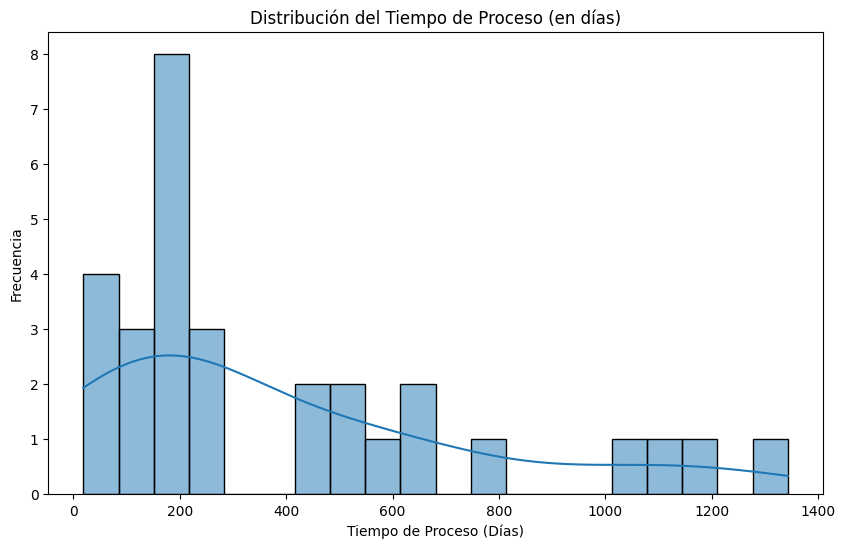


2. Análisis de Fallos:

Distribución de los Fallos:
Fallo
Conciliación    9
Sin Definir     8
Favorable       8
Desfavorable    5
Name: count, dtype: int64


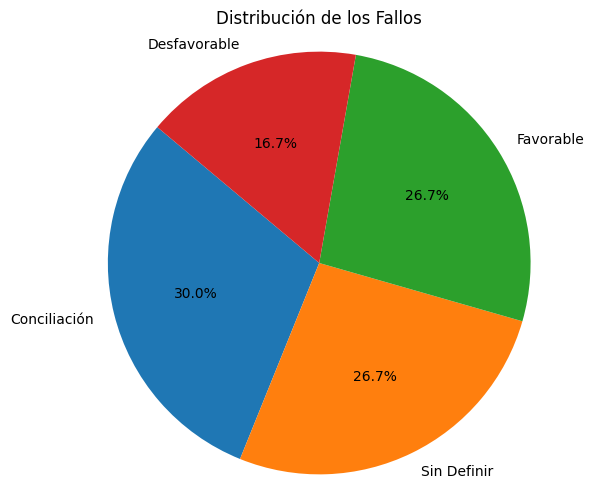


3. Tiempo de Proceso por Tipo de Causa:

Tiempo promedio de proceso por tipo de causa (días):
Tipo_Causa
Penal        552.333333
Civil        453.200000
Laboral      419.000000
Comercial    196.125000
Name: Tiempo_Proceso_Dias, dtype: float64


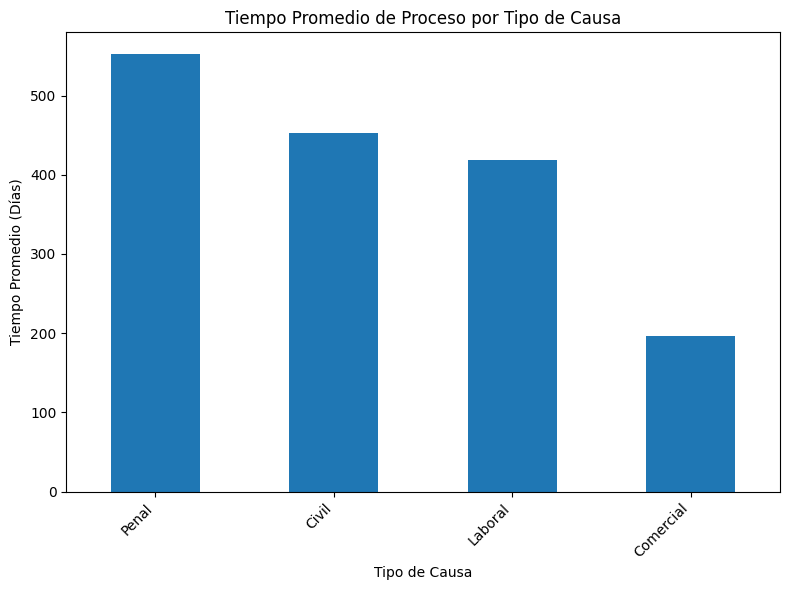


4. Fallos por Tipo de Causa:

Distribución de los Fallos por Tipo de Causa:
Fallo       Conciliación  Desfavorable  Favorable  Sin Definir
Tipo_Causa                                                    
Civil                  4             1          3            2
Comercial              3             1          1            3
Laboral                0             2          3            1
Penal                  2             1          1            2


<Figure size 1000x600 with 0 Axes>

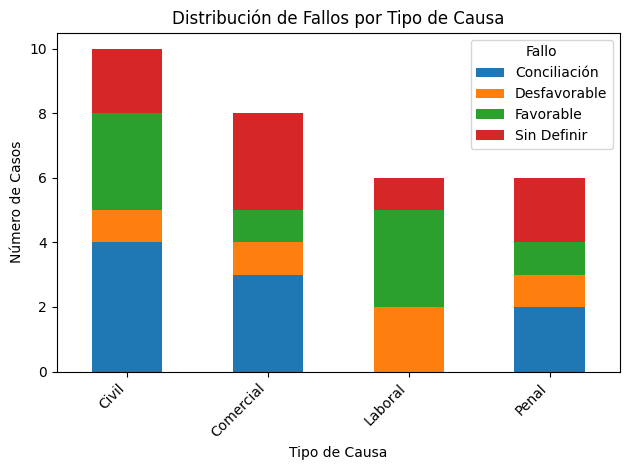


5. Tiempo de Proceso por Estado Actual:

Tiempo promedio de proceso por estado actual (días):
Estado_Actual
Pendiente de Juicio    641.000000
Apelación              460.714286
En Curso               417.833333
Ejecución              249.333333
Name: Tiempo_Proceso_Dias, dtype: float64


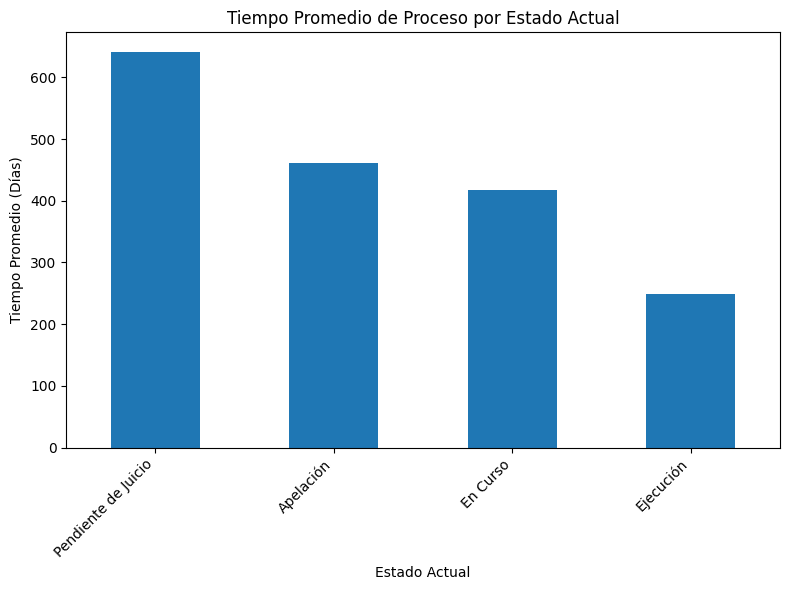


6. Fallos por Instancia:

Distribución de los Fallos por Instancia:
Fallo                  Conciliación  Desfavorable  Favorable  Sin Definir
Instancia                                                                
Corte Suprema                     3             3          4            1
Cámara de Apelaciones             4             1          2            2
Primera Instancia                 2             1          2            5


<Figure size 800x600 with 0 Axes>

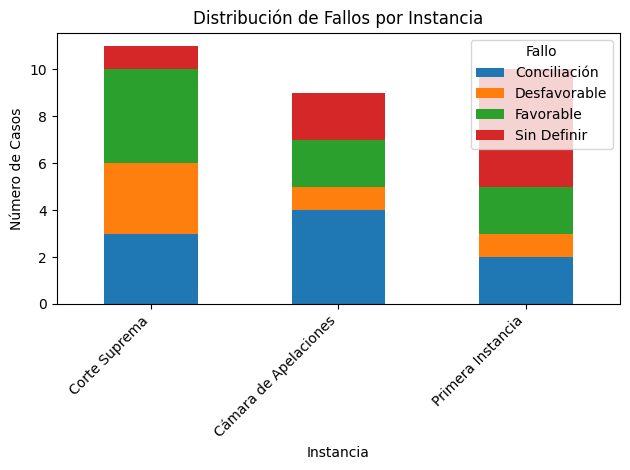

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_casos_judiciales.csv"
data_casos = pd.read_csv(url)
df_casos = pd.DataFrame(data_casos)


def analizar_justicia(df_casos):
    """Analiza los datos de casos judiciales."""
    print("\nAnálisis de Casos Judiciales:")
    print("-" * 40)

    print(f"\nNúmero total de casos: {len(df_casos)}")

    # 1. Tiempo de Proceso
    print("\n1. Análisis del Tiempo de Proceso:")
    print(f"Tiempo promedio de proceso (días): {df_casos['Tiempo_Proceso_Dias'].mean():.2f}")
    print(f"Tiempo mínimo de proceso (días): {df_casos['Tiempo_Proceso_Dias'].min()}")
    print(f"Tiempo máximo de proceso (días): {df_casos['Tiempo_Proceso_Dias'].max()}")
    print("\nDistribución del Tiempo de Proceso:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_casos['Tiempo_Proceso_Dias'], bins=20, kde=True)
    plt.title('Distribución del Tiempo de Proceso (en días)')
    plt.xlabel('Tiempo de Proceso (Días)')
    plt.ylabel('Frecuencia')
    plt.show()

    # 2. Análisis de Fallos
    print("\n2. Análisis de Fallos:")
    fallos_counts = df_casos['Fallo'].value_counts()
    print("\nDistribución de los Fallos:")
    print(fallos_counts)
    plt.figure(figsize=(6, 6))
    plt.pie(fallos_counts, labels=fallos_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribución de los Fallos')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # 3. Tiempo de Proceso por Tipo de Causa
    print("\n3. Tiempo de Proceso por Tipo de Causa:")
    tiempo_por_causa = df_casos.groupby('Tipo_Causa')['Tiempo_Proceso_Dias'].mean().sort_values(ascending=False)
    print("\nTiempo promedio de proceso por tipo de causa (días):")
    print(tiempo_por_causa)
    plt.figure(figsize=(8, 6))
    tiempo_por_causa.plot(kind='bar')
    plt.title('Tiempo Promedio de Proceso por Tipo de Causa')
    plt.ylabel('Tiempo Promedio (Días)')
    plt.xlabel('Tipo de Causa')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 4. Fallos por Tipo de Causa
    print("\n4. Fallos por Tipo de Causa:")
    fallos_por_causa = df_casos.groupby(['Tipo_Causa', 'Fallo']).size().unstack(fill_value=0)
    print("\nDistribución de los Fallos por Tipo de Causa:")
    print(fallos_por_causa)
    plt.figure(figsize=(10, 6))
    fallos_por_causa.plot(kind='bar', stacked=True)
    plt.title('Distribución de Fallos por Tipo de Causa')
    plt.ylabel('Número de Casos')
    plt.xlabel('Tipo de Causa')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 5. Tiempo de Proceso por Estado Actual
    print("\n5. Tiempo de Proceso por Estado Actual:")
    tiempo_por_estado = df_casos.groupby('Estado_Actual')['Tiempo_Proceso_Dias'].mean().sort_values(ascending=False)
    print("\nTiempo promedio de proceso por estado actual (días):")
    print(tiempo_por_estado)
    plt.figure(figsize=(8, 6))
    tiempo_por_estado.plot(kind='bar')
    plt.title('Tiempo Promedio de Proceso por Estado Actual')
    plt.ylabel('Tiempo Promedio (Días)')
    plt.xlabel('Estado Actual')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 6. Fallos por Instancia
    print("\n6. Fallos por Instancia:")
    fallos_por_instancia = df_casos.groupby(['Instancia', 'Fallo']).size().unstack(fill_value=0)
    print("\nDistribución de los Fallos por Instancia:")
    print(fallos_por_instancia)
    plt.figure(figsize=(8, 6))
    fallos_por_instancia.plot(kind='bar', stacked=True)
    plt.title('Distribución de Fallos por Instancia')
    plt.ylabel('Número de Casos')
    plt.xlabel('Instancia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Llamada a la función
analizar_justicia(df_casos)